#### Prémisses du sujet

Ce sujet est bien évidemment ancré dans l'actualité. Aujourd'hui à moins de cent jours de la présidentielle de 2022 : les sondages, les débats rythment notre actualité. D'autant plus que cette présidentielle semble être cruciale pour certes l'avenir de la France et la direction qu'elle va prendre, mais également pour les acteurs politiques.

Les interrogations de cette présidentielle sont multiples : 
- Macron va-t-il encore une fois réussir à battre l'alternance de la gauche et droite traditionnelle au pouvoir depuis le début de la Ve République ? 
- La gauche, aujourd'hui plus que divisée ses multiples candidats, elle qui a refusé une primaire, va-t-elle pouvoir se reconstruire après l'échec de 2017 et surtout la non-candidature d'Hollande en 2017 qui montre un échec de sa présidentielle. 
- La droite, va-t-elle réussir à se reconstruire ? Les observateurs politiques disent que c'est l'élection de la dernière chance pour eux. Son électorat se divisent de plus en plus entre les nationalistes et les pro-européens modérés.
- Quel camp nationaliste va-t-il emporté ? Celui de Marine Le Pen ancré dans le spectre politique depuis longtemps ou celui d'Eric Zemmour, très récente mais pourtant ce candidat est porté haut dans les sondages. 

Toutes ces interrogations nous ont amené à questionner les sondages qu'on voit actuellement quotidiennement : 
- Quelle est la prédictabilité des sondages ? 
- Les sondages font-ils la politique ? Est-ce qu'un candidat haut ou bien placé dans les sondages, va capter encore plus de voix car il s'avère plus crédible aux yeux des électeurs ? 

Ces questions nous ont amenés à étudier les 3 dernières élections présidentielles, dans le but de trouver des similitudes ou des biais permettant de donner crédit aux sondages actuels.

# <span style="color:purple"> Introduction 

Ce sujet est bien évidemment ancré au cœur de l'actualité. Aujourd'hui, à moins de cent jours de la présidentielle de 2022, les sondages rythment notre quotidien et les discussions politiques. Souvent critiqués pour leurs erreurs, les sondages continuent pourtant d’intéresser tout le monde, que ce soient les électeurs, les partis ou même les candidats. Mais peut-on vraiment se fier à ces quelques « estimations » que nous lisons dans la presse sans véritablement les comprendre ?  Cette problématique n’est pas nouvelle, en témoigne un récent article du *Figaro* qui compare les sondages 100 jours avant les résultats de chaque élection de la Ve République : [Figaro, 3 janvier 2022](https://www.lefigaro.fr/elections/presidentielles/presidentielles-ou-en-etions-nous-a-100-jours-du-premier-tour-20220102).

Ainsi face à cette nouvelle élection présidentielle qui semble être aussi incertaine que cruciale pour l'avenir économique et social de la France, nous avons voulu jauger l’efficacité des sondages omniprésents dans les médias. Quelle est le degré de fiabilité des sondages et à partir de quand deviennent-ils pertinents ? Quels sont les facteurs qui influencent leur prédictibilité et comment varie cette prédictibilité selon différentes échelles et divers critères sociodémographiques ? 

Autant de questionnements auxquels nous avons cherché à répondre par notre étude à travers la comparaison des sondages publiés à l’occasion des 3 dernières élections présidentielles. L’objectif est ainsi d’identifier les similitudes et les biais permettant de mieux comprendre et expliquer la fiabilité (ou l'absence de fiabilité) des sondages passés pour mieux appréhender les sondages actuels et futurs. 

Notre étude se fera en trois parties, qui correspondent à trois niveaux d’analyse. Nous commencerons par étudier les sondages des trois dernières élections (2007, 2012 et 2017) à l’échelle nationale afin d’obtenir un aperçu général et ainsi être en mesure de comparer l’évolution de la fiabilité des sondages à travers le temps et les différents contextes politiques. Nous nous attarderons ensuite plus particulièrement sur l’étude de 2017 à l’échelle régionale dans un premier temps, puis selon des critères sociologiques et démographiques pour déterminer si l’on peut expliquer les évolutions de la fiabilité observées précédemment. 

#  <span style="color:purple"> Importations

In [1]:
import urllib
import bs4
import pandas as pd 
from urllib import request
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
#import geopandas
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

C:\Users\22sir\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#  <span style="color:purple"> Partie I : Etude des 3 dernières élections présidentielles à l'échelle nationale

# <span style="color:darkred">  Élection de 2007 

# I] Préparation des données (2007)

## A) Récupération des données

In [2]:
#scrapping des données sur Wikipédia
url_Sondages_2007 = "https://fr.wikipedia.org/wiki/Liste_de_sondages_sur_l%27%C3%A9lection_pr%C3%A9sidentielle_fran%C3%A7aise_de_2007#Premier_tour"
request_text = request.urlopen(url_Sondages_2007).read()
page = bs4.BeautifulSoup(request_text, "lxml")

#### Remarque 

On extrait nos données de Wikipédia, cependant on ne récupère pas toutes les données disponibles : avant une certaine date (par exemple le choix définitif des candidats des partis politiques), il n'est pas pertinent de récupérer les données des sondages.

### A.1) Sondage IFOP 20-21 janvier 2005 3 hypothèses sur le candidat du PS

In [3]:
#On extrait les données du tableau
tableau_sondages = page.find('table',{'class':'wikitable'})
tableau_body = tableau_sondages.find('tbody')
rows = tableau_body.find_all('tr')

#On récupère les en-têtes 
dico_sondage_2007_1 = dict()
sondage =['IFOP 1', 'IFOP 2', 'IFOP 3']

for i in range(0,len(sondage)):
        dico_sondage_2007_1[sondage[i]]=list()

#On crée un dictionnaire avec les données
cols = rows[3].find_all('td')
cols = [ele.text.strip() for ele in cols]
dico_sondage_2007_1[sondage[0]]=cols[2:]
    
for row in range(4,len(rows)):
    cols = rows[row].find_all('td')
    cols = [ele.text.strip() for ele in cols]
    dico_sondage_2007_1[sondage[row-3]]=cols[:]

#On crée le dataframe 
data_participants_2005 = pd.DataFrame.from_dict(dico_sondage_2007_1,orient='index',columns=['Arlette Laguiller','Olivier Besancenot','Marie-George Buffet','Laurent Fabius','Jack Lang','François Hollande','Noël Mamère','François Bayrou','Nicolas Sarkozy','Philippe de Villiers','Jean-Marie Le Pen'])

### A.2) Sondages sur l'année 2006

In [4]:
#On extrait les données du tableau
tableau_sondages = page.find_all('table',{'class':'wikitable'})
tableau_sondages_2006 = tableau_sondages[1]
tableau_body = tableau_sondages_2006.find('tbody')
rows = tableau_body.find_all('tr')

#On récupère les en-têtes 
dico_sondage_2006 = dict()
candidats =['Arlette Laguiller','Olivier Besancenot','Marie-George Buffet','Ségolène Royal','Dominique Voynet','François Bayrou','Nicolas Sarkozy','Philippe de Villiers','Frédéric Nihous','Jean-Marie Le Pen']
        
index_colonnes = [0 for i in range(len(rows)-3)]

#On crée un dictionnaire avec les données
for row in range(3,len(rows)):
    cols = rows[row].find_all('td')
    cols = [ele.text.strip() for ele in cols]
    dico_sondage_2006[cols[0]+' '+cols[1]]=list()
    dico_sondage_2006[cols[0]+' '+cols[1]]=cols[:]

#On crée le dataframe 
data_participants_2006 = pd.DataFrame.from_dict(dico_sondage_2006,orient='index',columns=['Sondeur','Date','Arlette Laguiller','Olivier Besancenot','Marie-George Buffet','Ségolène Royal','Dominique Voynet','François Bayrou','Nicolas Sarkozy','Philippe de Villiers','Frédéric Nihous','Jean-Marie Le Pen'])

for i in range (0,14): 
    data_participants_2006['Date'][i]=data_participants_2006['Date'][i]+ " 2006"

### A.3) Sondages sur l'année 2007 

In [5]:
#On extrait les données du tableau
tableau_sondages = page.find_all('table',{'class':'wikitable'})
dico_sondage = dict()
index_colonnes = []
candidats =['Arlette Laguiller','Olivier Besancenot','Marie-George Buffet','Gérard Schivardi','Ségolène Royal','José Bové','Dominique Voynet','François Bayrou','Nicolas Sarkozy','Philippe de Villiers','Frédéric Nihous','Jean-Marie Le Pen']

#On récupère les en-têtes 
for i in range(2,6):
    
    tableau_sondages_i = tableau_sondages[i]
    tableau_body = tableau_sondages_i.find('tbody')
    rows = tableau_body.find_all('tr')

#On crée un dictionnaire avec les données
    for row in range(3,len(rows)):
        cols = rows[row].find_all('td')
        cols = [ele.text.strip() for ele in cols]
        index_colonnes.append(cols[0]+' '+cols[1])
        for i in range(2,len(cols)):
            dico_sondage[cols[0]+' '+cols[1]]=cols[:]
            
data_participants_2007 = pd.DataFrame.from_dict(dico_sondage,orient='index',columns=['Sondeur','Date','Arlette Laguiller','Olivier Besancenot','Marie-George Buffet','Gérard Schivardi','Ségolène Royal','José Bové','Dominique Voynet','François Bayrou','Nicolas Sarkozy','Philippe de Villiers','Frédéric Nihous','Jean-Marie Le Pen'])

#On crée le dataframe
for i in range (0,92): 
    data_participants_2007['Date'][i]=data_participants_2007['Date'][i]+ " 2007"

### A.4) Dataframe sondages élection 2007

On réunit les données des sondages de l'élection de 2007 dans un unique dataframe, __data_complet__.

In [6]:
data_complet = pd.concat([data_participants_2006,data_participants_2007])

## B) Nettoyage des données

##### Remarque
Il s'agit ici de retravailler le dataframe __data_complet__, pour enlever les valeurs incompatibles, organiser les données et transformer les valeurs en valeurs numériques afin de pouvoir les utiliser par la suite pour réaliser des statistiques descripitives et des graphiques explicatifs.

### B.1) On retire les élements non numériques du dataframe 

In [7]:
# On retire les %,<,- qui polluent nos données 
for i in range(0,106):
    for j in range(0,len(data_complet.columns)): 
        data_complet.iloc[i,j]=str(data_complet.iloc[i,j])
for i in range(0,106):
    for j in range(0,len(data_complet.columns)): 
        data_complet.iloc[i,j]=data_complet.iloc[i,j].replace("\xa0%","") 
        data_complet.iloc[i,j]=data_complet.iloc[i,j].replace(",",".") 
        data_complet.iloc[i,j]=data_complet.iloc[i,j].replace("<","")
        data_complet.iloc[i,j]=data_complet.iloc[i,j].replace("-","nan")
        data_complet.iloc[i,j]=data_complet.iloc[i,j].replace("None","nan")
        
# On s'assure une première fois qu'il ne s'agit pas de valeurs string 
for i in range(0,106):
    for j in range(3,len(data_complet.columns)): 
        data_complet.iloc[i,j]=float(data_complet.iloc[i,j])

### B.2) Réindexation dans l'ordre chronologique 

In [8]:
# On récupère l'index dans un dataframe spécifique
data_complet2=data_complet.reset_index()
df_index=data_complet2["Date"].str.split(" ",2, expand=True)

# On récupère l'index dans un dataframe spécifique
data_complet2=data_complet.reset_index()
df_index=data_complet2["Date"].str.split(" ",2, expand=True)

# On retire les coquilles et les doubles valeurs pour obtenir trois colonnes (JJ, MM, AAAA)
for i in range(0,106): 
    df_index.iloc[i,0]=df_index.iloc[i,0].replace("er","")

# On crée un dictionnaire avec les mois pour remplacer les "Apr", "Mar"... par des valeurs numériques 
dico_mois=dict()
dico_mois={'janvier':1, 'février':2, 'mars':3, 'avril':4, 'mai':5, 'juin':6, 'juillet':7, 'aout':8, 'septembre':9, 'octobre':10, 'novembre':11, 'décembre':12}

for i in range(0,106):
    df_index[1][i]= dico_mois[df_index[1][i]]

# On crée une liste pour pouvoir réintégrer l'index chronologique dans notre dataframe de base 
l1=list()
l1.append(df_index[0])
l2=list()
l2.append(df_index[1])
l3=list()
l3.append(df_index[2])
l=list(range(0,106))

for i in range (0,106):
    l[i]=str(l1[0][i])+"-"+str(l2[0][i])+"-"+str(l3[0][i])

from datetime import datetime
for i in range (0,106):
    l[i]=datetime.strptime(l[i], "%d-%m-%Y")
    
# On réindexe et trie les valeurs par ordre chronologique 
data_complet2.index=l
data_complet2["Date"]=l

# On crée enfin un dataframe qui est cette fois dans l'ordre chronologique (les données wiképédia étant fournies dans l'ordre opposé)
df=data_complet2.sort_index(axis = 0, ascending = True)

In [9]:
# On s'assure à nouveau que les données sont bien numériques
for column in df.iloc[:,3:106]:
    df[column]=pd.to_numeric(df[column], downcast="float")

### B.3) Suppression des dates en doublon 

In [10]:
df_Laguiller=df.groupby("Date").agg({'Arlette Laguiller':"mean"})
df_Besancenot=df.groupby("Date").agg({'Olivier Besancenot':"mean"})
df_Buffet=df.groupby("Date").agg({'Marie-George Buffet':"mean"})
df_Royal=df.groupby("Date").agg({'Ségolène Royal':"mean"})
df_Voynet=df.groupby("Date").agg({'Dominique Voynet':"mean"})
df_Bayrou=df.groupby("Date").agg({'François Bayrou':"mean"})
df_Sarkozy=df.groupby("Date").agg({'Nicolas Sarkozy':"mean"})
df_Villiers=df.groupby("Date").agg({'Philippe de Villiers':"mean"})
df_Nihous=df.groupby("Date").agg({'Frédéric Nihous':"mean"})
df_LePen=df.groupby("Date").agg({'Jean-Marie Le Pen':"mean"})
df_Schivardi=df.groupby("Date").agg({'Gérard Schivardi':"mean"})
df_Bové=df.groupby("Date").agg({'José Bové':"mean"})
df_final = pd.concat([df_Laguiller,df_Besancenot, df_Buffet, df_Royal, df_Voynet, df_Bayrou, df_Sarkozy, df_Villiers, df_Nihous, df_LePen, df_Schivardi, df_Bové], axis=1)

# le dataframe final de 2007 sur lequel nous allons travailler
df_final

,Arlette Laguiller,Olivier Besancenot,Marie-George Buffet,Ségolène Royal,Dominique Voynet,François Bayrou,Nicolas Sarkozy,Philippe de Villiers,Frédéric Nihous,Jean-Marie Le Pen,Gérard Schivardi,José Bové
Date,,,,,,,,,,,,
2006-10-05,3.00,5.00,3.000000,29.500000,2.000000,7.000000,38.00,3.000000,NaN,9.500000,NaN,NaN
2006-10-13,2.50,4.50,3.000000,30.000000,1.500000,9.500000,34.00,3.000000,NaN,12.000000,NaN,NaN
2006-10-18,4.00,4.00,3.000000,32.000000,2.000000,7.000000,31.00,2.000000,NaN,15.000000,NaN,NaN
2006-11-08,3.00,4.00,4.000000,29.000000,3.000000,7.000000,30.00,2.000000,NaN,15.000000,NaN,NaN
2006-11-11,2.50,4.00,2.000000,34.000000,1.500000,7.000000,34.00,2.000000,NaN,13.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2007-04-17,1.00,4.00,2.000000,25.000000,2.000000,19.000000,27.00,1.500000,1.500000,15.500000,NaN,1.500000
2007-04-18,1.25,3.75,2.750000,23.750000,1.500000,19.000000,28.25,2.000000,1.750000,13.250000,0.50,1.250000
2007-04-19,1.50,5.00,2.333333,25.000000,1.166667,17.166666,28.00,1.833333,1.166667,14.333333,1.00,2.166667


Nous avons ici obtenu notre dataframe final (__datafinal__) des données de 2007 sur lequel  nous allons pouvoir travailler.

# II] Statistiques descriptives (2007)

###  Comment juger de l'efficacité d'un sondage ? 
    
Pour répondre à cette interrogation, nous nous sommes mis dans la peau de citoyens lamdba, ignorants des techniques de sondages et du fonctionnement des marges d'erreur (nous reviendrons toutefois sur cette notion dans la dernière partie de ce projet). Nous avons ainsi cherché à determiner à quel moment d'une campagne électorale, les résultats affichés dans les sondages et observés par tous dans les médias se révèlent efficients. 
Pour cela nous avons retenu plusieurs niveaux de précision : 
- Un **premier niveau** cherche avant tout à déterminer si le sondage donne les deux bons candidats du second tour (peu importe l'odre du 1er et 2e), c'est-à-dire les deux candidats entre lesquels les électeurs devront choisir leur futur président. 

- Un **second niveau** cherche à identifier les sondages suffisamment performants pour donner le bon ordre des candidats (au moins pour ceux recevant plus de 5% des suffrages). Nous chercherons ici à déterminer à quelle date on obtient le bon classement des candidats pour la première fois. 

- Un **dernier niveau** cherche à déterminer explicitement les sondages qui donnent les bons résultats (pourcentage de vote) et quand. Pour cela, nous déterminerons d'abord "bêtement" à quelle date (si une telle date existe) les sondages "prédisent" les pourcentages exacts de chaque candidat à 0,5% (niveau arbitraire que nous nous imposons). Ensuite, nous établirons un indice de fiabilité de chaque sondage et nous étudierons plus spécifiquement son évolution dans le temps pour juger définitivement de la capacité des sondages à prédire les résultats justement.

## A) Quelques éléments de statistiques générales

### A.1) Comparaison moyenne des sondages et résultats

###### Objectif 
On se concentre ici sur les moyennes de chaque candidat sur les différents sondages étudiés. On veut ainsi comparer ces moyennes à la réalité des résultats afin d'avoir une idée globale de la précision des sondages.

C:\Users\22sir\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


Text(0.5, 1.0, 'RESULTAT 22 AVRIL 2007')

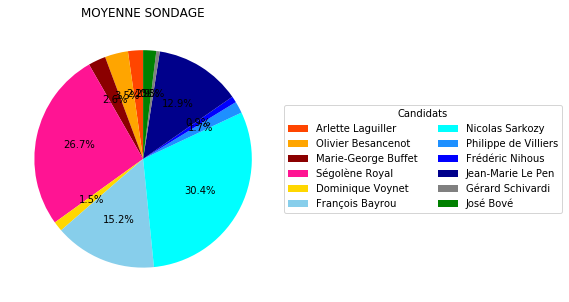

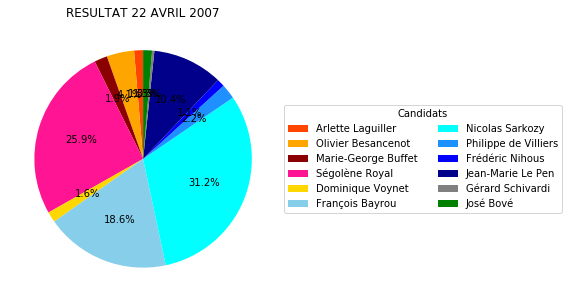

In [11]:
df=df_final.reset_index()
df.drop(74,0,inplace=True)

l=list()
l=[df["Arlette Laguiller"].mean(), df["Olivier Besancenot"].mean(), df["Marie-George Buffet"].mean(), df["Ségolène Royal"].mean(), df["Dominique Voynet"].mean(), df["François Bayrou"].mean(), df["Nicolas Sarkozy"].mean(),df["Philippe de Villiers"].mean(), df["Frédéric Nihous"].mean(), df["Jean-Marie Le Pen"].mean(), df["Gérard Schivardi"].mean(), df["José Bové"].mean()]


#Diagramme moyenne sondages
labels = ["Arlette Laguiller", "Olivier Besancenot", "Marie-George Buffet", "Ségolène Royal", "Dominique Voynet", "François Bayrou", "Nicolas Sarkozy", "Philippe de Villiers", "Frédéric Nihous", "Jean-Marie Le Pen", "Gérard Schivardi", "José Bové"]
sizes = l 
colors =["orangered", "orange", "darkred", "deeppink",'gold',"skyblue", "cyan", "dodgerblue","blue" ,'darkblue', "grey", "green"]
fig,ax2 = plt.subplots(figsize=(5, 5))
plt.pie(sizes, colors=colors,  autopct='%1.1f%%', startangle=90)
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5), ncol = 2, title = "Candidats")
ax2.set_title("MOYENNE SONDAGE")

# Diagramme Résultats (22 Avril 2007)  
labels = ["Arlette Laguiller", "Olivier Besancenot", "Marie-George Buffet", "Ségolène Royal", "Dominique Voynet", "François Bayrou", "Nicolas Sarkozy", "Philippe de Villiers", "Frédéric Nihous", "Jean-Marie Le Pen", "Gérard Schivardi", "José Bové"]
sizes = [df_final["Arlette Laguiller"][74], df_final["Olivier Besancenot"][74], df_final["Marie-George Buffet"][74], df_final["Ségolène Royal"][74], df_final["Dominique Voynet"][74],df_final["François Bayrou"][74],df_final["Nicolas Sarkozy"][74], df_final["Philippe de Villiers"][74],df_final["Frédéric Nihous"][74], df_final["Jean-Marie Le Pen"][74], df_final["Gérard Schivardi"][74], df_final["José Bové"][74]]
colors =["orangered", "orange", "darkred", "deeppink",'gold',"skyblue", "cyan", "dodgerblue","blue" ,'darkblue', "grey", "green"]
fig,ax3 = plt.subplots(figsize=(5, 5))
plt.pie(sizes, colors=colors,  autopct='%1.1f%%', startangle=90)
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5), ncol = 2, title = "Candidats")
ax3.set_title("RESULTAT 22 AVRIL 2007")

#### <span style="color:darkblue">Commentaire 
<span style="color:darkblue"> On remarque que la moyenne des sondages (et cela bien qu'elle prenne en compte des sondages fortement éloignés de l'élection -certains datant d'octobre 2006-) est déja très proche de la réalité de l'élection : elle met en avant le bon duo de gagnants du premier tour, les quatre candidats majeurs dans le bon ordre et, en ce qui concerne les deux principaux candidats (Sarkozy et Royal), elle propose des résultats (en pourcentage de voix) assez satisfaisants par rapport à l'issue réelle de l'élection (26,7 en moyenne pour S. Royal contre 25,9 en réalité et 30,4 en moyenne pour N. Sarkozy contre 31,2). 
Ainsi, pour ce qui est de 2007, les sondages semblent proposer une représentation fiable de la réalité des intentions de vote et ce plusieurs mois avant l'élection. 

### A.2) Comparaison des sondages sur plusieurs dates clefs

###### Objectif 
On cherche ici à opérer une première analyse de surface en comparant les sondages à différentes dates (depuis le 5 octobre 2006  -premier sondage de notre étude-, jusqu'au 20 avril 2007 -dernier sondage avant les élections-). On utilise un diagramme en camembert dans lequel on regroupe les "petits" candidats dans la catégorie "autres" afin d'identifier l'évolution de la précision des sondages.   

Text(0.5, 1.0, 'RESULTAT 22 AVRIL 2007')

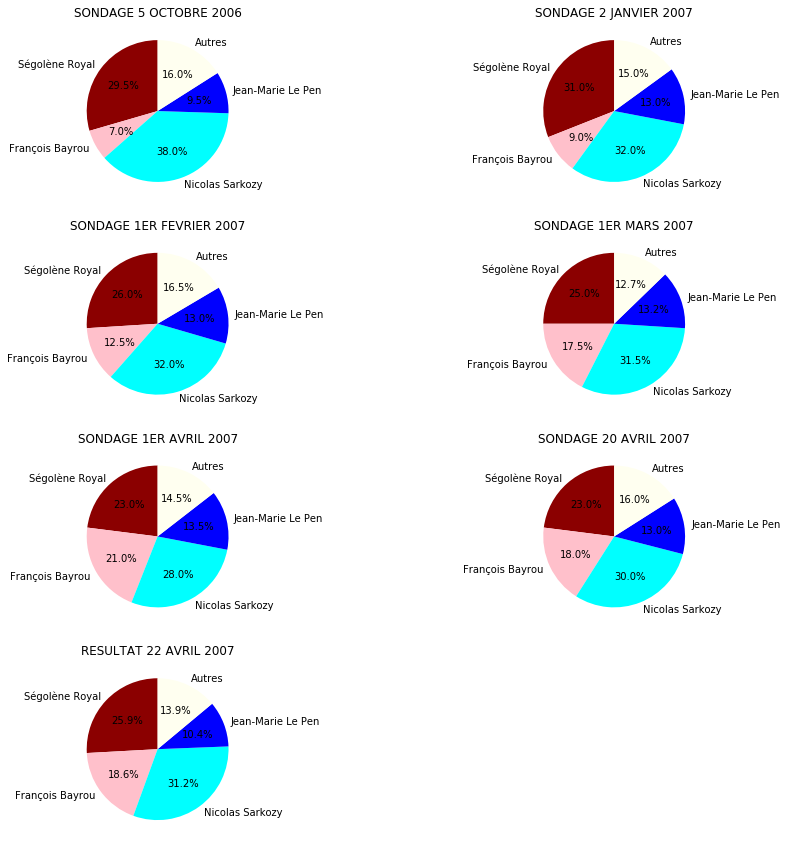

In [12]:
fig,ax = plt.subplots(4,2,figsize=(15,15))
fig.delaxes(ax[3,1])

# Diagramme Sondage 5 Octobre 2006 
labels = ["Ségolène Royal", "François Bayrou", "Nicolas Sarkozy", "Jean-Marie Le Pen", "Autres"]
sizes = [df_final["Ségolène Royal"][0], df_final["François Bayrou"][0], df_final["Nicolas Sarkozy"][0], df_final["Jean-Marie Le Pen"][0], 100-(df_final["Ségolène Royal"][0]+df_final["François Bayrou"][0]+df_final["Nicolas Sarkozy"][0]+df_final["Jean-Marie Le Pen"][0])]
colors =["darkred",'pink',"cyan",'blue', "ivory"]
ax[0,0].pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
ax[0,0].set_title("SONDAGE 5 OCTOBRE 2006")

# Diagramme Sondage Janvier 
labels = ["Ségolène Royal", "François Bayrou", "Nicolas Sarkozy", "Jean-Marie Le Pen", "Autres"]
sizes = [df_final["Ségolène Royal"][13], df_final["François Bayrou"][13], df_final["Nicolas Sarkozy"][13], df_final["Jean-Marie Le Pen"][13], 100-(df_final["Ségolène Royal"][13]+df_final["François Bayrou"][13]+df_final["Nicolas Sarkozy"][13]+df_final["Jean-Marie Le Pen"][13])]
colors =["darkred",'pink',"cyan",'blue', "ivory"]
ax[0,1].pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
ax[0,1].set_title("SONDAGE 2 JANVIER 2007")

# Diagramme Sondage Février  
labels = ["Ségolène Royal", "François Bayrou", "Nicolas Sarkozy", "Jean-Marie Le Pen", "Autres"]
sizes = [df_final["Ségolène Royal"][25], df_final["François Bayrou"][25], df_final["Nicolas Sarkozy"][25], df_final["Jean-Marie Le Pen"][25], 100-(df_final["Ségolène Royal"][25]+df_final["François Bayrou"][25]+df_final["Nicolas Sarkozy"][25]+df_final["Jean-Marie Le Pen"][25])]
colors =["darkred",'pink',"cyan",'blue', "ivory"]
ax[1,0].pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
ax[1,0].set_title("SONDAGE 1ER FEVRIER 2007")

# Diagramme Sondage Mars  
labels = ["Ségolène Royal", "François Bayrou", "Nicolas Sarkozy", "Jean-Marie Le Pen", "Autres"]
sizes = [df_final["Ségolène Royal"][39], df_final["François Bayrou"][39], df_final["Nicolas Sarkozy"][39], df_final["Jean-Marie Le Pen"][39], 100-(df_final["Ségolène Royal"][39]+df_final["François Bayrou"][39]+df_final["Nicolas Sarkozy"][39]+df_final["Jean-Marie Le Pen"][39])]
colors =["darkred",'pink',"cyan",'blue', "ivory"]
ax[1,1].pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
ax[1,1].set_title("SONDAGE 1ER MARS 2007")

# Diagramme Sondage Avril   
labels = ["Ségolène Royal", "François Bayrou", "Nicolas Sarkozy", "Jean-Marie Le Pen", "Autres"]
sizes = [df_final["Ségolène Royal"][57], df_final["François Bayrou"][57], df_final["Nicolas Sarkozy"][57], df_final["Jean-Marie Le Pen"][57], 100-(df_final["Ségolène Royal"][57]+df_final["François Bayrou"][57]+df_final["Nicolas Sarkozy"][57]+df_final["Jean-Marie Le Pen"][57])]
colors =["darkred",'pink',"cyan",'blue', "ivory"]
ax[2,0].pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
ax[2,0].set_title("SONDAGE 1ER AVRIL 2007")

# Diagramme Sondage 20 Avril 2007   
labels = ["Ségolène Royal", "François Bayrou", "Nicolas Sarkozy", "Jean-Marie Le Pen", "Autres"]
sizes = [df_final["Ségolène Royal"][73], df_final["François Bayrou"][73], df_final["Nicolas Sarkozy"][73], df_final["Jean-Marie Le Pen"][73], 100-(df_final["Ségolène Royal"][73]+df_final["François Bayrou"][73]+df_final["Nicolas Sarkozy"][73]+df_final["Jean-Marie Le Pen"][73])]
colors =["darkred",'pink',"cyan",'blue', "ivory"]
ax[2,1].pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
ax[2,1].set_title("SONDAGE 20 AVRIL 2007")

# Diagramme Résultats (22 Avril 2007)  
labels = ["Ségolène Royal", "François Bayrou", "Nicolas Sarkozy", "Jean-Marie Le Pen", "Autres"]
sizes = [df_final["Ségolène Royal"][74], df_final["François Bayrou"][74], df_final["Nicolas Sarkozy"][74], df_final["Jean-Marie Le Pen"][74], 100-(df_final["Ségolène Royal"][74]+df_final["François Bayrou"][74]+df_final["Nicolas Sarkozy"][74]+df_final["Jean-Marie Le Pen"][74])]
colors =["darkred",'pink',"cyan",'blue', "ivory"]
ax[3,0].pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
ax[3,0].set_title("RESULTAT 22 AVRIL 2007")

#### <span style="color:darkblue"> Commentaire 
<span style="color:darkblue"> Comme précédemment, on observe des prédictions plutôt satisfaisantes de prime abord et ce de manière assez stable dans le temps. Finalement, il semble que le principal défaut des sondages de 2007 soit de sur-estimer la part du suffrage accordé à Jean-Marie Le Pen. 

## B) Analyse de la précision pour établir l'ordre des candidats

### B.1) A quelle date obtient-on pour la première fois le bon duo gagant ? 

###### Objectif 
On cherche ici à déterminer la date du premier sondage qui donne Nicolas Sarkozy et Ségolène Royal au second tour (sans se soucier ici de qui est premier et qui est second). 

In [13]:
# On détermine la date du premier sondage qui donne le bon duo gagnant, sélectionné pour le second tour
Second_Tour = list(range(0,74))
for i in range(0,74):
    if max(df["Arlette Laguiller"][i],df["Olivier Besancenot"][i],df["Marie-George Buffet"][i],df["Jean-Marie Le Pen"][i],df["Dominique Voynet"][i],df["François Bayrou"][i],df["Gérard Schivardi"][i],df["Philippe de Villiers"][i],df["Frédéric Nihous"][i], df["José Bové"][i])>min(df["Ségolène Royal"][i], df["Nicolas Sarkozy"][i]) : 
        Second_Tour[i] = "Mauvais duo gagant"
    else: 
        Second_Tour[i] = "Bon duo gagant"   

print ("On obtient le bon duo de candidats sélectionnés pour second tour le " + str(df["Date"][float(Second_Tour.index('Bon duo gagant'))].date())+".")

On obtient le bon duo de candidats sélectionnés pour second tour le 2006-10-05.


#### <span style="color:darkblue"> Commentaire 
<span style="color:darkblue"> Ainsi, les sondages "prédisent" le bon duo de candidats sélectionnés pour le second tour dès le premier sondage  de notre échantillon, soit celui datant d'octobre 2006. Les sondages sont donc tout de suite efficaces pour donner les deux candidats du second tour ce qui, d'une certaine manière est l'information essentielle qu'on peut attendre de ces derniers. Est-ce à dire qu'on retrouve une telle précision aussi rapidement dans toutes les présidentielles ? Qu'en déduire alors pour l'élection de 2022 ? 

### B.2) A quelle date obtient-on pour la première fois le bon classement ? 

###### Objectif 
On s'intéresse désormais au classement des candidats et nous cherchons ainsi à déterminer la date à laquelle ces mêmes sondages prédisent le bon ordre pour les candidats principaux (c'est à dire ceux qui recueillent plus de 5% des voix) 

In [14]:
# On détermine le premier sondage à donner le bon ordre pour les cinq premiers candidats (+ de 5% des voies)
Ordre = list(range(0,74))
for i in range(0,74):
    if ((df["Olivier Besancenot"][i] <= df["Jean-Marie Le Pen"][i]) and (df["Jean-Marie Le Pen"][i]<= df["François Bayrou"][i])): 
        if ((df["François Bayrou"][i] <= df["Ségolène Royal"][i]) and (df["Ségolène Royal"][i] <= df["Nicolas Sarkozy"][i])):
            Ordre[i] = "Bon ordre  "+str(i)
        else: 
            Ordre[i] = 'Mauvais ordre  '+str(i)
    else : 
        Ordre[i] = 'Mauvais ordre  '+str(i)

In [15]:
print ("Le premier sondage à donner le bon ordre date de "+str(df["Date"][6].date())+".")
print ("Sauf 'dérive', le bon ordre semble se stabiliser vers le "+ str(df["Date"][26].date())+".")
print ("Le bon ordre n'est complètement définitif que le "+str(df["Date"][36].date())+".")

Le premier sondage à donner le bon ordre date de 2006-11-18.
Sauf 'dérive', le bon ordre semble se stabiliser vers le 2007-02-03.
Le bon ordre n'est complètement définitif que le 2007-02-21.


####  <span style="color:darkblue"> Commentaire 
 <span style="color:darkblue"> On observe que le bon classement est donné pour la première fois en novembre 2006 et devient définitif dès le **21 février 2007**, soit plus de 8 semaines avant les élections, ce qui là encore nous semble très satisfaisant. 

## C) Analyse de la précision pour estimer les bons pourcentages de voix

### C.1) Existe-t-il une date à laquelle les sondages "prédisent" les résultats exacts ? 

##### Objectif 
On souhaite désormais déterminer si les sondages sont capables, à un certain moment, de donner avec précision les résultats des candidats. Par souci de simplicité, nous nous concentrerons sur les deux principaux candidats de cette élection (Ségolène Royal et Nicolas Sarkozy). Nous nous demandons ainsi s'il existe une date à partir de laquelle les sondages prédisent quasi exactement les résultats de ces deux candidats.

##### Remarques : 
- On se fixe ici arbitrairement une marge de + ou - 0,5% (par rapport aux résultats) pour construire des intervalles de confiance et déterminer à quel moment dans le temps les sondages prédisent des chiffres qui appartiennent à ces intervalles (si une telle date existe). 
- Encore une fois, ici, on ne prend pas en compte les marges d'erreur des sondeurs car nous nous plaçons dans la peau de personnes lambda qui observent les données retransmises dans les médias. Ce choix relève aussi d'une difficulté technique : chaque sondage possède des marges d'erreur différentes et celles-ci ne sont pas affichées sur la page Wikipédia des sondages de 2007, 2012 et 2017 ; récupérer ces marges d'erreur aurait donc été très long et laborieux. La notion de marge d'erreur sera cependant réintroduite par la suite (*cf* dernière partie).

Dans le dataframe qui suit (__dfstatdes2007__), la colonne "Intervalle confiance vainqueur 1" vaut *True* si le sondage prédit le score de Sarkozy à + ou - 0,5% et la la colonne "Intervalle confiance vainqueur 2" vaut *True* si le sondage prédit le score de Royal à + ou - 0,5%.

In [16]:
#Nicolas Sarkozy (31.18%) et Ségolène Royal (25.87%), on va vérifier la précision des sondages à 0,5%
#On crée des listes pour vérifier si les sondages sont précis à 0,5%, c'est-à-dire si leurs résultats 
#appartiennent dans un intervalle de confiance de 1% centré sur le résultat de la présidentielle.

pd.set_option("max_columns", None)
pd.set_option("max_rows", None)
dfstatdes2007 = df_final.copy()

confiancevainqueur1=[]
confiancevainqueur2=[]

for i in range(0,75):
    confiancevainqueur1.append(31.18-0.5 <= dfstatdes2007.iloc[i][6] <= 31.18+0.5)
    confiancevainqueur2.append(25.87-0.5 <= dfstatdes2007.iloc[i][3] <= 25.87+0.5)
dfstatdes2007.insert(12,"Intervalle confiance vainqueur 1", confiancevainqueur1)
dfstatdes2007.insert(13,"Intervalle confiance vainqueur 2", confiancevainqueur2)
dfstatdes2007[["Intervalle confiance vainqueur 1","Intervalle confiance vainqueur 2"]]

,Intervalle confiance vainqueur 1,Intervalle confiance vainqueur 2
Date,,
2006-10-05,False,False
2006-10-13,False,False
2006-10-18,True,False
2006-11-08,False,False
2006-11-11,False,False
2006-11-13,False,False
2006-11-18,False,False
2006-11-21,False,False
2006-11-30,False,False


####  <span style="color:darkblue"> Commentaire 
 <span style="color:darkblue">  La première fois qu'un sondage appartient à l'intervalle de confiance pour les deux candidats date du **8 mars 2007**, soit à moins d'un mois du résultat du premier tour. La deuxième fois (et la dernière) date de trois jours après. Ainsi, de manière générale on observe, comme on pouvait s'y attendre, que les sondages ont bien du mal à estimer les pourcentages de voix avec précision (ici à 0,5 points près).

### C.2) Indice de fiabilité des sondages

Afin de quantifier la fiabilité des sondages, nous définissons ici un indice de fiabilité associé à un résultat de sondage calculé comme la valeur absolue de l'erreur relative entre le résultat prédit par le sondage pour un candidat et le résultat final de ce candidat lors de la présidentielle.

*Exemple* : Si au sondage du 8 janvier, le candidat A est évalué avec un score de 20% et qu'il obtient un score de 23% à la présidentielle, l'indice de fiabilité *I* associé au résultat du candidat A lors du sondage du 8 janvier sera : $I = \frac{|20-23|}{23}=13\%$

Plus l'indice de fiabilité est proche de 0 et plus le résultat que prédit le sondage est proche du résultat de l'élection.

Le fait d'avoir mis de côté la marge d'erreur du sondage conduit à des indices de fiabilité très souvent non nuls (il faudrait que le résultat du sondage soit exactement celui de l'élection pour que l'indice soit nul). Un indice de fiabilité très proche de 0 (même non nul) est donc le gage d'une bonne fiabilité du résultat. Dit autrement, les marges d'erreur des sondages étant souvent de l'ordre de 2%, un indice de fiabilité *I* tel que $I= \frac{|x_s-x_0|}{x_0}<\frac{2\%}{x_0}$ où $x_s$ est le résultat du sondage et $x_0$ le résultat de l'élection est le gage d'un sondage parfaitement fiable. Pour un résultat d'élection de 20%, un *I* inférieur à 0,1 est gage d'un sondage qui ne pourrait être plus fiable.

##### Calcul de l'indice de fiabilité

Nous définissons une fonction __df_calcul_indice__ qui renvoie un dataframe  __df_indice__ avec les indices de fiabilité de chaque résultat de sondage.

In [17]:
#La fonction qui nous servira à calculer la fiabilité des sondages pour les 3 années (2007, 2012 et 2017)
def df_calcul_indice(candidats,fiabilite,df):
    
    df_indice = df[candidats]
    nbr_candidats = len(candidats)
    
    #Calcul fiabilité
    df_indice[fiabilite]=abs(df_indice.iloc[:,:nbr_candidats]-df_indice.loc[df_indice.index[-1]])/df_indice.loc[df_indice.index[-1]]
    df_indice["Fiabilité totale"] = df_indice[fiabilite].sum(axis=1)/nbr_candidats
    df_indice["date"]=df_indice.index

    from datetime import datetime
    df_indice["durée"]=df_indice[candidats[0]]
    for i in range(len(df_indice)):
        df_indice["durée"][i]=df_indice["date"][i].date().toordinal()
    for i in range(len(df_indice)):
        df_indice["durée"][i]=-df_indice.loc[df_indice.index[-1]][-1]+df_indice["durée"][i]
    df_indice.rename(index={df_indice.index[-1]: "Résultats"}, inplace=True)
    
    return(df_indice)

In [18]:
#Aides au calcul de fiabilité
candidats_2007 = ["Ségolène Royal","François Bayrou","Nicolas Sarkozy","Jean-Marie Le Pen"] 
fiabilite_2007 = ["Fiabilité Ségolène Royal","Fiabilité François Bayrou","Fiabilité Nicolas Sarkozy","Fiabilité Jean-Marie Le Pen"]
df_indice = df_calcul_indice(candidats_2007,fiabilite_2007,df_final)

C:\Users\22sir\Anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\22sir\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\22sir\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

##### Evolution de l'indice de fiabilité dans le temps

Nous représentons, dans le graphique qui suit, l'évolution de l'indice de fiabilité moyen des différents sondages en fonction du temps (*indice moyen* : indice calculé pour un sondage et correspondant à la moyenne des indices associés aux résultats des candidats pour ce sondage). Sur le graphique de droite, nous représentons une régression linéaire afin de mieux visualiser l'évolution globale en fonction du temps de l'indice de fiabilité moyen.

C:\Users\22sir\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\22sir\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\22sir\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\22sir\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be r

Text(0.5, 0, "Distance à l'élection (en nombre de jours)")

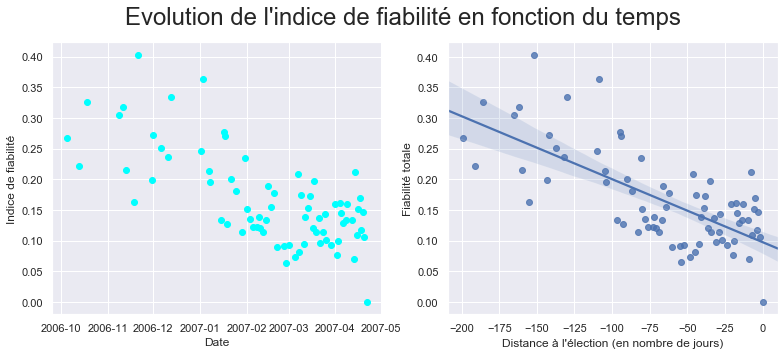

In [19]:
sns.set()
fig,ax = plt.subplots(1,2,figsize=(13,5))
ax[0].plot(df_final.index,"Fiabilité totale", "o", data=df_indice, color="cyan")
sns.regplot(x="durée", y="Fiabilité totale", data=df_indice, ax=ax[1])

#Titres et axes
fig.suptitle("Evolution de l'indice de fiabilité en fonction du temps",size=24)
ax[0].set_ylabel('Indice de fiabilité')
ax[0].set_xlabel('Date')
ax[1].set_xlabel("Distance à l'élection (en nombre de jours)")

Nous représentons ci-dessous les résidus associés à la régression précédente. Ces derniers semblent bien aléatoires.

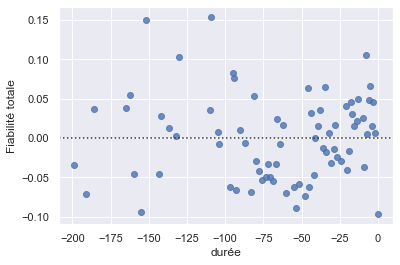

In [20]:
#On trace les résidus de la régression précédente
sns.residplot(x="durée", y="Fiabilité totale", data=df_indice)

####  <span style="color:darkblue"> Commentaire 
- <span style="color:darkblue"> On observe une décroissance linéaire dans le temps de l'indice de fiabilité moyen : plus on se rapproche de l'élection et plus les sondages sont fiables (*I* est de l'ordre de  0,3 175 jours avant l'élection et de l'ordre de 0,10 proche de l'élection.

La forme des données nous invite donc à  approfondir la régression linéaire afin d'obtenir les paramètres numériques de la régression.

In [21]:
#régression linéaire
df = df_indice[['durée','Fiabilité totale']].astype(np.float64)
X = sm.add_constant(df['durée'])
results = sm.OLS(df['Fiabilité totale'], X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Fiabilité totale   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     71.19
Date:                Wed, 05 Jan 2022   Prob (F-statistic):           2.12e-12
Time:                        18:38:57   Log-Likelihood:                 112.73
No. Observations:                  75   AIC:                            -221.5
Df Residuals:                      73   BIC:                            -216.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0973      0.010      9.449      0.0

C:\Users\22sir\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


####  <span style="color:darkblue"> Commentaire 
- <span style="color:darkblue"> Le $R^{2}$ est proche de 0,5 donc la régression est pertinente. La p-valeur associée à la pente de la variable "durée" est nulle. La valeur de la pente est donc significative. Se rapprocher de 10 jours de l'élection diminue donc l'indice de fiabilité (donc augmente la fiabilité du sondage) de 0,01 points. L'ordonnée à l'origine est de 0,10 proche de l'élection, l'indice fiabilité est de 0,10,résultat excellent pour un sondage si on considère la marge d'erreur (*cf* introduction sur l'indice de fiabilité.

##### Evolution de l'indice de fiabilité dans le temps suivant les candidats
    
L'évolution de l'indice de fiabilité dans le temps dépend-il du candidat observé ? C'est ce que nous étudions dans ce qui suit.

In [22]:
# Création d'un nouveau dataframe qui facilite la manipulation des données
list_df = [0]*4

#Création d'une liste de 7 df contenant les données propres à chacun des 6 candidats
for i in range(4):
    data = df_indice[[candidats_2007[i],"Fiabilité "+candidats_2007[i],"date","durée"]]
    data["Candidat"]=candidats_2007[i]
    data["Score"]=data[candidats_2007[i]]
    data["Fiabilité"]=data["Fiabilité "+candidats_2007[i]]
    data.drop("Fiabilité "+candidats_2007[i], axis=1, inplace=True)
    data.drop(candidats_2007[i], axis=1, inplace=True)
    list_df[i] = data
    
data_final = pd.concat(list_df, join = 'inner', ignore_index = True)
data_final

#Suppression des lignes donnant le résultat du vote
data_final = data_final[data_final["date"]!="Résultats"]
#data_final

C:\Users\22sir\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\22sir\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\22sir\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

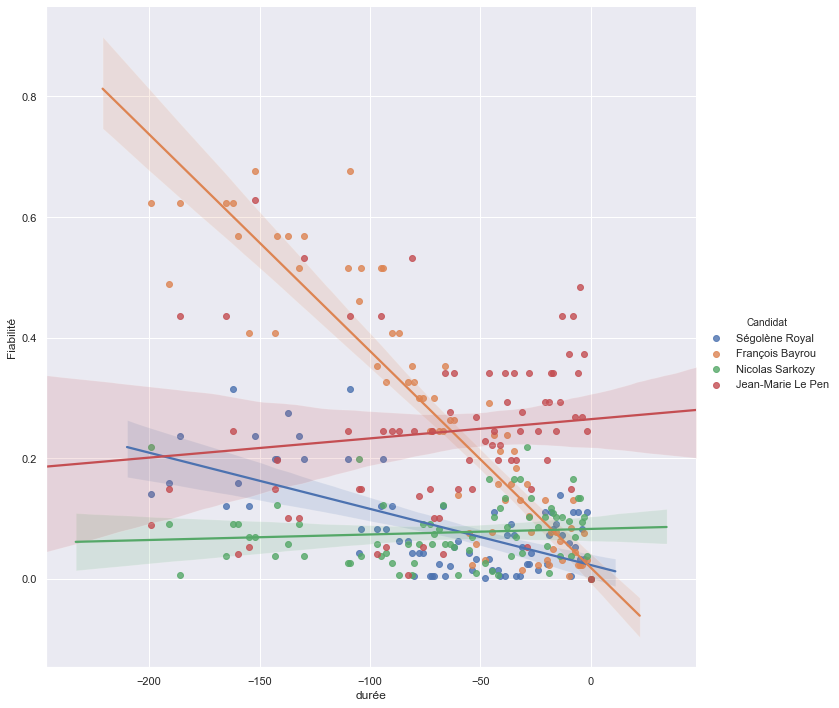

In [23]:
sns.lmplot(x="durée", y="Fiabilité", hue="Candidat", data=data_final, height=10)

####  <span style="color:darkblue"> Commentaire 
- <span style="color:darkblue"> On observe ici de grandes différences d'évolution de l'indice de fiabilité suivant le candidat considéré. L'indice de fiabilité de Sarkozy reste ainsi globalement très bon et constant dans le temps alors que celui de Bayrou se distingue de celui des autres candidats par des valeurs (loin de l'élection) très importantes et une forte décroissance de l'indice de fiabilité dans le temps.

L'indice de fiabilité semble donc dépendre du candidat. C'est ce que nous observons ci-dessous en affichant les boîtes à moustache permettant de visualiser la distribution des indices de fiabilité des prédictions de vote pour chaque candidat. Par exemple, sur le graphique de droite, un point bleu pourrait correspondre, par exemple, à l'indice de fiabilité du résultat obtenu par Royal pour le sondage du 2 février.

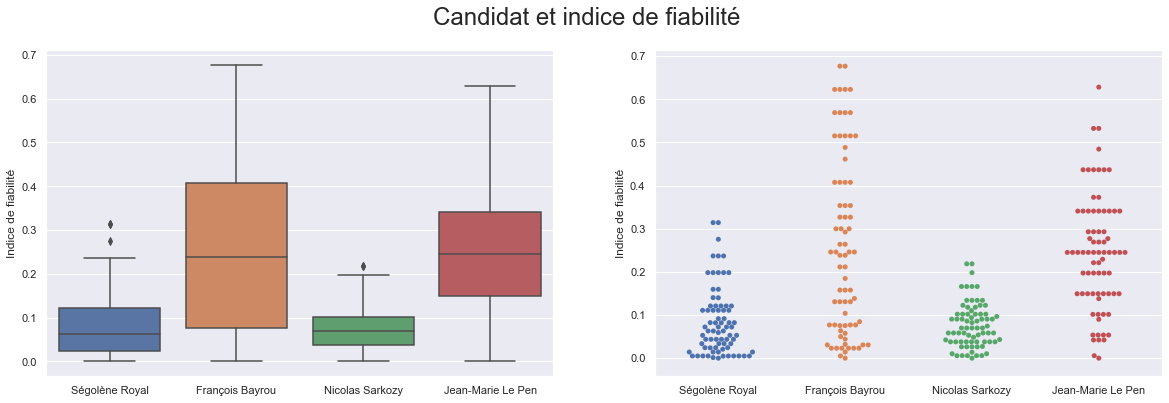

In [24]:
def boite_moustache_fiabilite(x,data):#fonction qui sera réutilisée pour 2012 et 2017
    
    """ Fonction permettant d'afficher la distribution par candidat de l'indice de fiabilité sous forme de boîte à moustache
    x : index de la colonne du dataframe qui sera représentée en abscisse
    data : le dataframe utilisé """
    
    fig,ax = plt.subplots(1,2,figsize=(20,6))
    sns.boxplot(x=x, y="Fiabilité", data=data, ax=ax[0])
    sns.swarmplot(x=x, y="Fiabilité", data=data,ax=ax[1])
    ax[0].set_xlabel('')
    ax[0].set_ylabel('Indice de fiabilité')
    ax[1].set_xlabel('')
    ax[1].set_ylabel('Indice de fiabilité')
    fig.suptitle(x+" et indice de fiabilité",size=24)
    
boite_moustache_fiabilite("Candidat",data_final)

####  <span style="color:darkblue"> Commentaire 
<span style="color:darkblue">  La distribution de l'indice de fiabilité dépend du candidat considéré.
- <span style="color:darkblue"> Bayrou et Le Pen sont les candidats pour lesquels l'indice de fiabilité avec la plus forte dispersion.
- <span style="color:darkblue">  La distribution des indice de fiabilité de Sarkozy et Royal est similaire (mais on observe une plus grande dispersion de l'indice pour Royal).
  
### <span style="color:darkblue"> Commentaire sur l'indice de fiabilité
L'indice de fiabilité nous a permis de quantifier la fiabilité des sondages. Deux points sont à retenir:
- **Evolution de la fiabilité dans le temps :** l'indice de fiabilité s'améliore à mesure que l'on approche de l'élection. Les sondages sont de plus en plus fiables.
- **Indice de fiabilité et candidats** : on observe une différence de distribution et d'évolution dans le temps de l'indice de fiabilité suivant les candidats.

#  III] Visualisation graphique (2007)

## A) Visualisation des données brutes

###### Objectif 
À partir du dataframe obtenu dans le I], on trace les courbes montrant l'évoution de chaque candidat dans les sondages depuis octobre 2006 jusqu'aux résultats du 22 avril 2007. On cherche ainsi à observer graphiquement les dates auxquelles les sondages deviennent pertinents et identifier les possibles phénomènes explicatifs de ces évolutions.

### A.1) Visualisation statique  

C:\Users\22sir\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\22sir\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\22sir\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\22sir\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be r

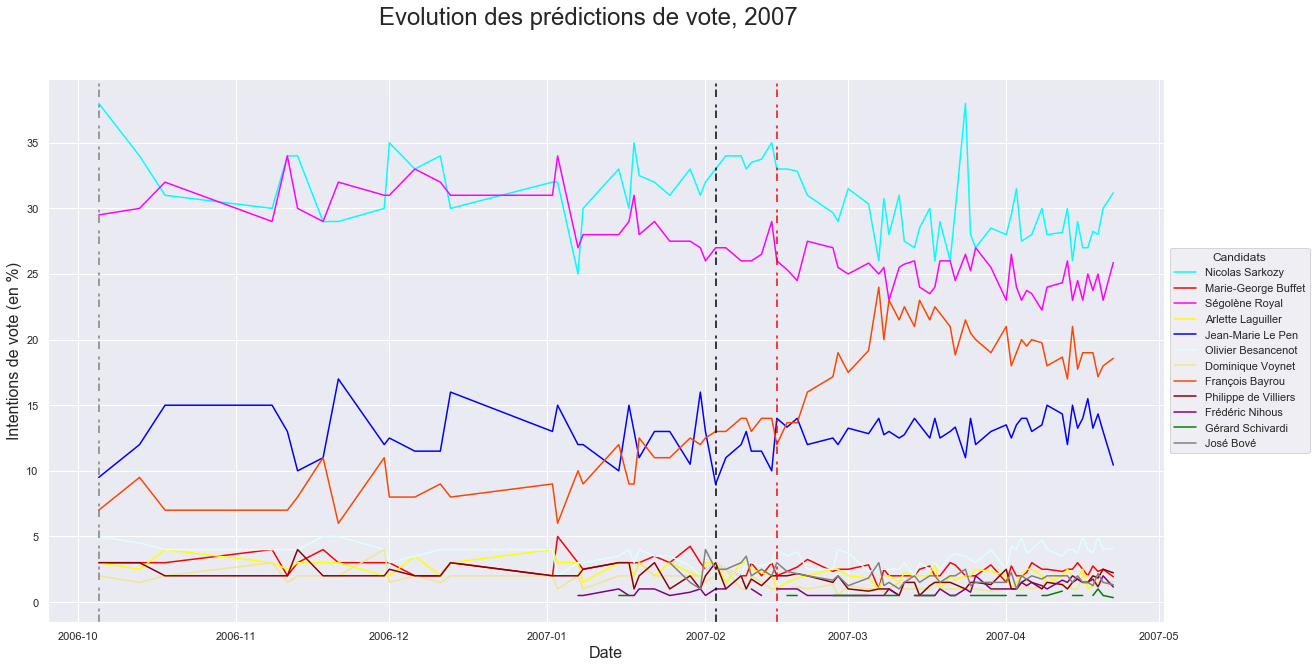

In [25]:
fig = plt.figure(figsize=(20,10))

plt.plot(df_final.index,"Nicolas Sarkozy", data=df_final, color="cyan",label="Nicolas Sarkozy")
plt.plot(df_final.index,"Marie-George Buffet", data=df_final, color="red")
plt.plot(df_final.index,"Ségolène Royal", data=df_final, color="magenta")
plt.plot(df_final.index,"Arlette Laguiller", data=df_final, color="yellow")
plt.plot(df_final.index,"Jean-Marie Le Pen", data=df_final, color="blue")
plt.plot(df_final.index,"Olivier Besancenot", data=df_final, color="lightcyan")
plt.plot(df_final.index,"Dominique Voynet", data=df_final, color="khaki")
plt.plot(df_final.index,"François Bayrou", data=df_final, color="orangered")
plt.plot(df_final.index,"Philippe de Villiers", data=df_final, color="darkred")
plt.plot(df_final.index,"Frédéric Nihous", data=df_final, color="purple")
plt.plot(df_final.index,"Gérard Schivardi", data=df_final, color="green")
plt.plot(df_final.index,"José Bové", data=df_final, color="gray")

fig.suptitle('Evolution des prédictions de vote, 2007',size=24)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title ="Candidats")
plt.xlabel("Date", size=16)
plt.ylabel("Intentions de vote (en %)", size=16)

x=datetime.strptime('3-2-2007', "%d-%m-%Y")
y=datetime.strptime('15-2-2007', "%d-%m-%Y")
z=datetime.strptime('5-10-2006', "%d-%m-%Y")

l= plt.axvline(x, color="black")
m= plt.axvline(y, color="red")
n= plt.axvline(z, color="grey")

l.set_dashes([5,2,2,5])
m.set_dashes([5,2,2,5])
n.set_dashes([5,2,2,5])

####  <span style="color:darkblue"> Commentaire 
<span style="color:darkblue">  Sur le graphique : 
- <span style="color:darkblue">  **La droite verticale grise** correspond à la date à laquelle les sondages donnent pour la première fois le bon duo de candidats sélectionnés au second tour. On visualise à nouveau l'efficacité des sondeurs pour déterminer bien avant les élections ce qu'en sera l'issue majeure. 
- <span style="color:darkblue">**La droite verticale noire** correspond à la date à laquelle les sondages donnent pour la première fois le bon ordre des quatre principaux candidats de 2007 (on néglige les quelques "erreurs de parcours" qui arrivent par la suite de manière très ponctuelles). Ici encore, cette date est fortement éloignée de celle de l'élection, ce qui prouvent encore l'efficacité des sondeurs. 
- <span style="color:darkblue">**La droite verticale rouge** correspond à la date à laquelle un premier sondage (extérieur à notre échantillon) place François Bayrou vainqueur face à Sarkozy au second tour. On voit qu'à partir de cette date, Bayrou connaît une percée fulgurante dans les sondages, ce qui peut témoigner du fait que, face à cette prédiction, les électeurs de gauche ont changé de comportement et se sont représentés Bayrou comme le meilleur candidat en mesure de porter leurs convictions au sommet. Cela témoigne de l'influence que peuvent avoir les sondages sur la politique elle-même. Plus que simplement "dire" la politique, il semblerait que les sondages soient parfois en mesure de "faire" la politique. 

### A.2) Visualisation interactive 

## B) Lissage des courbes 

###### Objectif 
Cette dernière section est purement esthétique : on souhaite lisser les courbes précédentes pour obtenir une tendance globale plus fluide et plus lisible. Pour cela, on passe par un nouveau dataframe (__df_ultime__) qui prend comme données la moyenne sur cinq sondages. 

In [26]:
#Lissage des courbes en lissant les données

dSarkozy=[]
dBuffet=[]
dRoyal=[]
dLaguiller=[]
dLePen=[]
dBesancenot=[]
dVoynet=[]
dBayrou=[]
dVilliers=[]
dNihoust=[]
dSchivardi=[]
dBové=[]

for i in range(0,len(df_final.index)-4):
    dSarkozy.append((df_final['Nicolas Sarkozy'][i]+df_final['Nicolas Sarkozy'][i+1]+df_final['Nicolas Sarkozy'][i+2]+df_final['Nicolas Sarkozy'][i+3]+df_final['Nicolas Sarkozy'][i+4])/5)
    dBuffet.append((df_final['Marie-George Buffet'][i]+df_final['Marie-George Buffet'][i+1]+df_final['Marie-George Buffet'][i+2]+df_final['Marie-George Buffet'][i+3]+df_final['Marie-George Buffet'][i+4])/5)
    dRoyal.append((df_final['Ségolène Royal'][i]+df_final['Ségolène Royal'][i+1]+df_final['Ségolène Royal'][i+2]+df_final['Ségolène Royal'][i+3]+df_final['Ségolène Royal'][i+4])/5)
    dLaguiller.append((df_final['Arlette Laguiller'][i]+df_final['Arlette Laguiller'][i+1]+df_final['Arlette Laguiller'][i+2]+df_final['Arlette Laguiller'][i+3]+df_final['Arlette Laguiller'][i+4])/5)
    dLePen.append((df_final['Jean-Marie Le Pen'][i]+df_final['Jean-Marie Le Pen'][i+1]+df_final['Jean-Marie Le Pen'][i+2]+df_final['Jean-Marie Le Pen'][i+3]+df_final['Jean-Marie Le Pen'][i+4])/5)
    dBesancenot.append((df_final['Olivier Besancenot'][i]+df_final['Olivier Besancenot'][i+1]+df_final['Olivier Besancenot'][i+2]+df_final['Olivier Besancenot'][i+3]+df_final['Olivier Besancenot'][i+4])/5)
    dVoynet.append((df_final['Dominique Voynet'][i]+df_final['Dominique Voynet'][i+1]+df_final['Dominique Voynet'][i+2]+df_final['Dominique Voynet'][i+3]+df_final['Dominique Voynet'][i+4])/5)
    dBayrou.append((df_final['François Bayrou'][i]+df_final['François Bayrou'][i+1]+df_final['François Bayrou'][i+2]+df_final['François Bayrou'][i+3]+df_final['François Bayrou'][i+4])/5)
    dVilliers.append((df_final['Philippe de Villiers'][i]+df_final['Philippe de Villiers'][i+1]+df_final['Philippe de Villiers'][i+2]+df_final['Philippe de Villiers'][i+3]+df_final['Philippe de Villiers'][i+4])/5)
    dNihoust.append((df_final['Frédéric Nihous'][i]+df_final['Frédéric Nihous'][i+1]+df_final['Frédéric Nihous'][i+2]+df_final['Frédéric Nihous'][i+3]+df_final['Frédéric Nihous'][i+4])/5)
    dSchivardi.append((df_final['Gérard Schivardi'][i]+df_final['Gérard Schivardi'][i+1]+df_final['Gérard Schivardi'][i+2]+df_final['Gérard Schivardi'][i+3]+df_final['Gérard Schivardi'][i+4])/5)
    dBové.append((df_final['José Bové'][i]+df_final['José Bové'][i+1]+df_final['José Bové'][i+2]+df_final['José Bové'][i+3]+df_final['José Bové'][i+4])/5) 
    

In [27]:
df_ultime=pd.DataFrame(list(zip(dSarkozy,dBuffet,dRoyal,dLaguiller,dLePen,dBesancenot,dVoynet,dBayrou,dVilliers,dNihoust,dSchivardi,dBové)),columns=['Nicolas Sarkozy','Marie-George Buffet','Ségolène Royal','Arlette Laguiller','Jean-Marie Le Pen','Olivier Besancenot','Dominique Voynet','François Bayrou','Philippe de Villiers','Frédéric Nihous','Gérard Schivardi','José Bové'])
df_ultime.index = df_final.index[4:90]

C:\Users\22sir\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\22sir\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\22sir\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\Users\22sir\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and

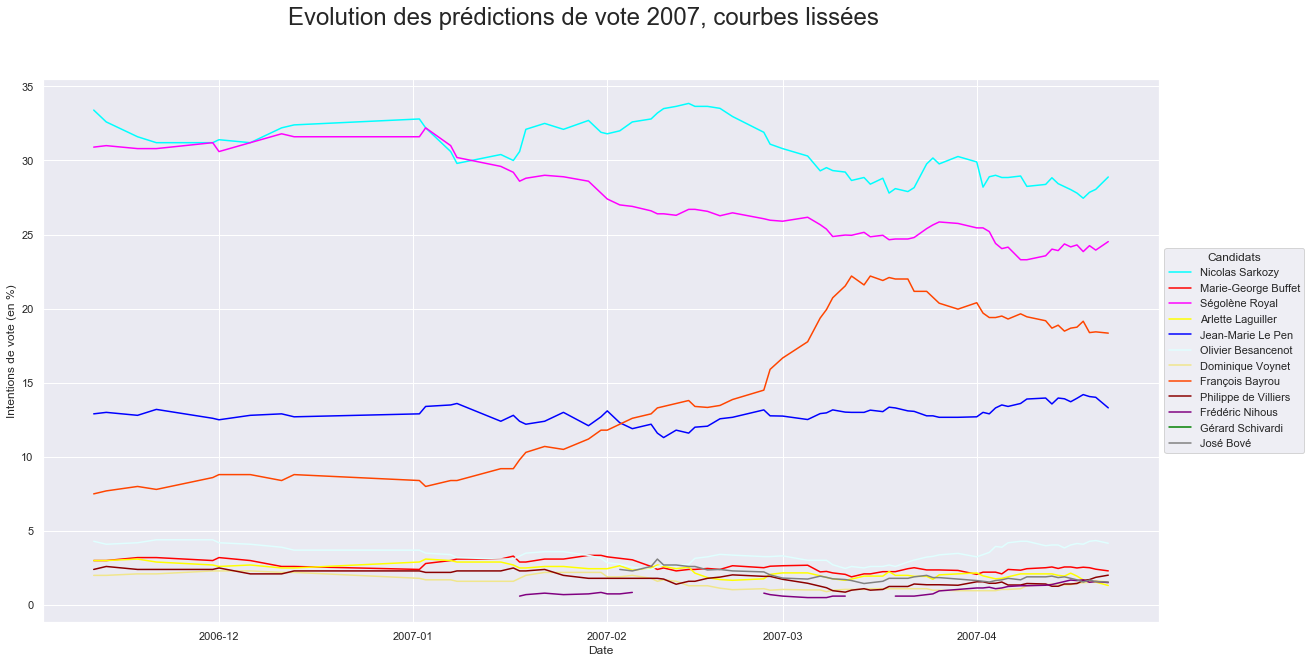

In [28]:
fig = plt.figure(figsize=(20,10))

fig.suptitle('Evolution des prédictions de vote 2007, courbes lissées',size=24)
plt.xlabel("Date")
plt.ylabel("Intentions de vote (en %)")

plt.plot(df_ultime.index,"Nicolas Sarkozy", data=df_ultime, color="cyan")
plt.plot(df_ultime.index,"Marie-George Buffet", data=df_ultime, color="red")
plt.plot(df_ultime.index,"Ségolène Royal", data=df_ultime, color="magenta")
plt.plot(df_ultime.index,"Arlette Laguiller", data=df_ultime, color="yellow")
plt.plot(df_ultime.index,"Jean-Marie Le Pen", data=df_ultime, color="blue")
plt.plot(df_ultime.index,"Olivier Besancenot", data=df_ultime, color="lightcyan")
plt.plot(df_ultime.index,"Dominique Voynet", data=df_ultime, color="khaki")
plt.plot(df_ultime.index,"François Bayrou", data=df_ultime, color="orangered")
plt.plot(df_ultime.index,"Philippe de Villiers", data=df_ultime, color="darkred")
plt.plot(df_ultime.index,"Frédéric Nihous", data=df_ultime, color="purple")
plt.plot(df_ultime.index,"Gérard Schivardi", data=df_ultime, color="green")
plt.plot(df_ultime.index,"José Bové", data=df_ultime, color="gray")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = "Candidats")

couleurs1 = ["cyan","red","magenta","yellow","blue","lightcyan","khaki","orangered","darkred","purple","green","gray"]
fig1 = px.line(df_ultime,y=df_ultime.columns, color_discrete_sequence = couleurs1,
                 labels={
                     "index":"Date du sondage",
                     "value":"Pourcentage",
                     "variable":"Candidats"
                 },
             title="Sondages du premier tour de la présidentielle de 2007",
             )
fig1.show() 

## <span style="color:darkred"> Conclusion 2007 

**Les sondages "disent" la politique.**
- **Stabilité** : Les sondages avant les présidentielles présentent une faible volatilité et ce d'autant plus à partir du mois de mars 2007. Certes, une fois que François Bayrou passe devant Jean-Marie le Pen dans les sondages, il connaît une augmentationn importante dans les intentions de vote. Néanmoins, il n'arrive pas à inquiéter les deux principaux acteurs de la présidentielle, Nicolas Sarkozy et Ségolène Royal. 
- **Précision** : En 2007, les sondages témoignent d'une véritable efficacité pour estimer ce que seront les résultats de l'élection. On connaît dès le début le duo de candidats du second tour et l'ordre des quatre plus gros candidats dès le 3 février, soit 105 jours avant l'élection. Enfin, on remarque que l'indice de fiabilité des sondages, qui dépend des candidats observés, s'améliore à mesure que l'on s'approche de l'élection et se situe entre 0,1 et 0,15 2 mois avant les élections. Il est de 0,1 proche de l'élection (un très bon score si l'on prend en compte la marge d'erreur des sondages).
- **Schéma Traditionnel** :  Cette élection obéit également au schéma traditionnel des élections présidentielles avec un fort clivage droite/gauche et une représentation homogène : un candidat de l'extrême gauche, un autre de la gauche, un du centre, un de la droite et un autre de l'extrême droite. Retrouverons-nous un tel schéma dans les élections à venir ?

**Les sondages "font" la politique**
On remarque déjà le poids et l’influence des sondages dans la politique elle-même puisqu’ils peuvent influencer le comportement des électeurs (*cf* la montée de F. Bayrou au mois de mars). Nous verrons si cela se confirme par la suite.

# <span style="color:darkred"> Election de 2012 

## I] Préparation des données (2012)

## A) Récupération des données

In [29]:
#scrapping des données sur Wikipédia
url_Sondages_2012 = "https://en.wikipedia.org/wiki/Opinion_polling_for_the_2012_French_presidential_election"
request_text = request.urlopen(url_Sondages_2012).read()
page = bs4.BeautifulSoup(request_text, "lxml")

#### Remarque 

On extrait nos données de Wikipédia, cependant on ne les récupère pas toutes, avant une certaine date (par exemple le choix définitif des candidats des partis politiques), il n'est pas pertinent de récupérer les données.

### A.1) Récupération des données de la campagne officielle

In [30]:
#On extrait les données du tableau
tableau_sondages = page.find('table',{'class':'wikitable sortable'})
table_body = tableau_sondages.find('tbody')
rows = table_body.find_all('tr') 

#On récupère les en-têtes 
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]

#On crée un dictionnaire avec les données
dico_participants = dict()
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    if len(cols) > 1 : 
        x=cols[0]
        cols[0]=cols[1]
        cols[1]=x
        dico_participants[cols[0]] = cols[1:]

#On crée le dataframe 
data_participants = pd.DataFrame.from_dict(dico_participants,orient='index')
data_participants.columns = ['Institut de sondage','Nombre de sondés','Abstention','Arthaud','Poutou','Mélenchon','Hollande','Joly','Bayrou','Sarkozy','Dupont-Aignan','Le Pen','Cheminade']

### A.2) Récupération des données de la pré-campagne (12 octobre 2011-19 mars 2012)

In [31]:
tableau_sondages = page.find_all('table',{'class':'wikitable'})
tableau_sondages_précampagne_2012 = tableau_sondages[1]
tableau_body = tableau_sondages_précampagne_2012.find('tbody')
rows = tableau_body.find_all('tr')
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
dico_sondages_précampagne2012 = dict()
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    if len(cols) > 1 : 
        x=cols[0]
        cols[0]=cols[1]
        cols[1]=x
        dico_sondages_précampagne2012[cols[0]] = cols[1:]
data_sondages_précampagne2012 = pd.DataFrame.from_dict(dico_sondages_précampagne2012,orient='index')
data_sondages_précampagne2012.columns=['Institut de sondage','Nombre de sondés','Abstention','Arthaud','Poutou','Mélenchon','Chevènement','Hollande','Joly','Bayrou','Lepage','Villepin','Morin','Nihous','Sarkozy','Boutin','Dupont-Aignan','Le Pen','Cheminade']

### A.3) Dataframe sondages élection 2012

On réunit les données des sondages de l'élection de 2007 dans un unique dataframe, __data_2012__.

In [32]:
data_2012 = pd.concat([data_participants,data_sondages_précampagne2012])
#data_2012

## B) Nettoyage des données

##### Remarque
Il s'agit ici de retravailler le dataframe __data_2012__, pour enlever les valeurs incompatibles, organiser les données et transformer les valeurs en valeurs numériques afin de pouvoir les utiliser par la suite pour réaliser des statistiques descripitives et des graphiques explicatifs.

### B.1) On retire les éléments non numériques du dataframe

In [33]:
# On retire les %,<,- qui polluent nos données 
for i in range(0,142):
    for j in range(0,19): 
        data_2012.iloc[i,j]=str(data_2012.iloc[i,j])

for i in range(0,142):
    for j in range(0,19):
        data_2012.iloc[i,j]=data_2012.iloc[i,j].replace("%","")
        data_2012.iloc[i,j]=data_2012.iloc[i,j].replace("<","")
        data_2012.iloc[i,j]=data_2012.iloc[i,j].replace("–","NaN")
        data_2012.iloc[i,j]=data_2012.iloc[i,j].replace("None","NaN")

# On s'assure une première fois qu'il ne s'agit pas de valeurs string
for i in range(0,142):
    for j in range(3,19): 
        data_2012.iloc[i,j]=float(data_2012.iloc[i,j])

# On crée un nouveau dataframe débarassé des quelques lignes 
#inadaptées qui ne correspondent pas à un sondage en particulier 
new_data_2012 = data_2012.drop("1%")
new_data_2012 = new_data_2012.drop("0.5%")

### B.2) Réindexation dans un ordre chronologique

In [34]:
# On récupère l'index dans un dataframe spécifique
new_data_2012=new_data_2012.reset_index()
df_index=new_data_2012["index"].str.split(" ",2, expand=True)

# On retire les coquilles et les doubles valeurs pour obtenir trois colonnes (JJ, MM, AAAA)
for i in range(0,140): 
    df_index[0][i]= df_index[0][i][:2]
    df_index.iloc[i,0] = df_index.iloc[i,0].replace("–","")
    df_index[1][i]= df_index[1][i][:3]
    df_index[2][i]= df_index[2][i][-4:]

# On crée un dictionnaire avec les mois pour remplacer les "Apr", "Mar"... par des valeurs numériques 
dico_mois=dict()
dico_mois={'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}

for i in range(0,140):
    df_index[1][i]= dico_mois[df_index[1][i]]    

# On crée une liste pour pouvoir réintégrer l'index chronologique dans notre dataframe de base 
l1=list()
l1.append(df_index[0])
l2=list()
l2.append(df_index[1])
l3=list()
l3.append(df_index[2])
l=list(range(0,140))

for i in range (0,140):
    l[i]=str(l1[0][i])+"-"+str(l2[0][i])+"-"+str(l3[0][i])

from datetime import datetime
for i in range (0,140):
    l[i]=datetime.strptime(l[i], "%d-%m-%Y")

# On réindexe et trie les valeurs par ordre chronologique 
new_data_2012.index=l
new_data_2012["index"]=l

# On crée enfin un dataframe qui est cette fois dans l'ordre chronologique (les données wiképédia étant fournies dans l'ordre opposé)
df=new_data_2012.sort_index(axis = 0, ascending = True)

### B.3) Suppression des candidats inaboutis et dernières vérifications

In [35]:
#On retire les candidats qui ne sont pas allés jusqu'au bout
del df['Chevènement']
del df['Lepage']
del df['Villepin']
del df['Morin']
del df['Nihous']
del df['Boutin']

# On s'assure à nouveau que les données sont bien numériques
for column in df.iloc[:,4:14]:
    df[column]=pd.to_numeric(df[column], downcast="float")    

### B.4) Suppression des dates en doublon

In [36]:
# Lorsque plusieurs sondages ont été faits le même jour, ou sur la même période, on utilise la moyenne sur ladite période
df_Arthaud=df.groupby("index").agg({'Arthaud':"mean"})
df_Poutou=df.groupby("index").agg({'Poutou':"mean"})
df_Mélenchon=df.groupby("index").agg({'Mélenchon':"mean"})
df_Hollande=df.groupby("index").agg({'Hollande':"mean"})
df_Joly=df.groupby("index").agg({'Joly':"mean"})
df_Bayrou=df.groupby("index").agg({'Bayrou':"mean"})
df_Sarkozy=df.groupby("index").agg({'Sarkozy':"mean"})
df_Dupont=df.groupby("index").agg({'Dupont-Aignan':"mean"})
df_LePen=df.groupby("index").agg({'Le Pen':"mean"})
df_Cheminade=df.groupby("index").agg({'Cheminade':"mean"})
df_final2012 = pd.concat([df_Arthaud,df_Poutou,df_Mélenchon,df_Hollande,df_Joly,df_Bayrou,df_Sarkozy,df_Dupont,df_LePen,df_Cheminade], axis=1)

In [37]:
#Il manque une valeur à Dupont-Aignan et une à Le Pen,
#cela peut fausser notre graphique, donc nous affectons à
#cette valeur la moyenne des deux précédentes

df_final2012['Le Pen'][34] = (df_final2012['Le Pen'][33]+df_final2012['Le Pen'][35])/2
df_final2012['Dupont-Aignan'][36] = (df_final2012['Dupont-Aignan'][35]+df_final2012['Dupont-Aignan'][37])/2
df_final2012

,Arthaud,Poutou,Mélenchon,Hollande,Joly,Bayrou,Sarkozy,Dupont-Aignan,Le Pen,Cheminade
index,,,,,,,,,,
2011-10-17,1.500000,0.50,5.500000,37.000000,3.500000,8.000000,24.000000,0.500000,17.500000,NaN
2011-10-18,0.500000,0.50,6.000000,35.000000,4.500000,6.500000,25.000000,0.500000,17.000000,NaN
2011-10-21,0.500000,0.00,6.500000,39.000000,5.000000,8.500000,24.000000,0.500000,14.000000,NaN
2011-10-28,1.000000,1.00,6.000000,35.000000,6.000000,5.500000,24.000000,0.500000,19.000000,NaN
2011-11-02,0.500000,0.50,6.000000,32.500000,4.500000,7.000000,25.500000,1.000000,19.000000,NaN
2011-11-04,0.500000,0.50,5.000000,36.000000,5.000000,6.000000,25.000000,0.500000,18.000000,NaN
2011-11-14,0.750000,0.50,6.000000,33.250000,4.000000,6.500000,26.500000,1.000000,17.500000,NaN
2011-11-18,0.500000,0.00,7.000000,30.000000,6.000000,7.000000,29.000000,0.500000,15.000000,NaN
2011-11-23,1.000000,1.00,7.000000,30.000000,5.000000,7.000000,26.000000,1.000000,18.000000,NaN


Nous avons ici obtenu notre dataframe final (__df_final2012__) des données de 2012 sur lequel  nous allons pouvoir travailler.

# II] Statistiques descriptives (2012)

###  Comment juger de l'efficacité d'un sondage ? 
    
   Pour répondre à cette interrogation, nous adoptons la même démarche que pour l'analyse des sondages de 2007 en retenant plusieurs niveaux de précision que nous rappelons ici : 
   
- Un **premier niveau** cherche avant tout à déterminer que le sondage donne les deux bons candidats du second tour (peu importe l'odre du 1er et 2e), c'est-à-dire les deux candidats entre lesquels les électeurs devront choisir leur futur président. 

- Un **second niveau** cherche à identifier les sondages suffisament performants pour donner le bon ordre des candidats (au moins pour ceux recevant plus de 5% des suffrages). Nous chercherons ici à déterminer à quelle date on obtient le bon classement des candidats pour la première fois.

- Un **dernier niveau** cherche à déterminer explicitement les sondages qui donnent les bons résultats (en pourcentage de vote) et quand. Pour cela, nous determinerons d'abord "bêtement" à quelle date (si une telle date existe) les sondages "prédisent" les pourcentages exacts de chaque candidat à 0,5% (niveau arbitraire que nous nous imposons). Ensuite, nous établirons un indice de fiabilité de chaque sondage et nous étudierons plus spécifiquement son évolution dans le temps pour juger définitivement la capacité des sondages à prédire les résultats justement. 

## A) Quelques éléments de statistiques générales

### A.1) Comparaison moyenne des sondages et résultats

###### Objectif 
On se concentre ici sur les moyennes de chaque candidat sur les différents sondages étudiés. On veut ainsi comparer ces moyennes à la réalité des résultats afin d'avoir une idée globale de la précision des sondages.

In [38]:
# On copie le dataframe pour en faire un nouveau pour effectuer nos manipulations de données
dfstatdes = df_final2012.copy()

Text(0.5, 1.0, 'MOYENNE SONDAGE')

<Figure size 576x576 with 0 Axes>

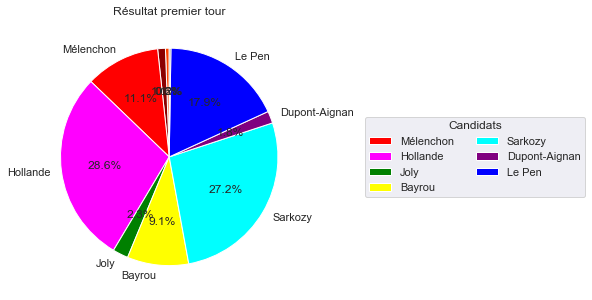

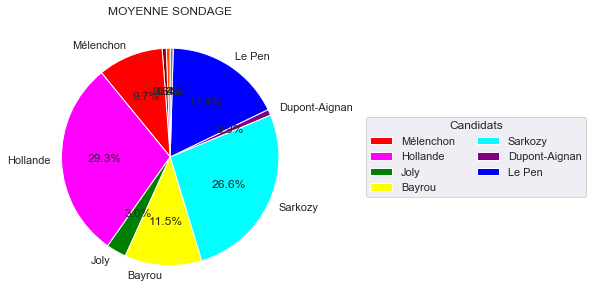

In [39]:
#Diagramme résultats de l'élection
x = []
for i in range(0,10):
    x.append(dfstatdes.iloc[91][i])
plt.figure(figsize = (8, 8))
mycolors = ["orangered", "darkred", "red", "magenta","green","yellow","cyan","purple","blue","gray"]
fig,ax2 = plt.subplots(figsize=(5, 5))
plt.pie(x, labels = ['', '', 'Mélenchon', 'Hollande', 'Joly','Bayrou','Sarkozy','Dupont-Aignan','Le Pen',''], colors = mycolors, startangle=90, autopct='%1.1f%%')
plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5), ncol = 2, title = "Candidats")
ax2.set_title("Résultat premier tour")

#Diagramme moyenne sondages
l=list()
l=[df["Arthaud"].mean(), df["Poutou"].mean(), df["Mélenchon"].mean(), df["Hollande"].mean(), df["Joly"].mean(), df["Bayrou"].mean(), df["Sarkozy"].mean(),df["Dupont-Aignan"].mean(), df["Le Pen"].mean(), df["Cheminade"].mean()]
fig,ax3 = plt.subplots(figsize=(5, 5))
plt.pie(l, labels = ['', '', 'Mélenchon', 'Hollande', 'Joly','Bayrou','Sarkozy','Dupont-Aignan','Le Pen',''], colors = mycolors, startangle=90, autopct='%1.1f%%')
plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5), ncol = 2, title = "Candidats")
ax3.set_title("MOYENNE SONDAGE")

####  <span style="color:darkblue"> Commentaire

<span style="color:darkblue"> Comme en 2007, on observe que la moyenne des sondages est proche des scores du premier tour des candidats à l'élection. Bayrou a le score le plus loin de la moyenne des prédictions, 9.1% au premier tour alors que la moyenne des sondages prévoyait 11.5%. Les sondages étaient-ils plus précis lorsque la gauche et la droite traditionnelles existaient encore ? 

## B) Analyse de la prédiction pour établir l'ordre des candidats

### B.1) A quelle date obtient-on pour la première fois le bon duo gagant ? 

###### Objectif 
On cherche ici à déterminer la date du premier sondage qui donne Nicolas Sarkozy et François Hollande au second tour (sans se soucier ici de qui est premier et qui est second). 

In [40]:
# On détermine la date du premier sondage qui donne le bon duo gagant, sélectionné pour le second tour
df=df_final2012.reset_index()
df.drop(91,0,inplace=True)

Second_Tour = list(range(0,91))
for i in range(0,91):
    if max(df["Arthaud"][i],df["Poutou"][i],df["Mélenchon"][i],df["Joly"][i],df["Bayrou"][i],df["Dupont-Aignan"][i],df["Le Pen"][i],df["Cheminade"][i])>min(df["Sarkozy"][i], df["Hollande"][i]) : 
        Second_Tour[i] = "Mauvais duo gagant"
    else: 
        Second_Tour[i] = "Bon duo gagant"   

print ("On obtient le bon duo de candidats séléctionnés pour second tour le " + str(df["index"][float(Second_Tour.index('Bon duo gagant'))].date())+".")

On obtient le bon duo de candidats séléctionnés pour second tour le 2011-10-17.


C:\Users\22sir\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


#### <span style="color:darkblue"> Commentaire 
 <span style="color:darkblue"> Comme en 2007, les sondages "prédisent" le bon duo de candidats séléctionnés pour le second tour dès le premier sondage  de notre échantillon, soit celui datant d'octobre 2011. Les sondages sont donc tout de suite efficaces pour donner les deux candidats du second tour ce qui, d'une certaine manière, est l'information essentielle qu'on peut attendre de ces derniers. Retrouverons-nous une telle efficacité en 2017 ? 

### B.2) A quelle date obtient-on pour la première fois le bon classement ? 

###### Objectif 
On s'intéresse desormais au classement des candidats et nous cherchons ainsi à déterminer la date à laquelle les sondages prédisent le bon ordre pour les candidats principaux (c'est-à-dire ceux qui recueillent plus de 5% des voix). 

In [41]:
# On détermine le premier sondage à donner le bon ordre pour les cinq premiers candidats (+ de 5% des voix)
Ordre = list(range(0,92))
for i in range(0,92):
    if ((df_final2012["Bayrou"][i] <= df_final2012["Mélenchon"][i]) and (df_final2012["Mélenchon"][i]<= df_final2012["Le Pen"][i])): 
        if ((df_final2012["Le Pen"][i] <= df_final2012["Sarkozy"][i]) and (df_final2012["Sarkozy"][i] <= df_final2012["Hollande"][i])):
            Ordre[i] = "Bon ordre  "+str(i)
        else: 
            Ordre[i] = 'Mauvais ordre  '+str(i)
    else : 
        Ordre[i] = 'Mauvais ordre  '+str(i)

In [42]:
print ("Le premier sondage à donner le bon ordre date de "+str(df_final2012.index[3].date())+".")
print ("Le bon ordre n'est complètement définitif que le "+str(df_final2012.index[89].date())+".")

Le premier sondage à donner le bon ordre date de 2011-10-28.
Le bon ordre n'est complètement définitif que le 2012-04-17.


####  <span style="color:darkblue"> Commentaire

<span style="color:darkblue"> On a pour la première fois l'ordre des 5 premiers candidats le **28 octobre 2011**, soit plus de 6 mois avant le résultat du premier tour. Cependant, cet ordre n'est pas définif, il varie encore beaucoup pendant plusieurs mois et ce n'est qu'une **semaine avant les résultats** que ce bon classement se stabilise dans les sondages au moment où Hollande repasse devant Sarkozy. Cela témoigne d'une grande difficulté à départager l'ordre des cinq premiers candidats entre eux, bien que ceux-ci soient connus depuis le début de l'effondrement des Verts en octobre 2011.

## C) Analyse de la précision pour estimer les bons pourcentages de voix

### C.1) Existe-t-il une date à laquelle les sondages "prédisent" les résultats exacts ? 

##### Objectif 
On souhaite désormais déterminer si les sondages sont capables, à un certain moment, de donner avec précision les résultats des candidats. Par souci de simplicité, nous nous concentrerons sur les deux principaux candidats de cette élection à savoir (Nicols Sarkozy et François Hollande). Nous nous demandons ainsi s'il existe une date à partir de laquelle les sondages prédisent quasi exactement les résultats de ces deux candidats.

##### Remarques : 
- Comme en 2007, on se fixe ici arbitrairement une marge de + ou - 0,5% (par rapport aux résultats du 22 Avril) pour construire des intervalles de confiance et déterminer à quel moment dans le temps les sondages prédisent des chiffres qui appartient à ces intervalles (si une telle date existe). 
- Pour les mêmes raisons qu'en 2007, on ne prend pas en compte les marges d'erreur des sondeurs.

Dans le dataframe qui suit (__dfstatdes__), la colonne "Intervalle confiance vainqueur 1" vaut *True* si le sondage prédit le score de Sarkozy à + ou - 0,5% et la la colonne "Intervalle confiance vainqueur 2" vaut *True* si le sondage prédit le score de Hollande à + ou - 0,5%.

In [43]:
# On copie le dataframe pour en faire un nouveau pour effectuer nos manipulations de données
dfstatdes = df_final2012.copy() 

#On crée deux listes qui nous affichent true ou false pour savoir si le sondage sort les deux vainqueurs dans l'ordre

vainqueur1=[]
vainqueur2=[]
for i in range(0,92):
    vainqueur1.append('Hollande' in dfstatdes.iloc[i].nlargest(1))
    vainqueur2.append('Sarkozy' in dfstatdes.iloc[i].nlargest(2))

#On ajoute ces listes à notre dataframe de statistiques descriptives

dfstatdes.insert(10,"Vainqueur 1", vainqueur1)
dfstatdes.insert(11,"Vainqueur 2", vainqueur2)

#Hollande (28,63%) et Sarkozy(27,18%), on va vérifier la précision des sondages à 0,5%
#On crée des listes pour vérifier si les sondages sont précis à 0,5%, c'est-à-dire appartienne à un intervalle
#de confiance de 1%

confiancevainqueur1 = []
confiancevainqueur2 = []
for i in range(0,92):
    confiancevainqueur1.append(28.63-0.5 <= dfstatdes.iloc[i][3] <= 28.63+0.5)
    confiancevainqueur2.append(27.18-0.5 <= dfstatdes.iloc[i][6] <= 27.18+0.5)
dfstatdes.insert(12,"Intervalle confiance vainqueur 1", confiancevainqueur1)
dfstatdes.insert(13,"Intervalle confiance vainqueur 2", confiancevainqueur2)
dfstatdes[["Intervalle confiance vainqueur 1","Intervalle confiance vainqueur 2"]]

,Intervalle confiance vainqueur 1,Intervalle confiance vainqueur 2
index,,
2011-10-17,False,False
2011-10-18,False,False
2011-10-21,False,False
2011-10-28,False,False
2011-11-02,False,False
2011-11-04,False,False
2011-11-14,False,False
2011-11-18,False,False
2011-11-23,False,False


####  <span style="color:darkblue"> Commentaire

 <span style="color:darkblue"> De la même façon que tout à l'heure, on ne peut pas conclure sur la précision des résultats chiffrés obtenus par les sondages. En effet, le premier sondage qui appartient à l'intervalle de confiance apparaît le **16 février 2012**, soit à deux mois du résultat du premier tour. Mais, une semaine après, les sondages n'appartiennent plus à l'intervalle de confiance et cela reste ainsi jusqu'à la veille des résultats du premier tour. La fiabilité des sondages au sens de l'intervalle de confiance que nous avons choisi s'avère peu concluante. Cette conclusion est à prendre avec précaution car nous ne prenons pas en compte la marge d'erreur des sondages fixée par les instituts de sondages.

### C.2) Indice de fiabilité des sondages. 

##### Objectif 
Sur le même modèle que ce que nous avons fait pour les sondages de 2007, nous nous intéressons ici aux indices de fiabilité des sondages de 2012, afin de quantifier la capacité des sondages à prédire les résultats justement.

Nous raisonnons de la même façon que pour l'analyse de l'indice de fiabilité pour 2007 et utilisons la fonction __df_calcul_indice__ définie pour 2007. Nous travaillons ici sur le dataframe __df_indice__ que nous construisons ci-dessous.

##### Calcul de l'indice de fiabilité

In [44]:
#Aides au calcul de fiabilité
candidats_2012 = ["Mélenchon","Hollande","Bayrou","Sarkozy","Le Pen"]
fiabilite_2012 = ["Fiabilité Mélenchon","Fiabilité Hollande", "Fiabilité Bayrou","Fiabilité Sarkozy","Fiabilité Le Pen"]

In [45]:
#Construction de df_indice qui contient les indices de fiabilité pour chaque résultat de sondage.
df_indice = df_calcul_indice(candidats_2012,fiabilite_2012,df_final2012)
#df_indice

C:\Users\22sir\Anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\22sir\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\22sir\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

##### Evolution de l'indice de fiabilité dans le temps

Nous représentons, dans le graphique qui suit, l'évolution de l'indice de fiabilité moyen des différents sondages en fonction du temps (*indice moyen* : indice calculé pour un sondage et correspondant à la moyenne des indices associés aux résultats des candidats pour ce sondage). On observe très clairement une décroissance linéaire de l'indice de fiabilité moyen dans le temps : tout comme en 2007, plus on se rapproche de l'élection et plus les sondages sont fiables.

Sur le graphique de droite, nous représentons une régression linéaire afin de justifier, au moins visuellement la pertinence de réaliser une telle régression sur ces données.

C:\Users\22sir\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\22sir\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\22sir\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\22sir\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be r

Text(0.5, 0, "Distance à l'élection (en nombre de jours)")

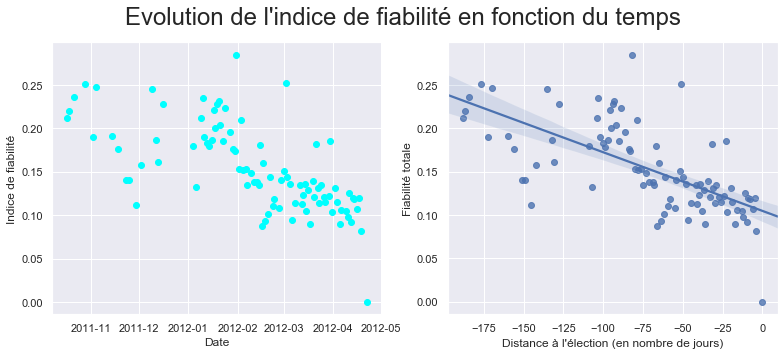

In [46]:
fig,ax = plt.subplots(1,2,figsize=(13,5))
ax[0].plot(df_final2012.index,"Fiabilité totale", "o", data=df_indice, color="cyan")
sns.regplot(x="durée", y="Fiabilité totale", data=df_indice, ax=ax[1])

#Titres et axes
fig.suptitle("Evolution de l'indice de fiabilité en fonction du temps",size=24)
ax[0].set_ylabel('Indice de fiabilité')
ax[0].set_xlabel('Date')
ax[1].set_xlabel("Distance à l'élection (en nombre de jours)")

Nous représentons ci-dessous les résidus associés à la régression précédente. Ces derniers semblent bien aléatoires.

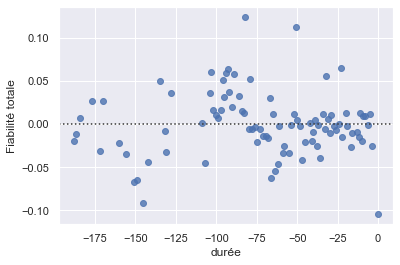

In [47]:
#Résidus de la régression
fig = sns.residplot(x="durée", y="Fiabilité totale", data=df_indice)

####  <span style="color:darkblue"> Commentaire 
- <span style="color:darkblue"> On observe une décroissance linéaire dans le temps de l'indice de fiabilité moyen : plus on se rapproche de l'élection et plus les sondages sont fiables (*I* est de l'ordre de  0,25 175 jours avant l'élection et de l'ordre de 0,10 proche de l'élection). On retrouve des résultats très similaires à la situation de 2007 ($I=0,1$ proche de l'élection en 2007 et en 2012).

La forme des données nous invite donc à approfondir la régression linéaire afin d'obtenir les paramètres numériques de la régression.

In [48]:
#La régression linéaire
df = df_indice[['durée','Fiabilité totale']].astype(np.float64)
X = sm.add_constant(df['durée'])
results = sm.OLS(df['Fiabilité totale'], X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Fiabilité totale   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     71.93
Date:                Wed, 05 Jan 2022   Prob (F-statistic):           4.13e-13
Time:                        18:39:10   Log-Likelihood:                 172.82
No. Observations:                  92   AIC:                            -341.6
Df Residuals:                      90   BIC:                            -336.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1048      0.007     15.091      0.0

C:\Users\22sir\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


####  <span style="color:darkblue"> Commentaire 
- <span style="color:darkblue"> Le $R^{2}$ est de 0,44, très proche de celui de 2007. La p-valeur associée à la pente de la variable "durée" est nulle. La valeur de la pente est donc significative. Se rapprocher de 10 jour de l'élection diminue donc l'indice de fiabilité (donc augmente la fiabilité du sondage) de 0,007 points (décroissance plus faible qu'en 2007 (pente de 0,01)).

In [49]:
candidat = ["Mélenchon","Hollande","Bayrou","Sarkozy","Le Pen"] 
list_df = [0]*5

#Création d'une liste de 7 df contenant les données propres à chacun des 6 candidats
for i in range(5):
    data = df_indice[[candidat[i],"Fiabilité "+candidat[i],"date","durée"]]
    data["Candidat"]=candidat[i]
    data["Score"]=data[candidat[i]]
    data["Fiabilité"]=data["Fiabilité "+candidat[i]]
    data.drop("Fiabilité "+candidat[i], axis=1, inplace=True)
    data.drop(candidat[i], axis=1, inplace=True)
    list_df[i] = data
    
data_final = pd.concat(list_df, join = 'inner', ignore_index = True)
data_final

#Suppression des lignes donnant le résultat du vote
data_final = data_final[data_final["date"]!="Résultats"]
#data_final

C:\Users\22sir\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\22sir\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\22sir\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

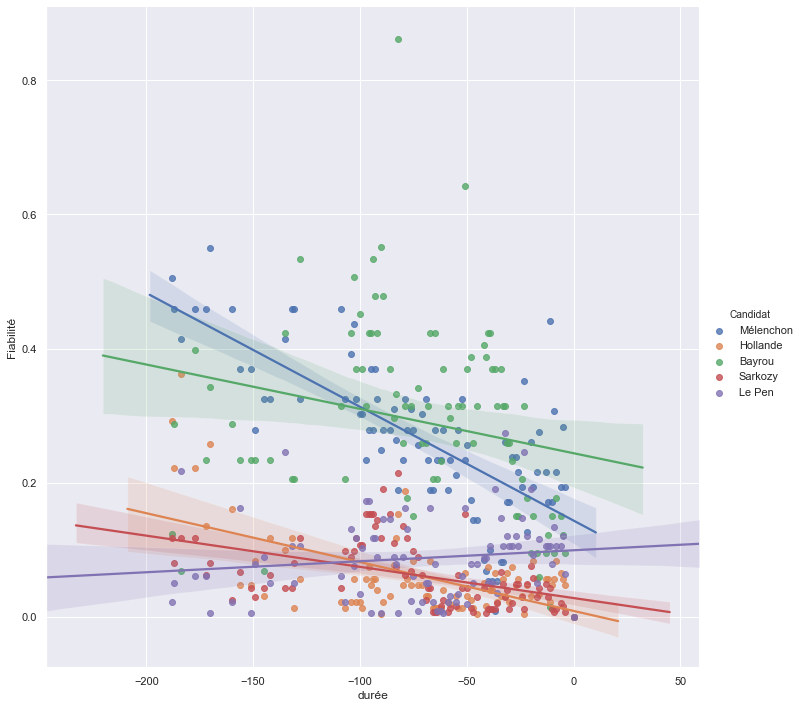

In [50]:
sns.lmplot(x="durée", y="Fiabilité", hue="Candidat", data=data_final, height=10)

####  <span style="color:darkblue"> Commentaire 
- <span style="color:darkblue"> On observe ici de grandes différences d'évolution de l'indice de fiabilité suivant le candidat considéré. On distingue globalement deux groupes de candidats : un premier groupe avec des indices de fiabilité globalement élevés (Mélechon et Bayrou) et un autre (Hollande, Le Pen et Sarkozy) à l'indice plus faible proche de résultats de sondages à la fiabilité parfaite (aux environs de $I=10$). Les évolutions dans le temps diffèrent également entre candidats : la modélisation linéaire est plus ou moins pertinente suivant les candidats et les pentes plus ou moins fortes.
- <span style="color:darkblue"> Parrapport à 2007, Bayrou voit ses indices de fiabilité s'améliorer, de même si l'on compare la fiabilité de Jean-Marie Le Pen et Marine Le Pen.

L'indice de fiabilité semble donc, tout comme en 2017, dépendre du candidat. C'est ce que nous observons ci-dessous en affichant les boîtes à moustache permettant de visualiser la distribution des indices de fiabilité des prédictions de vote pour chaque candidat. Par exemple, sur le graphique de droite, un point bleu pourrait correspondre, par exemple, à l'indice de fiabilité du résultat obtenu par  Mélenchon pour le sondage du 2 février.

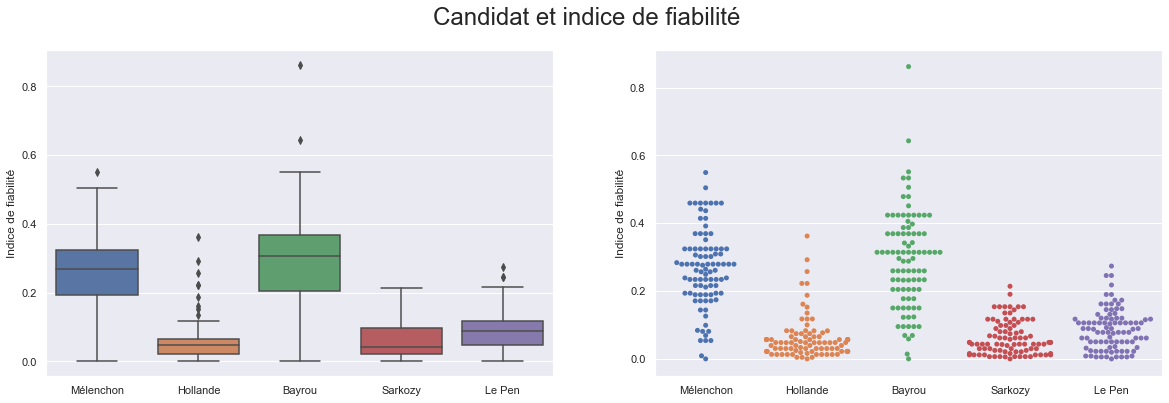

In [51]:
boite_moustache_fiabilite("Candidat",data_final)

####  <span style="color:darkblue"> Commentaire 
<span style="color:darkblue">  La distribution de l'indice de fiabilité dépend du candidat considéré.
- <span style="color:darkblue"> On retrouve deux groupes de candidats suivant la valeur des indices de fiabilité (importants ou faibles)
- <span style="color:darkblue">  Tout comme en 2007, les candidats PS et UMP sont ceux dont l'indice de fiabilité est très bon (indice très resserré et inférieur à 0,1).
  
### <span style="color:darkblue"> Commentaire sur l'indice de fiabilité
L'indice de fiabilité nous permet de quantifier la fiabilité des sondages. Deux points sont à retenir:
- **Evolution de la fiabilité dans le temps :** tout comme en 2007, l'indice de fiabilité s'améliore à mesure que l'on approche de l'élection. Les sondages sont de plus en plus fiables.
- **Indice de fiabilité et candidats** : on observe, ici encore, une différence de distribution et d'évolution dans le temps de l'indice de fiabilité suivant les candidats.

#  III] Visualisation graphique (2012) 

## A) Visualisation des données brutes

#### Objectif 

À partir du dataframe obtenu dans le I], on trace les courbes montrant l'évolution de chaque candidat dans les sondages depuis fin 2011 jusqu'au résultat du premier tour. On cherche ainsi à observer graphiquement les dates auxquelles les sondages deviennent pertinents et identifier les possibles phénomènes explicatifs de ces évolutions.

### A.1) Visualisation statique

C:\Users\22sir\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\22sir\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\22sir\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\Users\22sir\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and

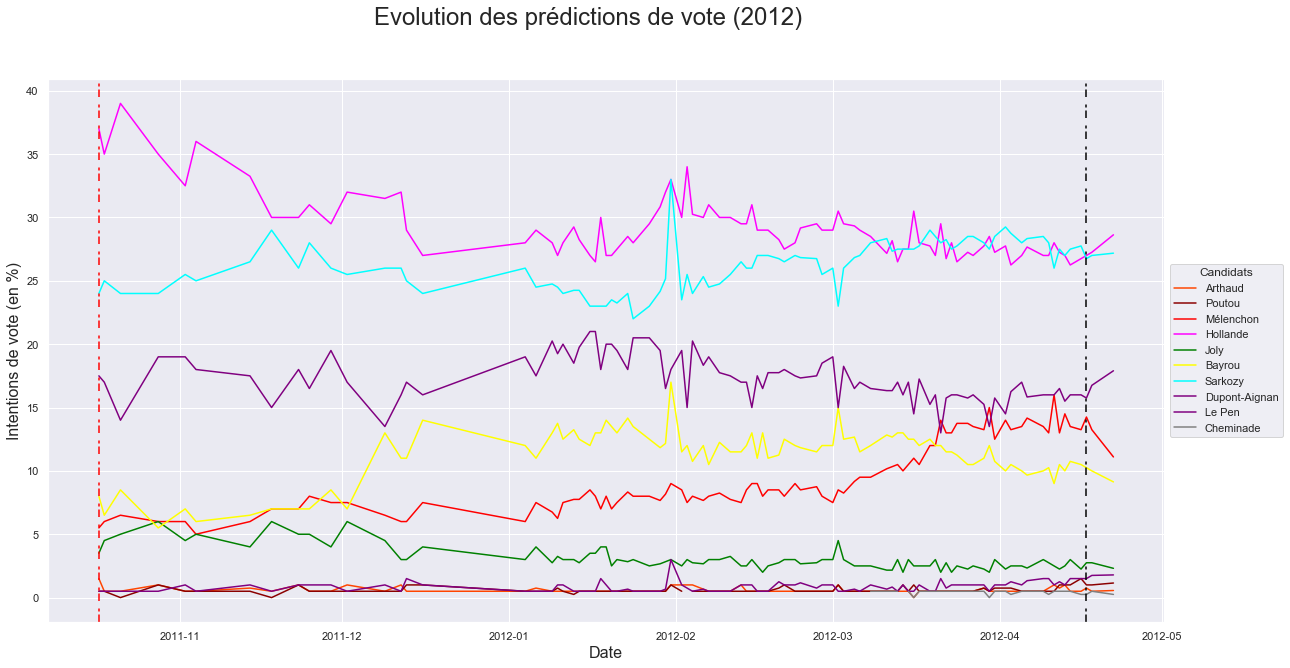

In [78]:
fig = plt.figure(figsize=(20,10))

plt.plot(df_final2012.index,"Arthaud", data=df_final2012, color="orangered")
plt.plot(df_final2012.index,"Poutou", data=df_final2012, color="darkred")
plt.plot(df_final2012.index,"Mélenchon", data=df_final2012, color="red")
plt.plot(df_final2012.index,"Hollande", data=df_final2012, color="magenta")
plt.plot(df_final2012.index,"Joly", data=df_final2012, color="green")
plt.plot(df_final2012.index,"Bayrou", data=df_final2012, color="yellow")
plt.plot(df_final2012.index,"Sarkozy", data=df_final2012, color="cyan")
plt.plot(df_final2012.index,"Dupont-Aignan", data=df_final2012, color="purple")
plt.plot(df_final2012.index,"Le Pen", data=df_final2012, color="purple")
plt.plot(df_final2012.index,"Cheminade", data=df_final2012, color="gray")

fig.suptitle('Evolution des prédictions de vote (2012)',size=24)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Candidats")
plt.xlabel("Date", size=16)
plt.ylabel("Intentions de vote (en %)", size=16)

x=datetime.strptime('17-04-2012', "%d-%m-%Y")
z=datetime.strptime('17-10-2011', "%d-%m-%Y")
l= plt.axvline(x, color="black")
n= plt.axvline(z, color="red")

l.set_dashes([5,2,2,5])
n.set_dashes([5,2,2,5])

#2012. Nicolas Sarkozy et le financement libyen. 
#A une semaine du premier tour de l'élection présidentielle de 2012, le site Mediapart
#publie une enquête affirmant que le dictateur libyen Mouammar Khadafi aurait financé 
#la campagne de 2007 du candidat de l'UMP. Le chiffre de «50 millions d'euros» est évoqué.
#Mediapart s'appuie sur un document attribué à l'ancien ministre des Affaires étrangères de Libye.
#Cette accusation intervient alors que le nom du président sortant est cité dans l'affaire Bettencourt 
#(il obtiendra un non-lieu en octobre 2013). Le Parisien

####  <span style="color:darkblue"> Commentaire 
 <span style="color:darkblue">  Sur le graphique : 
- <span style="color:darkblue"> La **droite verticale noire** correspond à la date à laquelle les sondages donnent définitivement le bon classement des cinq premiers candidats (date que nous avions déjà déterminée dans la partie précédente).
- <span style="color:darkblue"> La **droite verticale rouge** correspond à la date du premier sondage qui donne le bon duo de candidats choisi pour le second tour. Si on savait déjà quels seraient les 5 premiers (dès le 28 novembre 2011), on observe toutefois que le duel Mélenchon-Bayrou pour la 4ème et 3ème place ne se dénoue qu'à un mois du résultat du premier tour. Une fois que Mélenchon dépasse Bayrou dans les sondages, le premier ne fait qu'engrenger des intentions de vote et l'autre chute dans les sondages. Les électeurs ont-ils à partir de cette date plus placé leur espoir en Mélénchon : les sondages font-ils la politique ?  
     
<span style="color:darkblue">  On observe également que Sarkozy et Hollande se livrent à une guerre sans merci dans les sondages, surtout lorsqu'on se rapproche du premier tour, l'un dépasse l'autre et ainsi de suite, mais ce n'est qu'à une semaine du résultat du premier tour que ce duel se dénoue. En effet, l'image de Nicolas Sarkozy est éclaboussée par l'affaire du financement libyen, cela a sans doute permis à son adversaire direct de passer devant lui dans les intentions de vote et également au premier tour.

### A.2) Visualisation interactive 

#Des courbes encore plus belles...

couleurs = ["orangered","darkred","red","magenta","green","yellow","cyan","purple","blue","gray"]
fig = px.line(df_final2012,y=df_final2012.columns, color_discrete_sequence = couleurs,
                 labels={
                     "index":"Date du sondage",
                     "value":"Pourcentage",
                     "variable":"Candidats"
                 },
             title="Sondages du premier tour de la présidentielle de 2012",
             )
fig.add_annotation(x=datetime.strptime('18-4-2012', "%d-%m-%Y"), y=28,
            text="Hollande passe devant Sarkozy",
            showarrow=True,
            arrowhead=1)
fig.add_annotation(x=datetime.strptime('28-10-2011', "%d-%m-%Y"), y=5,
            text="On a les cinq premiers candidats",
            showarrow=True,
            arrowhead=1)
fig.add_annotation(x=datetime.strptime('21-03-2012', "%d-%m-%Y"), y=14,
            text="Mélanchon passe devant Bayrou",
            showarrow=True,
            arrowhead=1)
fig.show() 

## B) Lissage des courbes 

###### Objectif 
Cette derniere section est purement estéetique : on souhaite lisser les courbes précédentes obtenir une tendance globale plus fluide et plus lisible. Pour cela on passe par un nouveau dataframe (__df_ultime__) qui prend comme données la moyenne sur cinq sondages.  

In [53]:
#Lissage des courbes en lissant les données, on fait une moyenne de 5 sondages à chaque fois

dArthaud=[]
dPoutou=[]
dMélenchon=[]
dHollande=[]
dJoly=[]
dBayrou=[]
dSarkozy=[]
dDupont=[]
dLePen=[]
dCheminade=[]

for i in range(0,len(df_final2012.index)-4):
    dArthaud.append((df_final2012['Arthaud'][i]+df_final2012['Arthaud'][i+1]+df_final2012['Arthaud'][i+2]+df_final2012['Arthaud'][i+3]+df_final2012['Arthaud'][i+4])/5)
    dPoutou.append((df_final2012['Poutou'][i]+df_final2012['Poutou'][i+1]+df_final2012['Poutou'][i+2]+df_final2012['Poutou'][i+3]+df_final2012['Poutou'][i+4])/5)
    dMélenchon.append((df_final2012['Mélenchon'][i]+df_final2012['Mélenchon'][i+1]+df_final2012['Mélenchon'][i+2]+df_final2012['Mélenchon'][i+3]+df_final2012['Mélenchon'][i+4])/5)
    dHollande.append((df_final2012['Hollande'][i]+df_final2012['Hollande'][i+1]+df_final2012['Hollande'][i+2]+df_final2012['Hollande'][i+3]+df_final2012['Hollande'][i+4])/5)
    dJoly.append((df_final2012['Joly'][i]+df_final2012['Joly'][i+1]+df_final2012['Joly'][i+2]+df_final2012['Joly'][i+3]+df_final2012['Joly'][i+4])/5)
    dBayrou.append((df_final2012['Bayrou'][i]+df_final2012['Bayrou'][i+1]+df_final2012['Bayrou'][i+2]+df_final2012['Bayrou'][i+3]+df_final2012['Bayrou'][i+4])/5)
    dSarkozy.append((df_final2012['Sarkozy'][i]+df_final2012['Sarkozy'][i+1]+df_final2012['Sarkozy'][i+2]+df_final2012['Sarkozy'][i+3]+df_final2012['Sarkozy'][i+4])/5)
    dDupont.append((df_final2012['Dupont-Aignan'][i]+df_final2012['Dupont-Aignan'][i+1]+df_final2012['Dupont-Aignan'][i+2]+df_final2012['Dupont-Aignan'][i+3]+df_final2012['Dupont-Aignan'][i+4])/5)
    dLePen.append((df_final2012['Le Pen'][i]+df_final2012['Le Pen'][i+1]+df_final2012['Le Pen'][i+2]+df_final2012['Le Pen'][i+3]+df_final2012['Le Pen'][i+4])/5)
    dCheminade.append((df_final2012['Cheminade'][i]+df_final2012['Cheminade'][i+1]+df_final2012['Cheminade'][i+2]+df_final2012['Cheminade'][i+3]+df_final2012['Cheminade'][i+4])/5)

df_ultime=pd.DataFrame(list(zip(dArthaud,dPoutou,dMélenchon,dHollande,dJoly,dBayrou,dSarkozy,dDupont,dLePen,dCheminade)), columns=['Arthaud','Poutou','Mélenchon','Hollande','Joly','Bayrou','Sarkozy','Dupont-Aignan','Le Pen','Cheminade'])
df_ultime.index = df_final2012.index[4:92]
#df_ultime

C:\Users\22sir\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\22sir\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\22sir\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\Users\22sir\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and

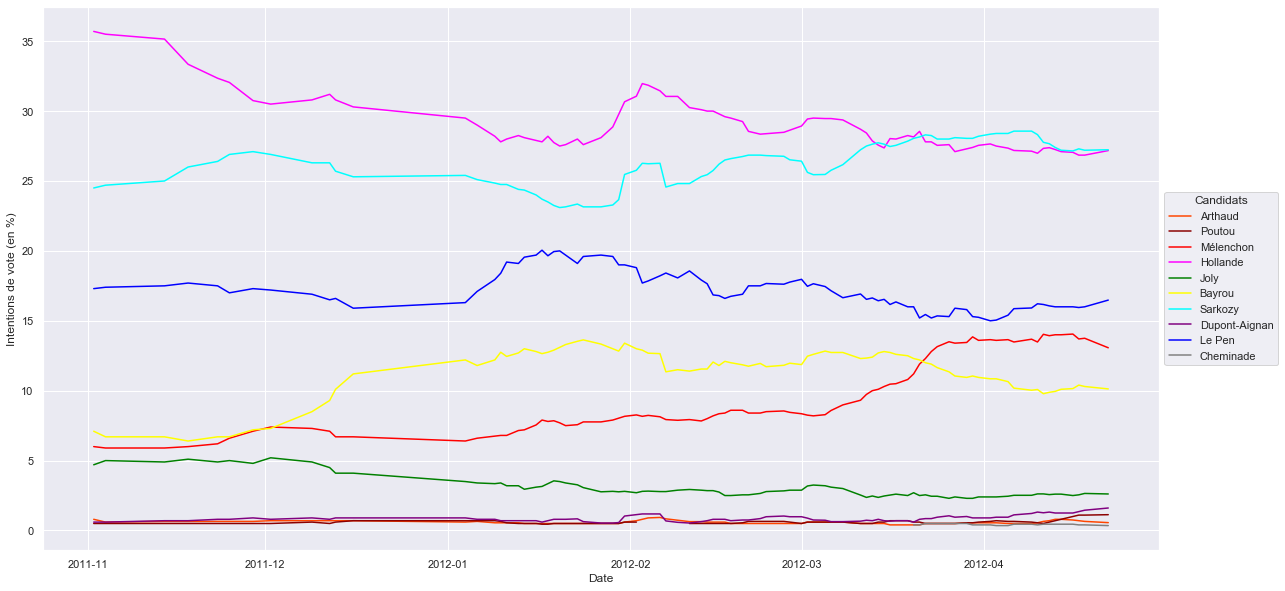

In [54]:
plt.figure(figsize=(20,10))

fig.suptitle('Evolution des prédictions de vote 2012, courbes lissées',size=24)
plt.xlabel("Date")
plt.ylabel("Intentions de vote (en %)")

plt.plot(df_ultime.index,"Arthaud", data=df_ultime, color="orangered")
plt.plot(df_ultime.index,"Poutou", data=df_ultime, color="darkred")
plt.plot(df_ultime.index,"Mélenchon", data=df_ultime, color="red")
plt.plot(df_ultime.index,"Hollande", data=df_ultime, color="magenta")
plt.plot(df_ultime.index,"Joly", data=df_ultime, color="green")
plt.plot(df_ultime.index,"Bayrou", data=df_ultime, color="yellow")
plt.plot(df_ultime.index,"Sarkozy", data=df_ultime, color="cyan")
plt.plot(df_ultime.index,"Dupont-Aignan", data=df_ultime, color="purple")
plt.plot(df_ultime.index,"Le Pen", data=df_ultime, color="blue")
plt.plot(df_ultime.index,"Cheminade", data=df_ultime, color="gray")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Candidats")

couleurs = ["orangered","darkred","red","magenta","green","yellow","cyan","purple","blue","gray"]
fig1 = px.line(df_ultime,  y=df_ultime.columns,color_discrete_sequence = couleurs,
                 labels={
                     "index":"Date du sondage",
                     "value":"Pourcentage",
                     "variable":"Candidats"
                 },
             title="Sondages du premier tour de la présidentielle de 2012",
             )
fig1.add_annotation(x=datetime.strptime('18-4-2012', "%d-%m-%Y"), y=28,
            text="Hollande passe devant Sarkozy",
            showarrow=True,
            arrowhead=1)
fig1.show()

## <span style="color:darkred"> Conclusion 2012 

**Les sondages "disent" la politique.**
- **Stabilité** : Comme en 2007, la conversion entre les intentions de vote dans les sondages et les votes réels a été plutôt bonne. Les sondages permettent de distinguer le groupe de tête dès le début de notre échantillon et également les deux candidats du second tour. Aussi, mis à part quelques faits politiques, comme par exemple l'éclatement du financement libyen, les candidats ont conservé leur classement.
- **Précision** : En 2012, les sondages témoignent donc encore d'une grande précision pour établir les candidats de tête. Toutefois, comparés à 2007, ils peinent à établir le bon ordre puisqu'il faut attendre la semaine avant l'élection pour connaître définitivement le bon classement des principaux candidats. De plus, on observe une grande difficulté pour donner des résultats justes à 0,5 point près même à quelques jours de l'échéance (ce qui n'était pas le cas en 2007). L'indice de fiabilité moyen à quelques jours des élections est cependant le même qu'en 2007 (0,1, soit des sondages plutôt bons si l'on prend en compte la marge d'erreur). Les 2 vainquers du premier tour se caractérisent par des indices de fiabilité très bons.
- **Schéma traditionnel**  Cette élection répond pourtant toujours au même schéma traditionnel avec un fort clivage droite/gauche et une répartition comparable à celle de 2007 (les cinq premiers sont : un candidat de l'extrême gauche, un de la gauche, un du centre, un de la droite et un de l'extrême droite).  Comment alors expliquer cette baisse de précision et d'efficacité et peut-on s'attendre à voir se phénomène empirer en 2017 ? 

**Les sondages "font" la politique** 
    Lors de cette campagne électorale, il a eu des duels palpitants comme Mélenchon-Bayrou , Hollande-Sarkozy. Dans le cas de Bayrou, on observe que dès l'instant qu'un sondage le place devant Mélenchon, il parvient à capitaliser sur cette pseudo victoire pour se présenter comme le candidat outsider légitime et connaît ainsi une forte hausse dans les sondages suivants. On voit donc à nouveau comment les sondages influencent les électeurs dans leur comportement lors de l'élection.  

# <span style="color:darkred"> Élection de 2017 


#  I] Préparation des données (2017)

## A) Récupération des données

In [55]:
#scrapping des données sur Wikipédia
url_Sondages_2017 = "https://en.wikipedia.org/wiki/Opinion_polling_for_the_2017_French_presidential_election"
request_text = request.urlopen(url_Sondages_2017).read()
page = bs4.BeautifulSoup(request_text, "lxml")

##### Remarque
 Comme pour les années précédentes (2007 et 2012) on utilise les données fournies par  Wikipédia. Toutefois, face à la quantité de données proposées, nous avons décidé de nous concentrer uniquement sur celles datant d'après novembre 2016, c'est-à-dire après que la primaire de la droite a lieu afin d'avoir des données cohérentes et significatives.

### A.1) Récupération des données de la campagne officielle  

In [56]:
#On extrait les données du tableau
tableau_sondages = page.find_all('table',{'class':'wikitable'})
tableau_sondages_campagne_officielle = tableau_sondages[0]
tableau_body = tableau_sondages_campagne_officielle.find('tbody')
rows = tableau_body.find_all('tr')

#On récupère les en-têtes 
columns_données = ["Fieldwork Date","Polling Firm","Sample Size","Absention"]
for row in rows:
    cols = row.find_all('th', {'class' : 'unsortable'})
    if len(cols) > 0 : 
        cols = [ele.get_text(separator=' ').strip().title() for ele in cols]
        columns_candidats = cols
columns = columns_données + columns_candidats

#On crée un dictionnaire avec les données
dico_sondage_campagne_officielle = dict()
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    if len(cols) > 1 : 
        x= cols[0]
        cols[0]=cols[1]
        cols[1]=x
        dico_sondage_campagne_officielle[cols[0]] = cols[1:]
        
#On crée le dataframe 
data_sondage_campagne_officielle = pd.DataFrame.from_dict(dico_sondage_campagne_officielle,orient='index')
data_sondage_campagne_officielle.columns = columns[1:]

### A.2) Récupération données de la précampagne (25 janvier 2017 - 16 mars 2017)

In [57]:
#On extrait les données du tableau
tableau_sondages = page.find_all('table',{'class':'wikitable'})
tableau_sondages_précampagne = tableau_sondages[1]
tableau_body = tableau_sondages_précampagne.find('tbody')
rows = tableau_body.find_all('tr')

#On récupère les en-têtes 
columns_données = ["Fieldwork Date","Polling Firm","Sample Size","Absention"]
for row in rows:
    cols = row.find_all('th', {'class' : 'unsortable'})
    if len(cols) > 0 : 
        cols = [ele.get_text(separator=' ').strip().title() for ele in cols]
        columns_candidats = cols
columns = columns_données + columns_candidats

#On crée un dictionnaire avec les données
dico_sondage_précampagne = dict()
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    if len(cols) > 1 : 
        x= cols[0]
        cols[0]=cols[1]
        cols[1]=x
        dico_sondage_précampagne[cols[0]] = cols[1:]
        
#On crée le dataframe 
data_sondage_précampagne = pd.DataFrame.from_dict(dico_sondage_précampagne,orient='index')
data_sondage_précampagne.columns = columns[1:]

### A.3) Récupération des données du 25 novembre 2016 au 25 janvier 2017

In [58]:
#On extrait les données du tableau
tableau_sondages = page.find_all('table',{'class':'wikitable'})
tableau_sondages_fin2016 = tableau_sondages[3]
tableau_body = tableau_sondages_fin2016.find('tbody')
rows = tableau_body.find_all('tr')

#On récupère les en-têtes 
columns_données = ["Fieldwork Date","Polling Firm","Sample Size","Absention"]
for row in rows:
    cols = row.find_all('th', {'class' : 'unsortable'})
    if len(cols) > 0 : 
        cols = [ele.get_text(separator=' ').strip().title() for ele in cols]
        columns_candidats = cols
columns = columns_données + columns_candidats

#On crée un dictionnaire avec les données
dico_sondage_fin2016 = dict()
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    if len(cols) > 1 : 
        x= cols[0]
        cols[0]=cols[1]
        cols[1]=x
        dico_sondage_fin2016[cols[0]] = cols[1:]
        
#On crée le dataframe 
data_sondage_fin2016 = pd.DataFrame.from_dict(dico_sondage_fin2016,orient='index')
data_sondage_fin2016.columns = columns[1:]

### A.4) Dataframe sondages élection 2017

On réunit les données des sondages de l'élection de 2017 dans un unique dataframe, __data_complet__.

In [59]:
data_complet = pd.concat([data_sondage_campagne_officielle, data_sondage_précampagne, data_sondage_fin2016])

## B) Nettoyage des données

##### Remarque
Il s'agit ici, comme pour ce que nous avons fait sur les données de 2007 et 2012, de retravailler le dataframe __data_complet__, pour enlever les valeurs incompatibles, organiser les données et transformer les valeurs en valeurs numériques afin de pouvoir les utiliser par la suite pour réaliser des statistiques descripitives et des graphiques explicatifs.

### B.1) On retire les éléments non numériques du dataframe 

In [60]:
# On retire les %,<,- qui polluent nos données 
for i in range(0,175):
    for j in range(0,len(data_complet.columns)): 
        data_complet.iloc[i,j]=str(data_complet.iloc[i,j])
for i in range(0,175):
    for j in range(0,len(data_complet.columns)): 
        data_complet.iloc[i,j]=data_complet.iloc[i,j].replace("%","") 
        data_complet.iloc[i,j]=data_complet.iloc[i,j].replace("<","")
        data_complet.iloc[i,j]=data_complet.iloc[i,j].replace("–","nan")
        data_complet.iloc[i,j]=data_complet.iloc[i,j].replace("None","nan")
        
# On s'assure une première fois qu'il ne s'agit pas de valeurs string 
for i in range(0,175):
    for j in range(3,len(data_complet.columns)): 
        data_complet.iloc[i,j]=float(data_complet.iloc[i,j])
        
# On crée un nouveau dataframe débarrassé des quelques lignes inadaptées qui ne correspondent pas à un sondage en particulier 
data_complet2=data_complet.drop("1.4%")
data_complet2=data_complet2.drop("0.5%")
data_complet2=data_complet2.drop("1%")
data_complet2=data_complet2.drop("1.5%")
data_complet2=data_complet2.drop("2.5%")
data_complet2=data_complet2.drop("2%")

### B.2) Réindexation dans un ordre chronologique 

In [61]:
# On récupère l'index dans un dataframe spécifique
data_complet2=data_complet2.reset_index()
df_index=data_complet2["index"].str.split(" ",2, expand=True)

# On retire les coquilles et les doubles valeurs pour obtenir trois colonnes (JJ, MM, AAAA)
for i in range(0,168): 
    df_index[0][i]= df_index[0][i][:2]
    df_index.iloc[i,0]=df_index.iloc[i,0].replace("–","")
    df_index[1][i]= df_index[1][i][:3]
    df_index.iloc[i,1]=df_index.iloc[i,1].replace("–","")
    df_index[2][i]= df_index[2][i][-4:]

# On crée un dictionnaire avec les mois pour remplacer les "Apr", "Mar"... par des valeurs numériques 
dico_mois=dict()
dico_mois={'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}

for i in range(0,168):
    df_index[1][i]= dico_mois[df_index[1][i]]

# On crée une liste pour pouvoir réintégrer l'index chronologique dans notre dataframe de base 
l1=list()
l1.append(df_index[0])
l2=list()
l2.append(df_index[1])
l3=list()
l3.append(df_index[2])
l=list(range(0,168))

for i in range (0,168):
    l[i]=str(l1[0][i])+"-"+str(l2[0][i])+"-"+str(l3[0][i])

from datetime import datetime
for i in range (0,168):
    l[i]=datetime.strptime(l[i], "%d-%m-%Y")
    
# On réindexe et trie les valeurs par ordre chronologique 
data_complet2.index=l
data_complet2["index"]=l
    # del data_complet2['index']

# On crée enfin un dataframe qui est cette fois dans l'ordre chronologique (les données wikipédia étant fournies dans l'ordre opposé)
df=data_complet2.sort_index(axis = 0, ascending = True)

### B.3) Suppression des candidats inaboutis et dernières vérifications 

In [62]:
#On retire les candidats qui ne sont pas allés jusqu'au bout
del df['Bayrou Modem']
del df['Juppé Lr']
del df['Hollande Ps']
del df['Valls Ps']
del df['Peillon Ps']
del df['Pinel Prg']

# On s'assure à nouveau que les données sont bien numériques
for column in df.iloc[:,4:17]:
    df[column]=pd.to_numeric(df[column], downcast="float")

### B.4) Suppression des dates en doublon 

In [63]:
# Lorsque plusieurs sondages ont été faits le même jour ou sur la même période, on utilise la moyenne sur ladite période
df_Arthaud=df.groupby("index").agg({'Arthaud Lo':"mean"})
df_Poutou=df.groupby("index").agg({'Poutou Npa':"mean"})
df_Mélenchon=df.groupby("index").agg({'Mélenchon Fi':"mean"})
df_Hamon=df.groupby("index").agg({'Hamon Ps':"mean"})
df_Macron=df.groupby("index").agg({'Macron Em':"mean"})
df_Lassalle=df.groupby("index").agg({'Lassalle Résistons!':"mean"})
df_Fillon=df.groupby("index").agg({'Fillon Lr':"mean"})
df_Dupont=df.groupby("index").agg({'Dupont-Aignan Dlf':"mean"})
df_Asselineau=df.groupby("index").agg({'Asselineau Upr':"mean"})
df_LePen=df.groupby("index").agg({'Le Pen Fn':"mean"})
df_Cheminade=df.groupby("index").agg({'Cheminade S&P':"mean"})
df_Jadot=df.groupby("index").agg({'Jadot Eelv':"mean"})
df_final = pd.concat([df_Arthaud,df_Poutou, df_Mélenchon, df_Hamon, df_Macron, df_Lassalle, df_Fillon, df_Dupont, df_Asselineau, df_LePen, df_Cheminade, df_Jadot], axis=1)

df_final

,Arthaud Lo,Poutou Npa,Mélenchon Fi,Hamon Ps,Macron Em,Lassalle Résistons!,Fillon Lr,Dupont-Aignan Dlf,Asselineau Upr,Le Pen Fn,Cheminade S&P,Jadot Eelv
index,,,,,,,,,,,,
2016-11-25,2.000000,1.000000,12.000000,NaN,13.000000,NaN,32.000000,2.000000,NaN,22.000000,NaN,2.000000
2016-11-27,1.000000,1.000000,13.000000,NaN,14.000000,NaN,26.000000,3.000000,NaN,24.000000,NaN,3.000000
2016-11-28,0.666667,1.000000,12.000000,NaN,16.000000,NaN,29.333334,2.166667,NaN,24.000000,0.500000,1.833333
2016-12-02,0.666667,0.833333,13.500000,NaN,14.166667,NaN,26.166666,2.000000,NaN,24.333334,0.500000,2.166667
2017-01-03,0.750000,1.500000,13.000000,NaN,17.500000,NaN,25.000000,1.500000,NaN,24.500000,0.500000,1.750000
2017-01-06,1.000000,1.000000,13.000000,NaN,16.000000,NaN,24.000000,1.500000,NaN,25.000000,NaN,2.500000
2017-01-10,1.000000,1.000000,15.000000,NaN,19.000000,NaN,24.000000,2.500000,NaN,25.000000,0.500000,2.500000
2017-01-20,1.000000,1.000000,15.000000,NaN,18.000000,NaN,25.000000,2.000000,NaN,27.000000,0.500000,2.000000
2017-01-26,0.500000,0.500000,10.000000,15.000000,21.000000,NaN,22.000000,3.500000,NaN,25.000000,0.500000,2.000000


Nous avons ici obtenu notre dataframe final (__df_final__) des données de 2007 sur lequel  nous allons pouvoir travailler.

# II] Statistiques descriptives (2017)

###  Comment juger de l'efficacité d'un sondage ? 
Pour répondre à cette interrogation, nous adoptons la même démarche que pour l'analyse des sondages de 2007 et 2012 en retenant plusieurs niveaux de précision que nous rappelons ici : 
   
- Un **premier niveau** cherche avant tout à déterminer que le sondage donne les deux bons candidats du second tour (peu importe l'odre du 1er et 2e), c'est-à-dire les deux candidats entre lesquels les électeurs devront choisir leur futur président. 

- Un **second niveau** cherche à identifier les sondages suffisament performants pour donner le bon ordre des candidats (au moins pour ceux recevant plus de 5% des suffrages). Nous chercherons ici à déterminer à quelle date on obtient le bon classement des candidats pour la première fois.

- Un **dernier niveau** cherche à déterminer explicitement les sondages qui donnent les bons résultats (en pourcentage de vote) et quand. Pour cela, nous determinerons d'abord "bêtement" à quelle date (si une telle date existe) les sondages "prédisent" les pourcentages exacts de chaque candidat à 0,5% (niveau arbitraire que nous nous imposons). Ensuite, nous établirons un indice de fiabilité de chaque sondage et nous étudierons plus spécifiquement son évolution dans le temps pour juger définitivement la capacité des sondages à prédire les résultats justement. 

## A) Quelques éléments de statistiques générales

### A.1) Comparaison moyenne des sondages et résultats

###### Objectif 
On se concentre ici sur les moyennes de chaque candidat sur les différents sondages étudiés. On veut ainsi comparer ces moyennes à la réalité des résultats afin d'avoir une idée globale de la précision des sondages.

C:\Users\22sir\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'RESULTAT 23 AVRIL 2017')

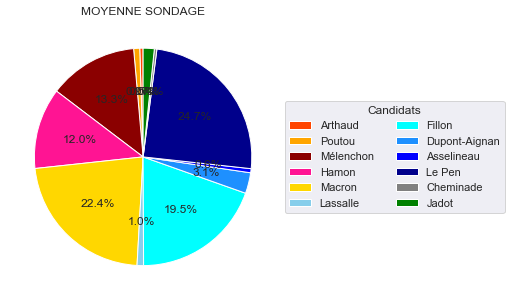

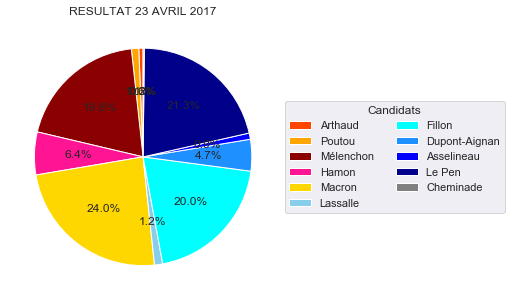

In [64]:
# On copie le dataframe pour en faire un nouveau pour effectuer nos manipulations de données
df=df_final.reset_index()
df.drop(89,0,inplace=True)

l=list()
l=[df["Arthaud Lo"].mean(), df["Poutou Npa"].mean(), df["Mélenchon Fi"].mean(), df["Hamon Ps"].mean(), df["Macron Em"].mean(), df["Lassalle Résistons!"].mean(), df["Fillon Lr"].mean(),df["Dupont-Aignan Dlf"].mean(), df["Asselineau Upr"].mean(), df["Le Pen Fn"].mean(), df["Cheminade S&P"].mean(), df["Jadot Eelv"].mean()]


#Diagramme Sondage 21 Avril 2017
labels = ["Arthaud", "Poutou", "Mélenchon", "Hamon", "Macron", "Lassalle", "Fillon", "Dupont-Aignan", "Asselineau", "Le Pen", "Cheminade", "Jadot"]
sizes = l 
colors =["orangered", "orange", "darkred", "deeppink",'gold',"skyblue", "cyan", "dodgerblue","blue" ,'darkblue', "grey", "green"]
fig,ax2 = plt.subplots(figsize=(5, 5))
plt.pie(sizes, colors=colors,  autopct='%1.1f%%', startangle=90)
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5), ncol = 2, title="Candidats")
ax2.set_title("MOYENNE SONDAGE")

# Diagramme Résultats (23 Avril 2017)  
labels = ["Arthaud", "Poutou", "Mélenchon", "Hamon", "Macron", "Lassalle", "Fillon", "Dupont-Aignan", "Asselineau", "Le Pen", "Cheminade"]
sizes = [df_final["Arthaud Lo"][89], df_final["Poutou Npa"][89], df_final["Mélenchon Fi"][89], df_final["Hamon Ps"][89], df_final["Macron Em"][89],df_final["Lassalle Résistons!"][89],df_final["Fillon Lr"][89], df_final["Dupont-Aignan Dlf"][89],df_final["Asselineau Upr"][89], df_final["Le Pen Fn"][89], df_final["Cheminade S&P"][89]]
colors =["orangered", "orange", "darkred", "deeppink",'gold',"skyblue", "cyan", "dodgerblue","blue" ,'darkblue', "grey"]
fig,ax3 = plt.subplots(figsize=(5, 5))
plt.pie(sizes, colors=colors,  autopct='%1.1f%%', startangle=90)

plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5), ncol = 2, title="Candidats")
ax3.set_title("RESULTAT 23 AVRIL 2017")



#### <span style="color:darkblue">Commentaire 
<span style="color:darkblue">On remarque (comme on pouvait s'y attendre), que la moyenne des sondages est loin de la réalité quant aux pourcentages de voix. En effet, en moyenne, les sondages prédisent Marine Le Pen gagnante. De plus ils tendent à sous-estimer gravement la part de JL. Mélenchon et à sur-estimer celle de B. Hamon. 
Toutefois, on voit également qu'ils donnent en moyenne E. Macron et M. Le Pen comme duo de candidats sélectionnés au second tour, ce qui constitue une donnée probante. 

### A.2) Comparaison des sondages sur plusieurs dates clefs

###### Objectif 
On cherche ici à opérer une première analyse de surface en comparant les sondages à différentes dates (depuis le 25 novembre -premier sondage de notre étude-, jusqu'au 21 avril -dernier sondage avant les élections-). On utilise un diagramme en camembert dans lequel on regroupe les "petits" candidats dans la catégorie "autres" afin d'identifier l'évolution de la précision des sondages. 

Text(0.5, 1.0, 'RESULTAT 23 AVRIL 2017')

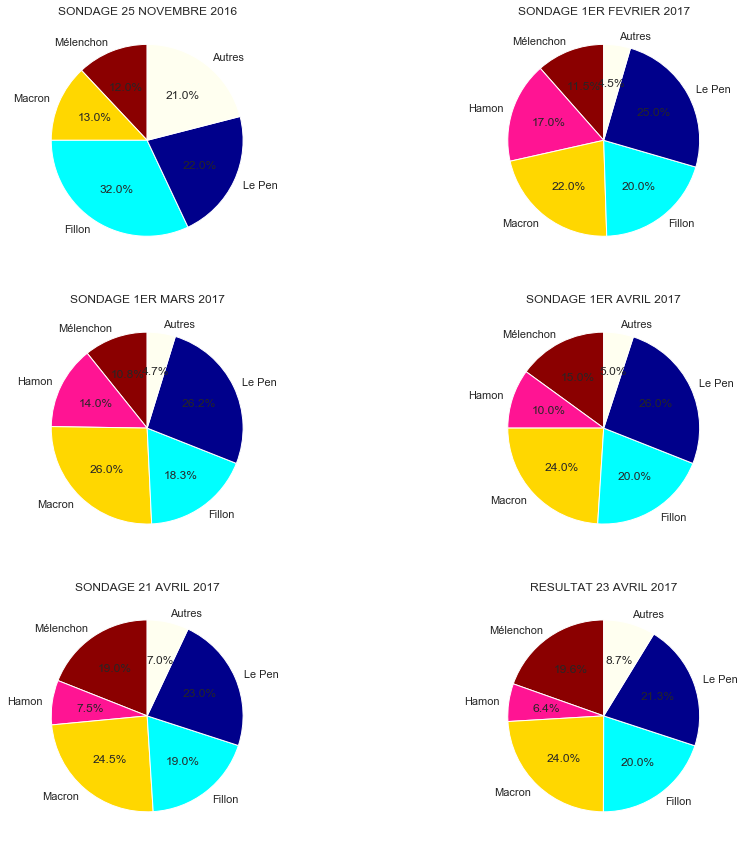

In [65]:
fig,ax = plt.subplots(3,2,figsize=(15,15))

# Diagramme Sondage 25 Novembre 2016 
labels = ["Mélenchon", "Macron", "Fillon", "Le Pen", "Autres"]
sizes = [df_final["Mélenchon Fi"][0], df_final["Macron Em"][0], df_final["Fillon Lr"][0], df_final["Le Pen Fn"][0], 100-(df_final["Mélenchon Fi"][0]+df_final["Macron Em"][0]+df_final["Fillon Lr"][0]+df_final["Le Pen Fn"][0])]
colors =["darkred",'gold',"cyan",'darkblue', "ivory"]
ax[0,0].pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
ax[0,0].set_title("SONDAGE 25 NOVEMBRE 2016")

# Diagramme Sondage Février (1er Février 2017)  
labels = ["Mélenchon", "Hamon", "Macron", "Fillon", "Le Pen", "Autres"]
sizes = [df_final["Mélenchon Fi"][12], df_final["Hamon Ps"][12], df_final["Macron Em"][12], df_final["Fillon Lr"][12], df_final["Le Pen Fn"][12], 100-(df_final["Mélenchon Fi"][12]+df_final["Hamon Ps"][12]+df_final["Macron Em"][12]+df_final["Fillon Lr"][12]+df_final["Le Pen Fn"][12])]
colors =["darkred", "deeppink",'gold',"cyan",'darkblue', "ivory"]
ax[0,1].pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
ax[0,1].set_title("SONDAGE 1ER FEVRIER 2017")

# Diagramme Sondage Mars (1er Mars 2017)  
labels = ["Mélenchon", "Hamon", "Macron", "Fillon", "Le Pen", "Autres"]
sizes = [df_final["Mélenchon Fi"][38], df_final["Hamon Ps"][38], df_final["Macron Em"][38], df_final["Fillon Lr"][38], df_final["Le Pen Fn"][38], 100-(df_final["Mélenchon Fi"][38]+df_final["Hamon Ps"][38]+df_final["Macron Em"][38]+df_final["Fillon Lr"][38]+df_final["Le Pen Fn"][38])]
colors =["darkred", "deeppink",'gold',"cyan",'darkblue', "ivory"]
ax[1,0].pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
ax[1,0].set_title("SONDAGE 1ER MARS 2017")

# Diagramme Sondage Avril (1er Avril 2017)  
labels = ["Mélenchon", "Hamon", "Macron", "Fillon", "Le Pen", "Autres"]
sizes = [df_final["Mélenchon Fi"][68], df_final["Hamon Ps"][68], df_final["Macron Em"][68], df_final["Fillon Lr"][68], df_final["Le Pen Fn"][68], 100-(df_final["Mélenchon Fi"][68]+df_final["Hamon Ps"][68]+df_final["Macron Em"][68]+df_final["Fillon Lr"][68]+df_final["Le Pen Fn"][68])]
colors =["darkred", "deeppink",'gold',"cyan",'darkblue', "ivory"]
ax[1,1].pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
ax[1,1].set_title("SONDAGE 1ER AVRIL 2017")

#Diagramme Sondage 21 Avril 2017
labels = ["Mélenchon", "Hamon", "Macron", "Fillon", "Le Pen", "Autres"]
sizes = [df_final["Mélenchon Fi"][88], df_final["Hamon Ps"][88], df_final["Macron Em"][88], df_final["Fillon Lr"][88], df_final["Le Pen Fn"][88], 100-(df_final["Mélenchon Fi"][88]+df_final["Hamon Ps"][88]+df_final["Macron Em"][88]+df_final["Fillon Lr"][88]+df_final["Le Pen Fn"][88])]
colors =["darkred", "deeppink",'gold',"cyan",'darkblue', "ivory"]
ax[2,0].pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
ax[2,0].set_title("SONDAGE 21 AVRIL 2017")

# Diagramme Résultats (23 Avril 2017)  
labels = ["Mélenchon", "Hamon", "Macron", "Fillon", "Le Pen", "Autres"]
sizes = [df_final["Mélenchon Fi"][89], df_final["Hamon Ps"][89], df_final["Macron Em"][89], df_final["Fillon Lr"][89], df_final["Le Pen Fn"][89], 100-(df_final["Mélenchon Fi"][89]+df_final["Hamon Ps"][89]+df_final["Macron Em"][89]+df_final["Fillon Lr"][89]+df_final["Le Pen Fn"][89])]
colors =["darkred", "deeppink",'gold',"cyan",'darkblue', "ivory"]
ax[2,1].pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
ax[2,1].set_title("RESULTAT 23 AVRIL 2017")

#### <span style="color:darkblue"> Commentaire 
- <span style="color:darkblue"> On observe que les sondages effectués avant avril sont fortement erronés par rapport aux résultats du 23 avril. Même au début du mois d'avril, les sondages semblent encore loin de la réalité : s'ils prédisent le bon duo de candidats du second tour (dès mars même), ils placent encore Marine Le Pen devant Emmanuel Macron.  
-<span style="color:darkblue"> Le sondage effectué à la veille de l'élection, le 21 avril paraît  quant à lui plus ou moins correct, mais on constate encore de grandes différences sur la part de vote avec souvent plus d'un pourcent d'erreur par rapport aux résultats officiels (ce qui est peut-être à relativiser si l'on prend en compte la marge d'erreurs inhérente aux sondages et calculée par les sondeurs).

## B) Analyse de la précision pour établir l'ordre des candidats

### B.1) A quelle date obtient-on pour la première fois le bon duo gagant ? 

###### Objectif 
On cherche ici à déterminer la date du premier sondage qui donne Emmanuel Macron et Marine Le Pen au second tour (sans se soucier ici de qui est premier et qui est second). 

In [66]:
# On détermine la date du premier sondage qui donne le bon duo gagant, séléctionné pour le second tour
Second_Tour = list(range(0,89))
for i in range(0,89):
    if max(df["Arthaud Lo"][i],df["Poutou Npa"][i],df["Mélenchon Fi"][i],df["Hamon Ps"][i],df["Lassalle Résistons!"][i],df["Fillon Lr"][i],df["Dupont-Aignan Dlf"][i],df["Asselineau Upr"][i],df["Cheminade S&P"][i])>min(df["Macron Em"][i], df["Le Pen Fn"][i]) : 
        Second_Tour[i] = "Mauvais duo gagnant"
    else: 
        Second_Tour[i] = "Bon duo gagnant"   

print ("On obtient le bon duo de candidats qualifiés pour le second tour le " + str(df["index"][float(Second_Tour.index('Bon duo gagnant'))].date())+".")

On obtient le bon duo de candidats qualifiés pour le second tour le 2017-01-30.


#### <span style="color:darkblue"> Commentaire 
 <span style="color:darkblue"> Ainsi, les sondages prédisent le bon duo de candidats qualifiés pour le second tour à partir du 30 janvier 2017 soit 83 jours avant l'élection. C'est une donnée intéressante car c'est l'information principale à retirer du premier tour. Cette donnée intervient très tardivement par rappport au sondages de 2007 et 2012.

### B.2) A quelle date obtient-on pour la première fois le bon classement ? 

###### Objectif 
On s'intéresse désormais au classement des candidats et nous cherchons ainsi à déterminer la date à laquelle ces mêmes sondages prédisent le bon ordre pour les candidats principaux (c'est-à-dire ceux qui recueillent plus de 5% des voix).

In [67]:
# On détermine le premier sondage à donner le bon ordre pour les cinq premiers candidats (+ de 5% des voies)
Ordre = list(range(0,89))
for i in range(0,89):
    if ((df["Hamon Ps"][i] <= df["Mélenchon Fi"][i]) and (df["Mélenchon Fi"][i]<= df["Fillon Lr"][i])): 
        if ((df["Fillon Lr"][i] <= df["Le Pen Fn"][i]) and (df["Le Pen Fn"][i] <= df["Macron Em"][i])):
            Ordre[i] = "Bon ordre  "+str(i)
        else: 
            Ordre[i] = 'Mauvais ordre  '+str(i)
    else : 
        Ordre[i] = 'Mauvais ordre  '+str(i)

In [68]:
print ("Le premier sondage à donner le bon ordre date de "+str(df["index"][56].date())+".")
print ("Sauf 'dérive', le bon ordre semble se stabiliser vers le "+ str(df["index"][81].date())+".")
print ("Le bon ordre n'est complètement définitif que le "+str(df["index"][88].date())+".")


Le premier sondage à donner le bon ordre date de 2017-03-20.
Sauf 'dérive', le bon ordre semble se stabiliser vers le 2017-04-14.
Le bon ordre n'est complètement définitif que le 2017-04-21.


####  <span style="color:darkblue"> Commentaire 
 <span style="color:darkblue"> Ainsi, on observe que le bon classement (des cinq premiers candidats) apparaît pour la première fois le 20 mars 2017 (soit 33 jours avant l'élection), mais il s'agit plus à ce moment d'une estimation marginale loin de la tendance générale. En effet, ce n'est qu'une semaine avant l'élection que cet ordre se stabilise et, encore à ce moment, il persiste quelques 'dérives'. 

## C) Analyse de la précision pour estimer les bons pourcentages de voix

### C.1) Existe-t-il une date à laquelle les sondages "prédisent" les résultats exacts ? 

##### Objectif 
On souhaite désormais déterminer si les sondages sont capables, à un certain moment, de donner avec précision les résultats des candidats. Par souci de simplicité, nous nous concentrerons sur les deux principaux candidats de cette élection à savoir Marine Le Pen et Emmanuel Macron. Nous nous demandons ainsi s'il existe une date à partir de laquelle les sondages prédisent quasi exactement les résultats de ces deux candidats.

##### Remarques : 
- On se fixe ici arbitrairement une marge de + ou - 0,5% (par rapport aux résultats du 23 Avril) pour construire des intervalles de confiance et déterminer à quel moment dans le temps les sondages prédisent des chiffres qui appartient à ces intervalles (si une telle date existe). 
- Encore une fois, ici, on ne prend pas en compte les marge d'erreur des sondeurs.

Dans le dataframe qui suit (__dfstatdes2017__), la colonne "Intervalle confiance vainqueur 1" vaut *True* si le sondage prédit le score de Macron à + ou - 0,5% et la la colonne "Intervalle confiance vainqueur 2" vaut *True* si le sondage prédit le score de Le Pen à + ou - 0,5%.

In [69]:
pd.set_option("max_columns", None)
pd.set_option("max_rows", None)
dfstatdes2017 = df_final.copy()

#Macron (24,01%) et Le Pen(21,30%), on va vérifier la précision des sondages à 0,5%
#On crée des listes pour vérifier si les sondages sont précis à 0,5%, c'est-à-dire appartiennent à un intervalle
#de confiance de 1%

confiancevainqueur1 = []
confiancevainqueur2 = []

for i in range(0,90):
    confiancevainqueur1.append(24.01-0.5 <= dfstatdes2017.iloc[i][4] <= 24.01+0.5)
    confiancevainqueur2.append(21.30-0.5 <= dfstatdes2017.iloc[i][9] <= 21.30+0.5)
dfstatdes2017.insert(12,"Intervalle confiance vainqueur 1", confiancevainqueur1)
dfstatdes2017.insert(13,"Intervalle confiance vainqueur 2", confiancevainqueur2)
dfstatdes2017[["Intervalle confiance vainqueur 1","Intervalle confiance vainqueur 2"]]

,Intervalle confiance vainqueur 1,Intervalle confiance vainqueur 2
index,,
2016-11-25,False,False
2016-11-27,False,False
2016-11-28,False,False
2016-12-02,False,False
2017-01-03,False,False
2017-01-06,False,False
2017-01-10,False,False
2017-01-20,False,False
2017-01-26,False,False


####  <span style="color:darkblue"> Commentaire 
 <span style="color:darkblue">  De manière générale on observe, comme on pouvait s'y attendre, que les sondages ont bien du mal à estimer les pourcentages de voix avec précision (ici à 0,5 points près). Cette conclusion est, ici aussi, à prendre avec précaution car nous ne prenons pas en compte la marge d'erreur des sondages fixée par les instituts de sondages. Toutefois, on remarque aussi qu'il arrive quelques fois que les estimations de voix d'Emmanuel Macron appartiennent à l'intervalle de confiance (notamment la dernière semaine avant l'élection), alors que dans le cas de Marine Le Pen cela n'arrive jamais et ce même à la veille de l'élection. Les électeurs de d'Emmanuel Macron seraient-ils plus stables et prévisibles que ceux de Marine Le Pen?
  

### C.2) Indice de fiabilité des sondages

##### Objectif 
Comme nous avions étudié les sondages de 2007 et 2012, nous nous intéressons ici aux indices de fiabilité des sondages de 2017, afin de quantifier la capacité des sondages à prédire les résultats justement.

Nous raisonnons de la même façon que pour l'analyse de l'indice de fiabilité en 2007 et 2012 et utilisons la fonction __df_calcul_indice__ définie pour 2007. Nous travaillons ici sur le dataframe __df_indice__ que nous construisons ci-dessous.

##### Calcul de l'indice de fiabilité

In [70]:
#Aides au calcul de fiabilité
candidats_2017 = ["Hamon Ps","Mélenchon Fi","Fillon Lr","Dupont-Aignan Dlf","Macron Em","Le Pen Fn"]
fiabilite_2017 = ["Fiabilité Hamon","Fiabilité Mélenchon","Fiabilité Fillon","Fiabilité Dupont-Aignan","Fiabilité Macron","Fiabilité Le Pen"]

#Construction de df_indice qui contient les indices de fiabilité pour chaque résultat de sondage.
df_indice = df_calcul_indice(candidats_2017,fiabilite_2017,dfstatdes2017)
#df_indice

C:\Users\22sir\Anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\22sir\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\22sir\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

##### Evolution de l'indice de fiabilité dans le temps

Nous représentons, dans le graphique qui suit, l'évolution de l'indice de fiabilité moyen des différents sondages en fonction du temps (*indice moyen* : indice calculé pour un sondage et correspondant à la moyenne des indices associés aux résultats des candidats pour ce sondage). Sur le graphique de droite, nous représentons une régression non paramétrique afin de mieux visualiser l'évolution globale des indices de fiabilité moyens.

C:\Users\22sir\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\22sir\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\22sir\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\22sir\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be r

Text(0.5, 0, "Distance à l'élection (en nombre de jours)")

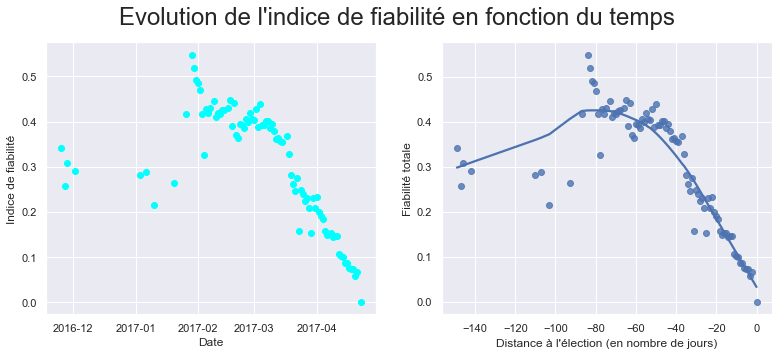

In [71]:
fig,ax = plt.subplots(1,2,figsize=(13,5))
ax[0].plot(df_final.index,"Fiabilité totale", "o", data=df_indice, color="cyan")
sns.regplot(x="durée", y="Fiabilité totale", data=df_indice, lowess=True, ax=ax[1])

#Titres et axes
fig.suptitle("Evolution de l'indice de fiabilité en fonction du temps",size=24)
ax[0].set_ylabel('Indice de fiabilité')
ax[0].set_xlabel('Date')
ax[1].set_xlabel("Distance à l'élection (en nombre de jours)")

####  <span style="color:darkblue"> Commentaire 
- <span style="color:darkblue"> Contrairement à 2007 et 2012, on n'observe pas de décroissance linéaire de la moyenne de l'indice de fiabilité dans le temps avant mars 2017. Dans la phase de décroissance linéaire la pente absolue (environ 0,008) est plus importante qu'en 2007 et 2012 (pentes absolues, respectivement, de 0,001 et 0,0007).
- <span style="color:darkblue"> Etrangement, on observe une meilleure fiabilité des sondages en décembre-janvier qu'en février. Cela est à considérer avec précaution car nous disposons de moins de sondages la période décembre-janvier.
- <span style="color:darkblue"> Globalement, on observe cependant que l'indice de fiabilité va en s'améliorant à partir de mars 2017 (seulement un mois avant l'élection).
    
##### Evolution de l'indice de fiabilité dans le temps suivant les candidats
    
Nous avions observé, dans la partie précédente, que le vote Macron semblait se stabiliser plus tôt que celui de Le Pen. L'évolution de l'indice de fiabilité dans le temps dépend-il du candidat observé comme en 200 et 2012 ? C'est ce que nous étudions dans ce qui suit.

In [72]:
#Création d'un nouveau dataframe, data_final, pour faciliter la manipulation des données.
candidat = ["Fillon","Macron","Hamon","Le Pen","Mélenchon","Dupont-Aignan"]
parti = [" Lr"," Em"," Ps"," Fn"," Fi"," Dlf"]
list_df = [0]*6

#Création d'une liste de 6 df contenant les données propres à chacun des 6 candidats
for i in range(6):
    data = df_indice[[candidat[i]+parti[i],"Fiabilité "+candidat[i],"date","durée"]]
    data["Candidat"]=candidat[i]
    data["Score"]=data[candidat[i]+parti[i]]
    data["Fiabilité"]=data["Fiabilité "+candidat[i]]
    data.drop("Fiabilité "+candidat[i], axis=1, inplace=True)
    data.drop(candidat[i]+parti[i], axis=1, inplace=True)
    list_df[i] = data
    
data_final = pd.concat(list_df, join = 'inner', ignore_index = True)
data_final

#Suppression des lignes donnant le résultat du vote
data_final = data_final[data_final["date"]!="Résultats"]
#data_final.head(20)

C:\Users\22sir\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\22sir\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\22sir\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Dans le graphique qui suit, nous affichons, pour chaque candidat, l'évolution en fonction du temps des indices de fiabilité des résultats prédits pour ce candidat.

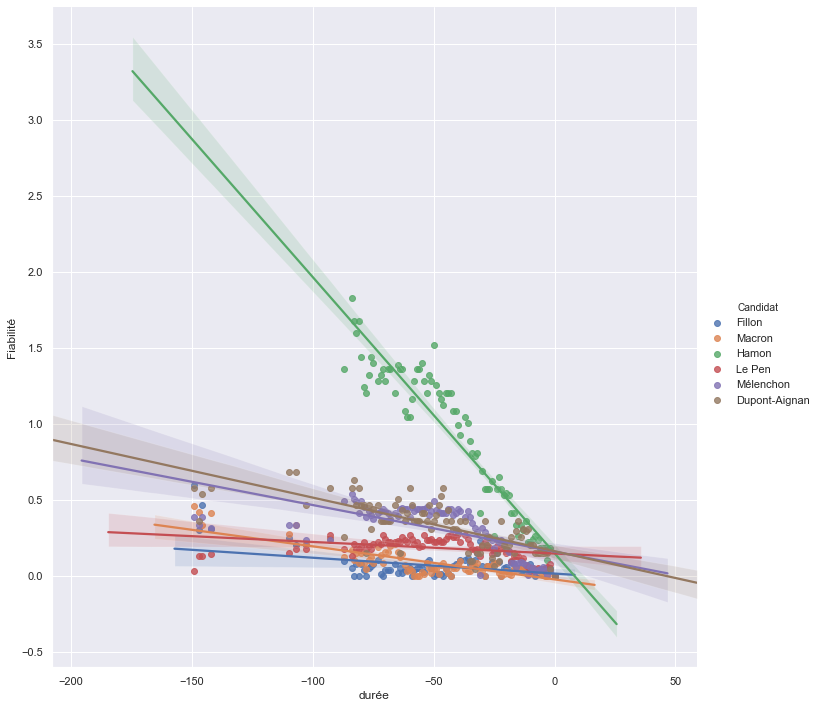

In [73]:
lm = sns.lmplot(x="durée", y="Fiabilité", hue="Candidat", data=data_final, height=10,robust=True)

####  <span style="color:darkblue"> Commentaire 
- <span style="color:darkblue"> Pour tous les candidats, l'indice de fiabilité décroît dans le temps (*ie* s'améliore à mesure que l'on s'approche de l'élection).
- <span style="color:darkblue"> On observe, ainsi que relevé précédemment, que les sondages prévoient plus rapidement dans le temps le score de Macron que celui de Le Pen.
- <span style="color:darkblue"> Globalement, les pentes correspondant aux différents candidats sont similaires. Un candidat, Hamon, se distingue : c'est celui avec la fiabilité la plus mauvaise à toutes les dates (indice de fiabilité les plus hauts en prenant aussi en compte 2007 et 2012) et également celui avec la plus forte variation de l'indice de fiabilité dans le temps (plus forte décroissance). En valeur, on ne distingue plus 2 comme en 2007 et 2012, mais 4 groupes de candidats (Macron/Fillon, Le Pen, Mélenchon/Dupont-Aignan, Hamon). Fillon et Macron ont des indices de fiabilité très bons (moins de 0,10) à toutes les dates.
    
L'indice de fiabilité dépend donc, comme en 2012 et 2007, du candidat. C'est ce que nous observons également ci-dessous en affichant les boîtes à moustache permettant de visualiser la distribution des indices de fiabilité des résultats des prédictions de vote pour chaque candidat. Par exemple, sur le graphique de droite, un point bleu pourrait correspondre, par exemple, à l'indice de fiabilité du résultat obtenu par Fillon pour le sondage du 2 février.

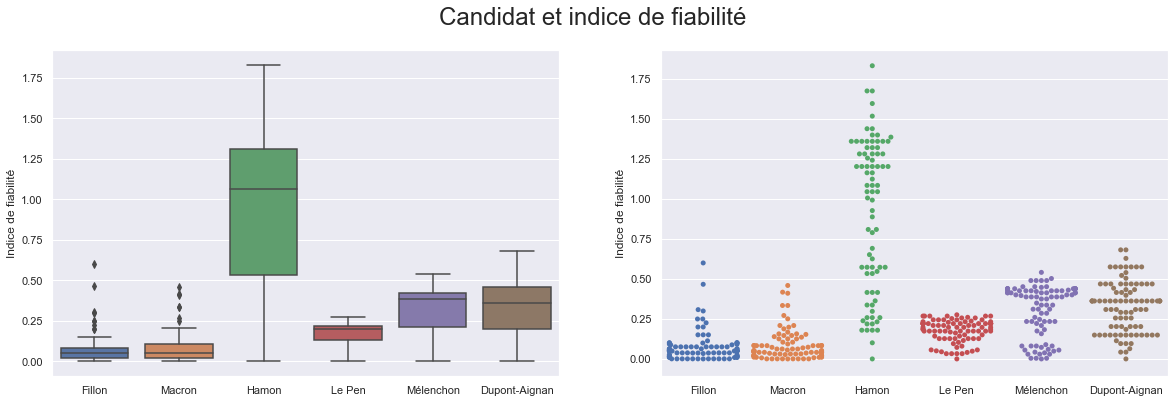

In [74]:
boite_moustache_fiabilite("Candidat",data_final)

####  <span style="color:darkblue"> Commentaire 
<span style="color:darkblue">  On observe, comme observé précédemment, que la distribution de l'indice de fiabilité dépend du candidat considéré.
- <span style="color:darkblue"> Hamon est le candidat avec l'indice de fiabilité avec la plus forte dispersion.
- <span style="color:darkblue">  Fillon et Macron sont les candidats les plus stables : leurs indices de fiabilité sont très proches de 0.
- <span style="color:darkblue"> On retrouve que, globlement, les électeurs de Macron sont plus stables que ceux de Le Pen.
   
### <span style="color:darkblue"> Commentaire sur l'indice de fiabilité
L'indice de fiabilité nous a permis de quantifier la fiabilité des sondages. Deux points sont à retenir:
- **Evolution de la fiabilité dans le temps :** on observe ici un résultat différent par rapport à ce qui s'est passé en 2007 et 2012. En effet, on observe une décroissance de l'indice de fiabilité seulement à partir de mars, alors que cette décroissance s'observe plus tôt en 2007 et 2012.
- **Indice de fiabilité et candidats** : de même qu'en 2007 et 2012, on observe une différence de distribution et d'évolution dans le temps de l'indice de fiabilité suivant les candidats. En valeur de l'indice de fiabilité, les candidats se divisent en 4 groupe.

#  III] Visualisation graphique 

## A) Visualisation des données brutes

###### Objectif 
À partir du dataframe obtenu dans le I], on trace les courbes montrant l'évolution de chaque candidat dans les sondages depuis novembre 2016 jusqu'aux résultats du 23 avril 2017. On cherche ainsi à observer graphiquement les dates auxquelles les sondages deviennent pertinents et identifier les possibles phénomènes explicatifs de ces évolutions.

### A.1) Visualisation statique  

C:\Users\22sir\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\22sir\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\22sir\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\Users\22sir\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and

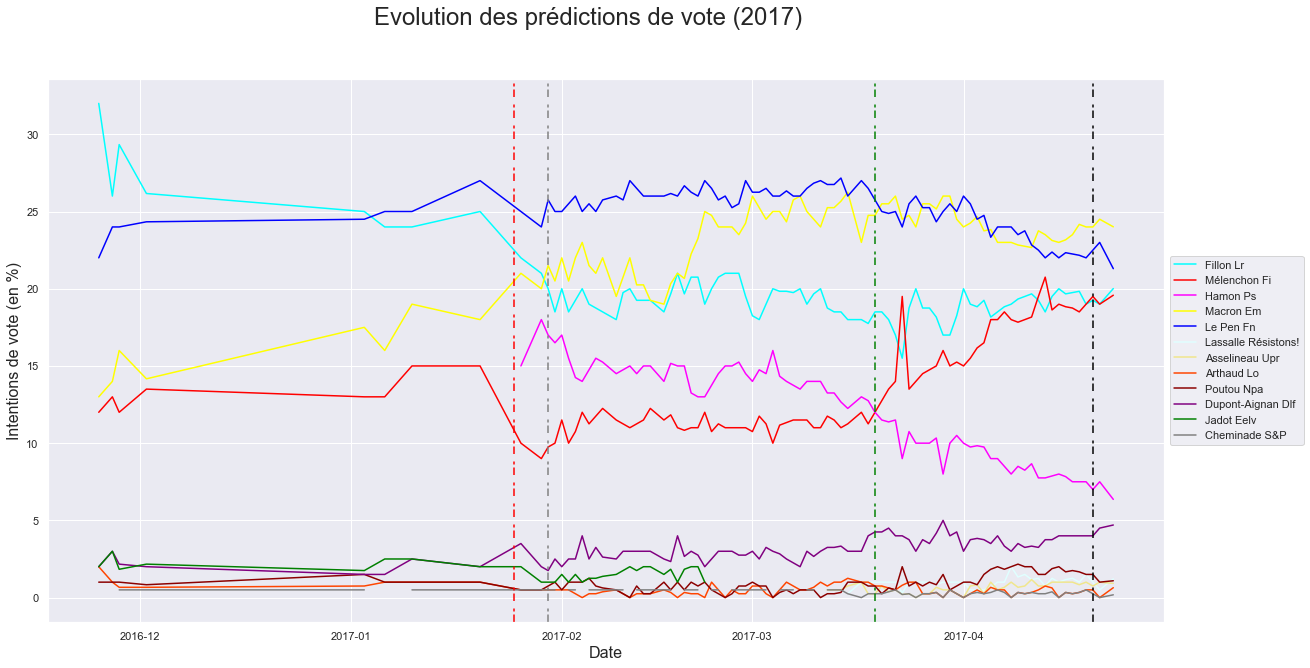

In [79]:
fig = plt.figure(figsize=(20,10))

plt.plot(df_final.index,"Fillon Lr", data=df_final, color="cyan")
plt.plot(df_final.index,"Mélenchon Fi", data=df_final, color="red")
plt.plot(df_final.index,"Hamon Ps", data=df_final, color="magenta")
plt.plot(df_final.index,"Macron Em", data=df_final, color="yellow")
plt.plot(df_final.index,"Le Pen Fn", data=df_final, color="blue")
plt.plot(df_final.index,"Lassalle Résistons!", data=df_final, color="lightcyan")
plt.plot(df_final.index,"Asselineau Upr", data=df_final, color="khaki")
plt.plot(df_final.index,"Arthaud Lo", data=df_final, color="orangered")
plt.plot(df_final.index,"Poutou Npa", data=df_final, color="darkred")
plt.plot(df_final.index,"Dupont-Aignan Dlf", data=df_final, color="purple")
plt.plot(df_final.index,"Jadot Eelv", data=df_final, color="green")
plt.plot(df_final.index,"Cheminade S&P", data=df_final, color="gray")

fig.suptitle('Evolution des prédictions de vote (2017)',size=24)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Date", size=16)
plt.ylabel("Intentions de vote (en %)", size=16)

x=datetime.strptime('20-4-2017', "%d-%m-%Y")
y=datetime.strptime('25-1-2017', "%d-%m-%Y")
z=datetime.strptime('30-1-2017', "%d-%m-%Y")
a=datetime.strptime('19-3-2017', "%d-%m-%Y")

l= plt.axvline(x, color="black")
m= plt.axvline(y, color="red")
n= plt.axvline(z, color="grey")
o= plt.axvline(a, color="green")

l.set_dashes([5,2,2,5])
m.set_dashes([5,2,2,5])
n.set_dashes([5,2,2,5])
o.set_dashes([5,2,2,5])

####  <span style="color:darkblue"> Commentaire 
 <span style="color:darkblue">  Sur le graphique : 
- <span style="color:darkblue"> La **droite verticale noire** correspond à la date du premier sondage qui donne le bon classement des cinq premiers candidats (date que nous avions déjà déterminée dans la partie précédente).
- <span style="color:darkblue"> La **droite verticale grise** correspond à la date du premier sondage qui donne le bon duo de candidats choisi pour le second tour.
- <span style="color:darkblue"> La **droite verticale rouge** correspond à la date de l'éclatement de l'affaire Fillon. On observe alors que le scandale des emplois fictifs n'est pas complètement responsable de la chute de Francois Fillon dans les sondages, puisque celle-ci avait déja commencé avant la sortie de l'article dans le Canard Enchainé. 
- <span style="color:darkblue"> La **droite verticale verte** correspond au moment où Mélenchon passe devant Hamon dans les sondages. Si avant cette date, le candidat Mélenchon était plutot stable aux environs de 13%, on observe qu'à partir de ce sondage, il connaît une hausse fulgurante (coïncidant avec une chute de Hamon). On peut en déduire que ce premier sondage plaçant Mélenchon avant Hamon a poussé les électeurs de gauche à se dire que Mélenchon était le meilleur candidat pour porter leurs convictions. On montre ainsi une certaine influence des sondages pour "faire" la politique puisque c'est le sondage du 19 mars qui pourrait avoir poussé les électeurs de gauche à adopter une certaine stratégie (ici voter Melenchon plutôt que Hamon).

### A.2) Visualisation interactive 

In [76]:
couleurs = ["orangered","darkred","red","magenta","yellow","lightcyan","cyan","purple","khaki","blue","gray","green"]
fig = px.line(df_final,y=df_final.columns, color_discrete_sequence = couleurs,
                 labels={
                     "index":"Date du sondage",
                     "value":"Pourcentage",
                     "variable":"Candidats"
                 },
             title="Sondages du premier tour de la présidentielle de 2017",
             )
fig.add_annotation(x=datetime.strptime('20-4-2017', "%d-%m-%Y"), y=28,
            text="L'ordre des candidats devient juste",
            showarrow=True,
            arrowhead=1)
fig.add_annotation(x=datetime.strptime('25-1-2017', "%d-%m-%Y"), y=20,
            text="Affaire Fillon",
            showarrow=True,
            arrowhead=1)
fig.add_annotation(x=datetime.strptime('30-1-2017', "%d-%m-%Y"), y=24,
            text="Les sondages donnent le bon duo gagant",
            showarrow=True,
            arrowhead=1)
fig.show()

NameError: name 'px' is not defined

## B) Lissage des courbes 

###### Objectif 
Cette dernière section est purement esthétique : on souhaite lisser les courbes précédentes pour obtenir une tendance globale plus fluide et plus lisible. Pour cela, on passe par un nouveau dataframe qui prend comme données la moyenne sur cinq sondages.  

In [80]:
#Lissage des courbes en lissant les données

dFillon=[]
dMélenchon=[]
dHamon=[]
dMacron=[]
dLePen=[]
dLassalle=[]
dAsselineau=[]
dArthaud=[]
dPoutou=[]
dDupont=[]
dJadot=[]
dCheminade=[]

for i in range(0,len(df_final.index)-4):
    dFillon.append((df_final['Fillon Lr'][i]+df_final['Fillon Lr'][i+1]+df_final['Fillon Lr'][i+2]+df_final['Fillon Lr'][i+3]+df_final['Fillon Lr'][i+4])/5)
    dMélenchon.append((df_final['Mélenchon Fi'][i]+df_final['Mélenchon Fi'][i+1]+df_final['Mélenchon Fi'][i+2]+df_final['Mélenchon Fi'][i+3]+df_final['Mélenchon Fi'][i+4])/5)
    dHamon.append((df_final['Hamon Ps'][i]+df_final['Hamon Ps'][i+1]+df_final['Hamon Ps'][i+2]+df_final['Hamon Ps'][i+3]+df_final['Hamon Ps'][i+4])/5)
    dMacron.append((df_final['Macron Em'][i]+df_final['Macron Em'][i+1]+df_final['Macron Em'][i+2]+df_final['Macron Em'][i+3]+df_final['Macron Em'][i+4])/5)
    dLePen.append((df_final['Le Pen Fn'][i]+df_final['Le Pen Fn'][i+1]+df_final['Le Pen Fn'][i+2]+df_final['Le Pen Fn'][i+3]+df_final['Le Pen Fn'][i+4])/5)
    dLassalle.append((df_final['Lassalle Résistons!'][i]+df_final['Lassalle Résistons!'][i+1]+df_final['Lassalle Résistons!'][i+2]+df_final['Lassalle Résistons!'][i+3]+df_final['Lassalle Résistons!'][i+4])/5)
    dAsselineau.append((df_final['Asselineau Upr'][i]+df_final['Asselineau Upr'][i+1]+df_final['Asselineau Upr'][i+2]+df_final['Asselineau Upr'][i+3]+df_final['Asselineau Upr'][i+4])/5)
    dArthaud.append((df_final['Arthaud Lo'][i]+df_final['Arthaud Lo'][i+1]+df_final['Arthaud Lo'][i+2]+df_final['Arthaud Lo'][i+3]+df_final['Arthaud Lo'][i+4])/5)
    dPoutou.append((df_final['Poutou Npa'][i]+df_final['Poutou Npa'][i+1]+df_final['Poutou Npa'][i+2]+df_final['Poutou Npa'][i+3]+df_final['Poutou Npa'][i+4])/5)
    dDupont.append((df_final['Dupont-Aignan Dlf'][i]+df_final['Dupont-Aignan Dlf'][i+1]+df_final['Dupont-Aignan Dlf'][i+2]+df_final['Dupont-Aignan Dlf'][i+3]+df_final['Dupont-Aignan Dlf'][i+4])/5)
    dJadot.append((df_final['Jadot Eelv'][i]+df_final['Jadot Eelv'][i+1]+df_final['Jadot Eelv'][i+2]+df_final['Jadot Eelv'][i+3]+df_final['Jadot Eelv'][i+4])/5)
    dCheminade.append((df_final['Cheminade S&P'][i]+df_final['Cheminade S&P'][i+1]+df_final['Cheminade S&P'][i+2]+df_final['Cheminade S&P'][i+3]+df_final['Cheminade S&P'][i+4])/5)   

In [81]:
df_ultime=pd.DataFrame(list(zip(dFillon,dMélenchon,dHamon,dMacron,dLePen,dLassalle,dAsselineau,dArthaud,dPoutou,dDupont,dJadot,dCheminade)),columns=['Fillon Lr','Mélenchon Fi','Hamon Ps','Macron Em','Le Pen Fn','Lassalle Résistons!','Asselineau Upr','Arthaud Lo','Poutou Npa','Dupont-Aignan Dlf','Jadot Eelv','Cheminade S&P'])
df_ultime.index = df_final.index[4:90]

C:\Users\22sir\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\22sir\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\22sir\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\Users\22sir\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and

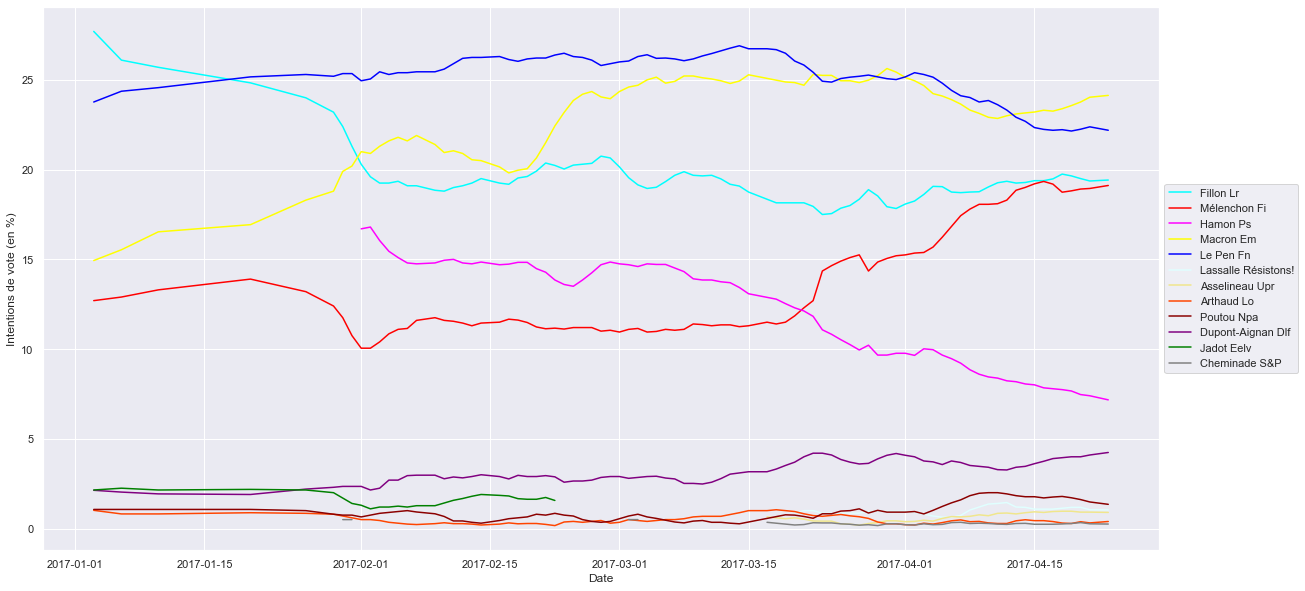

In [82]:
plt.figure(figsize=(20,10))

fig.suptitle('Evolution des prédictions de vote 2017, courbes lissées',size=24)
plt.xlabel("Date")
plt.ylabel("Intentions de vote (en %)")

plt.plot(df_ultime.index,"Fillon Lr", data=df_ultime, color="cyan")
plt.plot(df_ultime.index,"Mélenchon Fi", data=df_ultime, color="red")
plt.plot(df_ultime.index,"Hamon Ps", data=df_ultime, color="magenta")
plt.plot(df_ultime.index,"Macron Em", data=df_ultime, color="yellow")
plt.plot(df_ultime.index,"Le Pen Fn", data=df_ultime, color="blue")
plt.plot(df_ultime.index,"Lassalle Résistons!", data=df_ultime, color="lightcyan")
plt.plot(df_ultime.index,"Asselineau Upr", data=df_ultime, color="khaki")
plt.plot(df_ultime.index,"Arthaud Lo", data=df_ultime, color="orangered")
plt.plot(df_ultime.index,"Poutou Npa", data=df_ultime, color="darkred")
plt.plot(df_ultime.index,"Dupont-Aignan Dlf", data=df_ultime, color="purple")
plt.plot(df_ultime.index,"Jadot Eelv", data=df_ultime, color="green")
plt.plot(df_ultime.index,"Cheminade S&P", data=df_ultime, color="gray")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
couleurs = ["orangered","darkred","red","magenta","yellow","lightcyan","cyan","purple","khaki","blue","gray","green"]
fig1 = px.line(df_ultime,y=df_ultime.columns, color_discrete_sequence = couleurs,
                 labels={
                     "index":"Date du sondage",
                     "value":"Pourcentage",
                     "variable":"Candidats"
                 },
             title="Sondages du premier tour de la présidentielle de 2017",
             )
fig1.show()

## <span style="color:darkred"> Conclusion 2017 

**Les sondages "disent" la politique.**

- **Volatilité** : Contrairement aux précédentes années, 2017 témoigne d'une grande volatilité. Comme en 2007, la conversion entre les intentions de vote dans les sondages et les votes a été plutôt bonne. Les sondages tardent à donner le bon duo gagnant qui n'arrive qu'en fin janvier 2017, alors qu'en 2007 et 2012 les deux premiers sortaient du lot dès le début de nos échantillons (soit plus que 6 mois à l'avance). De même, seul le dernier sondage avant l'élection (20 avril 2017) parvient à estimer le bon ordre pour les principaux candidats alors que c'était le 3 février pour l'élection de 2007 et le 17 avril pour celle de 2012. 
- **Précision** : En 2017, les sondages peinent encore plus que les années précédentes à donner une estimation juste des résultats (en pourcentage de voix). L'indice de fiabilité des sondages ne suit une évolution similaire à celles observées lors des précédentes élections qu'à partir du mois de mars. La fiabilité des sondages est étrangement meilleure au début de l'année 2017 que début mars. Comme pour les autres élections, certains candidats ont des électorats plus stables que d'autres. On observe également pour la première fois que des indices de fiabilité très élevés pour un candidat (Hamon). On a donc une forte dégradation de la précision des sondages et une plus grande imprévisibilité liées à un contexte politique "éclaté".
- **Schéma inédit** : Contrairement aux élections de 2007 et 2012, le contexte politique de 2017 est complétement "éclaté" : le clivage droite/gauche n'est plus présent comme auparavant et des candidats inhabituels émergent dans le haut du classement (Le Pen qui connaît une grande pousée et Macron qui propose une alternative aux partis traditionnels).

**Les sondages "font" la politique** 

Cette année encore on constate le poids des sondages dans le comportement des électeurs. En effet, on remarque que (comme Bayrou en 2012), lorsque Mélenchon passe devant Hamon dans les sondages, ce dernier devient le candidat capable de représenter les idées de la gauche pour les électeurs qui décident alors de délaisser Hamon au profit de Mélenchon dans leurs intentions de vote (et vote réel) expliquant la poussée de Mélenchon à la mi-mars.  

# <span style="color:purple"> Transition 
<span style="color:purple"> Nous avons donc constaté un accroissement de l'imprévisibilité depuis 2007, et de fait, une incapacité croissante des sondeurs à prévoir l'issue d'une élection depuis cette date. En effet, à la différence de ce qui se passe en 2007 et 2012, lors de l'élection de 2017, les sondages ont peiné à proposer des estimations justes et à identifier les candidats vainqueurs et leur classement respectif. Pour essayer d'y voir plus clair, nous alons désormais nous concentrer sur l'élection de 2017 (la plus volatile) et tenter de changer l'échelle en utilisant des données régionales pour mieux juger de la qualité des sondages.  

# <span style="color:darkred">Les élections présidentielles à l'échelle des régions / Le cas de 2017

###### Objectif : 
Dans les trois parties précédentes qui étudient les élections de 2007, 2012 et, surtout, 2017, nous avons vu la difficulté qu'ont les sondeurs à faire ressortir des résultats efficaces et précis permettant de prévoir les récultats de l'élection. Ce qui n'était déjà pas une surprise a pris sens sur le papier et nous avons notamment observé que le phénomène va en se dégradant : il devient de plus en plus dur, à chaque élection, de prédire le vainqueur. Pour cette IIe partie, nous avons cherché à réduire l'échelle en nous plaçant à l'**échelle régionale** (données issues de sondages par région) pour juger de la précision des sondages et déterminer leur pertinence à différents moments de la campagne. 

# I] Extraction des données générales 

### Données élections

In [ ]:
#Scrapping sur Wikipédia
url_Sondages_2017 = "https://fr.wikipedia.org/wiki/Liste_de_sondages_sur_l%27%C3%A9lection_pr%C3%A9sidentielle_fran%C3%A7aise_de_2017"
request_text = request.urlopen(url_Sondages_2017).read()
page = bs4.BeautifulSoup(request_text, "lxml")

### Données carte régions de France

In [ ]:
#On importe la carte de la France avec les régions
url = "https://www.data.gouv.fr/fr/datasets/r/aacf9338-8944-4513-a7b9-4cd7c2db2fa9"
geo = geopandas.read_file(url)
geo = geo.drop(0)
geo = geo.drop(1)
geo = geo.drop(2)
geo = geo.drop(7)
geo = geo.drop(11)
geo = geo.drop(13)

### Récupération des données

In [ ]:
#On extrait les données du tableau
tableau_sondages = page.find_all('table',{'class':'wikitable'})
tableau_région = tableau_sondages[38]
tableau_body = tableau_région.find('tbody')
rows = tableau_body.find_all('tr')

#On récupère les en-têtes 
columns_entete = ["Nathalie Arthaud", "Philippe Poutou","Jean-Luc Mélenchon", "Benoît Hamon", "Emmanuel Macron", "Jean Lassalle", "François Fillon", "Nicolas Dupont-Aignan", "François Asselineau", "Marine Le Pen", "Jacques Cheminade"]

Resultats = rows[29:41]
Sondage_proche_election= rows[41:53] #avril
Sondage_début_campagne= rows[65:77] #février

# II] Identification du vainqueur dans chaque région et cartographie

Dans cette partie, nous nous intéressons à la prédiction du vainqueur du premier tour dans chaque région et nous l'affichons sous forme de carte pour le résultat final et pour 2 sondages (avril et février).

##  A)  Résultats officiels 23 avril 2017 

In [ ]:
#On crée un dictionnaire pour les résultats officiels 
dico_région_résultats = dict()
for row in Resultats[0:1] :
    cols = row.find_all('td')
    cols = cols[3:]
    cols = [ele.text.strip() for ele in cols]
    if len(cols) > 1 : 
        dico_région_résultats[cols[0]] = cols[1:]
for row in Resultats[1:] :
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    if len(cols) > 1 : 
        dico_région_résultats[cols[0]] = cols[1:]
#dico_région_résultats

#On crée le dataframe pour les resultats 
data_résultats = pd.DataFrame.from_dict(dico_région_résultats,orient='index')
data_résultats.columns = columns_entete

In [ ]:
# On retire les %,<,- qui polluent nos données 
for i in range(0,12):
    for j in range(0,len(data_résultats.columns)): 
        data_résultats.iloc[i,j]=data_résultats.iloc[i,j].replace("\xa0%","") 
        data_résultats.iloc[i,j]=data_résultats.iloc[i,j].replace("–","nan")
        data_résultats.iloc[i,j]=data_résultats.iloc[i,j].replace(",",".")

In [ ]:
# On s'assure une première fois qu'il ne s'agit pas de valeurs string 
for column in data_résultats.iloc[:,0:11]:
    data_résultats[column]=pd.to_numeric(data_résultats[column], downcast="float")

In [ ]:
#On détermine le vainqueur dans chaque région
data_résultats['Vainqueur']=data_résultats[['Nathalie Arthaud','Philippe Poutou','Jean-Luc Mélenchon','Benoît Hamon','Emmanuel Macron','Jean Lassalle','François Fillon','Nicolas Dupont-Aignan','François Asselineau','Marine Le Pen','Jacques Cheminade']].idxmax(axis=1)

In [ ]:
#On réunit les données collectées avec les données géographiques de France
merged_data_résultats = data_résultats.reset_index(drop=False).merge(geo, left_on=data_résultats.index, right_on="nom")

##  B) Sondage proche de l'élection / 16 avril 2017

Les données du sondage d'avril sont rassemblées dans le dataframe __data_sondage_proche_election__.

In [ ]:
#On crée un dictionnaire pour un sondage proche des elections 
dico_région_proche_election = dict()
for row in Sondage_proche_election[0:1] :
    cols = row.find_all('td')
    cols = cols[3:]
    cols = [ele.text.strip() for ele in cols]
    if len(cols) > 1 : 
        dico_région_proche_election[cols[0]] = cols[1:]
for row in Sondage_proche_election[1:] :
    cols = row.find_all('td')
    cols = cols[1:]
    cols = [ele.text.strip() for ele in cols]
    if len(cols) > 1 : 
        dico_région_proche_election[cols[0]] = cols[1:]

#On s'assure que toutes les régions soient nommées de la manière dont elles sont nommées sur les données géographiques
dico_région_proche_election['Centre-Val de Loire']=dico_région_proche_election.pop('Centre-Val-de-Loire')

   
#On crée le dataframe pour ce sondage 
data_sondage_proche_election = pd.DataFrame.from_dict(dico_région_proche_election,orient='index')
data_sondage_proche_election.columns = columns_entete

In [ ]:
# On retire les %,<,- qui polluent nos données 
for i in range(0,12):
    for j in range(0,len(data_sondage_proche_election.columns)): 
        data_sondage_proche_election.iloc[i,j]=data_sondage_proche_election.iloc[i,j].replace("\xa0%","") 
        data_sondage_proche_election.iloc[i,j]=data_sondage_proche_election.iloc[i,j].replace("–","nan")
        data_sondage_proche_election.iloc[i,j]=data_sondage_proche_election.iloc[i,j].replace(",",".")

In [ ]:
# On s'assure une première fois qu'il ne s'agit pas de valeurs string 
for column in data_sondage_proche_election.iloc[:,0:11]:
    data_sondage_proche_election[column]=pd.to_numeric(data_sondage_proche_election[column], downcast="float")

In [ ]:
#On détermine le vainqueur dans chaque région
data_sondage_proche_election['Vainqueur']=data_sondage_proche_election[['Nathalie Arthaud','Philippe Poutou','Jean-Luc Mélenchon','Benoît Hamon','Emmanuel Macron','Jean Lassalle','François Fillon','Nicolas Dupont-Aignan','François Asselineau','Marine Le Pen','Jacques Cheminade']].idxmax(axis=1)

In [ ]:
#On réunit les données collectées avec les données géographiques de France
merged_data_sondage_proche_election = data_sondage_proche_election.reset_index(drop=False).merge(geo, left_on=data_sondage_proche_election.index, right_on="nom")

##  C) Sondage début campagne / 7 février 2017

Les données du sondage d'avril sont rassemblées dans le dataframe data_sondage_début_campagne.

In [ ]:
#On crée un dictionnaire pour un sondage début campagne 
dico_région_début_campagne = dict()
for row in Sondage_début_campagne[0:1] :
    cols = row.find_all('td')
    cols = cols[3:]
    cols = [ele.text.strip() for ele in cols]
    if len(cols) > 1 : 
        dico_région_début_campagne[cols[0]] = cols[1:]
for row in Sondage_début_campagne[1:] :
    cols = row.find_all('td')
    cols = cols[1:]
    cols = [ele.text.strip() for ele in cols]
    if len(cols) > 1 : 
        dico_région_début_campagne[cols[0]] = cols[1:]      

#On s'assure que toutes les régions soient nommées de la manière dont elles sont nommées sur les données géographiques
dico_région_début_campagne['Centre-Val de Loire']=dico_région_début_campagne.pop('Centre-Val-de-Loire')

#On crée le dataframe pour ce sondage
data_sondage_début_campagne = pd.DataFrame.from_dict(dico_région_début_campagne,orient='index')
data_sondage_début_campagne.columns = columns_entete

In [ ]:
# On retire les %,<,- qui polluent nos données 
for i in range(0,12):
    for j in range(0,len(data_sondage_début_campagne.columns)): 
        data_sondage_début_campagne.iloc[i,j]=str(data_sondage_début_campagne.iloc[i,j])
for i in range(0,12):
    for j in range(0,len(data_sondage_début_campagne.columns)): 
        data_sondage_début_campagne.iloc[i,j]=data_sondage_début_campagne.iloc[i,j].replace("\xa0%","") 
        data_sondage_début_campagne.iloc[i,j]=data_sondage_début_campagne.iloc[i,j].replace("–","nan")
        data_sondage_début_campagne.iloc[i,j]=data_sondage_début_campagne.iloc[i,j].replace(",",".")
        
# On s'assure une première fois qu'il ne s'agit pas de valeurs string 
for i in range(0,12):
    for j in range(3,len(data_sondage_début_campagne.columns)): 
        data_sondage_début_campagne.iloc[i,j]=float(data_sondage_début_campagne.iloc[i,j])
for column in data_sondage_début_campagne.iloc[:,0:11]:
    data_sondage_début_campagne[column]=pd.to_numeric(data_sondage_début_campagne[column], downcast="float")

In [ ]:
#On détermine le vainqueur dans chaque région
data_sondage_début_campagne['Vainqueur']=data_sondage_début_campagne[['Nathalie Arthaud','Philippe Poutou','Jean-Luc Mélenchon','Benoît Hamon','Emmanuel Macron','Jean Lassalle','François Fillon','Nicolas Dupont-Aignan','François Asselineau','Marine Le Pen','Jacques Cheminade']].idxmax(axis=1)

In [ ]:
#On réunit les données collectées avec les données géographiques de France
merged_data_sondage_début_campagne = data_sondage_début_campagne.reset_index(drop=False).merge(geo, left_on=data_sondage_début_campagne.index, right_on="nom")

##  D) Comparaison et conclusion 

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(30,30))

geomerged1 = geopandas.GeoDataFrame(merged_data_résultats)
ax[0].set_axis_off()
geomerged1.plot(ax = ax1, column = "Vainqueur", edgecolor='white', legend=True)
ax[0].set_title("RESULTAT 23 AVRIL 2017 / Vainqueur Par Région")

geomerged2 = geopandas.GeoDataFrame(merged_data_sondage_proche_election)
fig,ax2 = plt.subplots(figsize=(5, 5))
ax[1].set_axis_off()
geomerged2.plot(ax = ax2, column = "Vainqueur", edgecolor='white', legend=True)
ax[1].set_title("SONDAGE 16 AVRIL 2017 / Vainqueur Par Région")

geomerged3 = geopandas.GeoDataFrame(merged_data_sondage_début_campagne)
fig,ax3 = plt.subplots(figsize=(5, 5))
ax[2].set_axis_off()
geomerged3.plot(ax = ax3, column = "Vainqueur", edgecolor='white', legend=True)
ax[2].set_title("SONDAGE 7 FEVRIER 2017 / Vainqueur Par Région")

### Conclusion 
-   On observe que, même à une échelle plus réduite (échelle régionale), les sondages semblent peu significatifs : le sondage réalisé plusieurs mois avant l'élection (7 février) semble même plus précis pour prédire les bons vainqueurs que celui réalisé la semaine avant l'élection (8 régions justes en avril et 11 justes en février). 
-   On remarque cependant l'existence de régions stables où les estimations des sondages et les résultats sont constants : c'est par exemple le cas de la région PACA, de l'Occitanie, le Grand Est, les Hauts-de-France, la Bourgogne-Franche-Comté, la Bretagne, et les pays de la Loire pour lesquelles le gagnant réel est celui qui avait été prévu par tous les sondages. 
-  A l'inverse, certaines régions notamment la Nouvelle Aquitaine, l'Ile-de-France et la Normandie semblent bien plus volatiles.

#####   Ces résultats ne sont obtenus que sur deux sondages. Les conclusions qui précèdent sont dont à interpréter avec précaution. On sait toutefois que ce qui importe vraiment n'est pas tant le gagnant mais le duo de tête (ceux qui participeront au second tour). C'est pourquoi nous allons désormais porter notre réflexion à l'échelle régionale sur cette donnée.

# III] Réflexion sur le duo gagnant par région

Nous nous intéressons maintenant à la capacité des sondages de l'échelle régionale à prédire, dans chaque région, le duo de tête des élections.

##  A) Récupération du second vainqueur 

### A.1) Récupération du second vainqueur dans les résultats officiels 

In [ ]:
#En plus du vainqueur par région, on extrait son score dans chacune des régions
data_résultats['Score Vainqueur']=data_résultats[['Nathalie Arthaud','Philippe Poutou','Jean-Luc Mélenchon','Benoît Hamon','Emmanuel Macron','Jean Lassalle','François Fillon','Nicolas Dupont-Aignan','François Asselineau','Marine Le Pen','Jacques Cheminade']].max(axis=1)

In [ ]:
#On extrait aussi le second du 1er tour et son score dans un dataframe 
df1 = data_résultats.reset_index()

for i in df1.index:
        if df1["Vainqueur"][i]=="Emmanuel Macron" : 
            df1['Emmanuel Macron'][i]= "0"
        elif df1["Vainqueur"][i]=="Marine Le Pen" : 
            df1['Marine Le Pen'][i]= "0" 
            
for column in df1.iloc[:,1:12]:
    df1[column]=pd.to_numeric(df1[column], downcast="float")

df1['Second']=df1[['Nathalie Arthaud','Philippe Poutou','Jean-Luc Mélenchon','Benoît Hamon','Emmanuel Macron','Jean Lassalle','François Fillon','Nicolas Dupont-Aignan','François Asselineau','Marine Le Pen','Jacques Cheminade']].idxmax(axis=1)
df1['Score Second']=df1[['Nathalie Arthaud','Philippe Poutou','Jean-Luc Mélenchon','Benoît Hamon','Emmanuel Macron','Jean Lassalle','François Fillon','Nicolas Dupont-Aignan','François Asselineau','Marine Le Pen','Jacques Cheminade']].max(axis=1)

for i in df1.index:
    df1["Autres Candidat"]=100-(df1['Score Vainqueur']+df1['Score Second'])

df1[["Vainqueur","Second",]]

### A.2) Récupération du second vainqueur dans le sondage proche des élections (16 avril)

In [ ]:
#En plus du vainqueur par région, on extrait le score de celui-ci dans chacune d'elle 
data_sondage_proche_election['Score Vainqueur']=data_sondage_proche_election[['Nathalie Arthaud','Philippe Poutou','Jean-Luc Mélenchon','Benoît Hamon','Emmanuel Macron','Jean Lassalle','François Fillon','Nicolas Dupont-Aignan','François Asselineau','Marine Le Pen','Jacques Cheminade']].max(axis=1)

In [ ]:
#On extrait aussi le second et son score dans un dataframe 
df2 = data_sondage_proche_election.reset_index()

for i in df2.index:
        if df2["Vainqueur"][i]=="Emmanuel Macron" : 
            df2['Emmanuel Macron'][i]= "0"
        elif df2["Vainqueur"][i]=="Marine Le Pen" : 
            df2['Marine Le Pen'][i]= "0" 
        elif df2["Vainqueur"][i]=="Jean-Luc Mélenchon" :
            df2['Jean-Luc Mélenchon'][i]= "0"
        elif df2["Vainqueur"][i]=="François Fillon" :
            df2['François Fillon'][i]= "0"    
            
for column in df2.iloc[:,1:12]:
    df2[column]=pd.to_numeric(df2[column], downcast="float")

df2['Second']=df2[['Nathalie Arthaud','Philippe Poutou','Jean-Luc Mélenchon','Benoît Hamon','Emmanuel Macron','Jean Lassalle','François Fillon','Nicolas Dupont-Aignan','François Asselineau','Marine Le Pen','Jacques Cheminade']].idxmax(axis=1)
df2['Score Second']=df2[['Nathalie Arthaud','Philippe Poutou','Jean-Luc Mélenchon','Benoît Hamon','Emmanuel Macron','Jean Lassalle','François Fillon','Nicolas Dupont-Aignan','François Asselineau','Marine Le Pen','Jacques Cheminade']].max(axis=1)

for i in df2.index:
    df2["Autres Candidat"]=100-(df2['Score Vainqueur']+df2['Score Second'])

df2[["Vainqueur","Second",]]

### A.3) Récupération du second vainqueur dans le sondage proche des élections (7 février)

In [ ]:
#En plus du vainqueur par région, on extrait le score de celui-ci dans chacune d'elle 
data_sondage_début_campagne['Score Vainqueur']=data_sondage_début_campagne[['Nathalie Arthaud','Philippe Poutou','Jean-Luc Mélenchon','Benoît Hamon','Emmanuel Macron','Jean Lassalle','François Fillon','Nicolas Dupont-Aignan','François Asselineau','Marine Le Pen','Jacques Cheminade']].max(axis=1)

In [ ]:
#On extrait aussi le second et son score dans un dataframe 
df3 = data_sondage_début_campagne.reset_index()

for i in df3.index:
        if df3["Vainqueur"][i]=="Emmanuel Macron" : 
            df3['Emmanuel Macron'][i]= "0"
        elif df3["Vainqueur"][i]=="Marine Le Pen" : 
            df3['Marine Le Pen'][i]= "0" 
        elif df3["Vainqueur"][i]=="Jean-Luc Mélenchon" :
            df3['Jean-Luc Mélenchon'][i]= "0"
        elif df3["Vainqueur"][i]=="François Fillon" :
            df3['François Fillon'][i]= "0"    
            
for column in df3.iloc[:,1:12]:
    df3[column]=pd.to_numeric(df3[column], downcast="float")

#del df1['Vainqueur']
#del df1['Score Vainqueur']

df3['Second']=df3[['Nathalie Arthaud','Philippe Poutou','Jean-Luc Mélenchon','Benoît Hamon','Emmanuel Macron','Jean Lassalle','François Fillon','Nicolas Dupont-Aignan','François Asselineau','Marine Le Pen','Jacques Cheminade']].idxmax(axis=1)
df3['Score Second']=df3[['Nathalie Arthaud','Philippe Poutou','Jean-Luc Mélenchon','Benoît Hamon','Emmanuel Macron','Jean Lassalle','François Fillon','Nicolas Dupont-Aignan','François Asselineau','Marine Le Pen','Jacques Cheminade']].max(axis=1)

for i in df3.index:
    df3["Autres Candidat"]=100-(df3['Score Vainqueur']+df3['Score Second'])

df3[["Vainqueur","Second",]]

#####  

## B) Comparaison par région

####  Objectif  :
On cherche ici à déterminer les deux candidats sélectionnés au second tour dans chaque région et ceux qui étaient prédis arriver aux second tour par deux sondages l'un plusieurs mois avant l'élection (le 7 février 2017) et l'autre quelques jours avant seulement (16 avril 2017). On pourra ainsi comparer les estimations des sondages à la réalité de l'élection à l'échelle régionale afin de juger l'efficacité des sondages à prédire ce qui compte le plus : le duo de vainqueurs du premier tour. Seront-ils plus efficients à l'échelle régionale que dans la prédiction des résultats chiffrés comme précédemment à l'échelle nationale ou seront-ils toujours flous preuve de l'incapacité des sondeurs à proposer des estimations efficaces ?

Pour chaque région, nous montrons ici le score des deux candidats qui arrivent en tête dans les sondages et à l'élection.

#### Auvergne-Rhône-Alpes

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(30,30))

# Diagramme Résultats (23 Avril)
labels = [df1["Vainqueur"][0],df1["Second"][0],"Autres"]
sizes = [df1["Score Vainqueur"][0],df1["Score Second"][0],df1["Autres Candidat"][0] ]
colors =['gold','darkblue', "ivory"]
ax[0].pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
ax[0].set_title("RESULTAT 23 AVRIL / Duo Gagnant")

# Diagramme Sondage 16 Avril  
labels = [df2["Vainqueur"][0],df2["Second"][0],"Autres"]
sizes = [df2["Score Vainqueur"][0],df2["Score Second"][0],df2["Autres Candidat"][0] ]
colors =['gold','darkblue', "ivory"]
ax[1].pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
ax[1].set_title("SONDAGE 16 AVRIL / Duo Gagnant")

# Diagramme Sondage 7 Février  
labels = [df3["Vainqueur"][0],df3["Second"][0],"Autres"]
sizes = [df3["Score Vainqueur"][0],df3["Score Second"][0],df3["Autres Candidat"][0] ]
colors =['darkblue','gold', "ivory"]
ax[2].pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
ax[2].set_title("SONDAGE 7 Février / Duo Gagnant")

#### Bourgogne-Franche-Comté

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(30,30))

# Diagramme Résultats (23 Avril)
labels = [df1["Vainqueur"][1],df1["Second"][1],"Autres"]
sizes = [df1["Score Vainqueur"][1],df1["Score Second"][1],df1["Autres Candidat"][1] ]
colors =['darkblue','gold', "ivory"]
ax[0].pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
ax[0].set_title("RESULTAT 23 AVRIL / Duo Gagnant")

# Diagramme Sondage 16 Avril  
labels = [df2["Vainqueur"][1],df2["Second"][1],"Autres"]
sizes = [df2["Score Vainqueur"][1],df2["Score Second"][1],df2["Autres Candidat"][1] ]
colors =['darkblue','gold', "ivory"]
ax[1].pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
ax[1].set_title("SONDAGE 16 AVRIL / Duo Gagnant")

# Diagramme Sondage 7 Février  
labels = [df3["Vainqueur"][1],df3["Second"][1],"Autres"]
sizes = [df3["Score Vainqueur"][1],df3["Score Second"][1],df3["Autres Candidat"][1] ]
colors =['darkblue','gold', "ivory"]
ax[2].pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
ax[2].set_title("SONDAGE 7 Février / Duo Gagnant")

#### Bretagne

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(30,30))

# Diagramme Résultats (23 Avril)
labels = [df1["Vainqueur"][2],df1["Second"][2],"Autres"]
sizes = [df1["Score Vainqueur"][2],df1["Score Second"][2],df1["Autres Candidat"][2] ]
colors =['gold','darkred', "ivory"]
ax[0].pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
ax[0].set_title("RESULTAT 23 AVRIL / Duo Gagnant")

# Diagramme Sondage 16 Avril  
labels = [df2["Vainqueur"][2],df2["Second"][2],"Autres"]
sizes = [df2["Score Vainqueur"][2],df2["Score Second"][2],df2["Autres Candidat"][2] ]
colors =['gold','cyan', "ivory"]
ax[1].pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
ax[1].set_title("SONDAGE 16 AVRIL / Duo Gagnant")

# Diagramme Sondage 7 Février  
labels = [df3["Vainqueur"][2],df3["Second"][2],"Autres"]
sizes = [df3["Score Vainqueur"][2],df3["Score Second"][2],df3["Autres Candidat"][2] ]
colors =['gold','deeppink', "ivory"]
ax[2].pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
ax[2].set_title("SONDAGE 7 Février / Duo Gagnant")

#### Grand Est

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(30,30))

# Diagramme Résultats (23 Avril)
labels = [df1["Vainqueur"][3],df1["Second"][3],"Autres"]
sizes = [df1["Score Vainqueur"][3],df1["Score Second"][3],df1["Autres Candidat"][3] ]
colors =['darkblue','gold', "ivory"]
ax[0].pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
ax[0].set_title("RESULTAT 23 AVRIL / Duo Gagnant")

# Diagramme Sondage 16 Avril  
labels = [df2["Vainqueur"][3],df2["Second"][3],"Autres"]
sizes = [df2["Score Vainqueur"][3],df2["Score Second"][3],df2["Autres Candidat"][3] ]
colors =['darkblue','gold', "ivory"]
ax[1].pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
ax[1].set_title("SONDAGE 16 AVRIL / Duo Gagnant")

# Diagramme Sondage 7 Février  
labels = [df3["Vainqueur"][3],df3["Second"][3],"Autres"]
sizes = [df3["Score Vainqueur"][3],df3["Score Second"][3],df3["Autres Candidat"][3] ]
colors =['darkblue','gold', "ivory"]
ax[2].pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
ax[2].set_title("SONDAGE 7 Février / Duo Gagnant")

#### Hauts-de-France

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(30,30))

# Diagramme Résultats (23 Avril)
labels = [df1["Vainqueur"][4],df1["Second"][4],"Autres"]
sizes = [df1["Score Vainqueur"][4],df1["Score Second"][4],df1["Autres Candidat"][4] ]
colors =['darkblue','gold', "ivory"]
ax[0].pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
ax[0].set_title("RESULTAT 23 AVRIL / Duo Gagnant")

# Diagramme Sondage 16 Avril  
labels = [df2["Vainqueur"][4],df2["Second"][4],"Autres"]
sizes = [df2["Score Vainqueur"][4],df2["Score Second"][4],df2["Autres Candidat"][4] ]
colors =['darkblue','gold', "ivory"]
ax[1].pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
ax[1].set_title("SONDAGE 16 AVRIL / Duo Gagnant")

# Diagramme Sondage 7 Février  
labels = [df3["Vainqueur"][4],df3["Second"][4],"Autres"]
sizes = [df3["Score Vainqueur"][4],df3["Score Second"][4],df3["Autres Candidat"][4] ]
colors =['darkblue','gold', "ivory"]
ax[2].pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
ax[2].set_title("SONDAGE 7 Février / Duo Gagnant")

#### Ile-de-France

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(30,30))

# Diagramme Résultats (23 Avril)
labels = [df1["Vainqueur"][5],df1["Second"][5],"Autres"]
sizes = [df1["Score Vainqueur"][5],df1["Score Second"][5],df1["Autres Candidat"][5] ]
colors =['darkblue','darkred', "ivory"]
ax[0].pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
ax[0].set_title("RESULTAT 23 AVRIL / Duo Gagnant")

# Diagramme Sondage 16 Avril  
labels = [df2["Vainqueur"][5],df2["Second"][5],"Autres"]
sizes = [df2["Score Vainqueur"][5],df2["Score Second"][5],df2["Autres Candidat"][5] ]
colors =['cyan','gold', "ivory"]
ax[1].pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
ax[1].set_title("SONDAGE 16 AVRIL / Duo Gagnant")

# Diagramme Sondage 7 Février  
labels = [df3["Vainqueur"][5],df3["Second"][5],"Autres"]
sizes = [df3["Score Vainqueur"][5],df3["Score Second"][5],df3["Autres Candidat"][5] ]
colors =['gold','cyan', "ivory"]
ax[2].pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
ax[2].set_title("SONDAGE 7 Février / Duo Gagnant")

#### Normandie

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(30,30))

# Diagramme Résultats (23 Avril)
labels = [df1["Vainqueur"][6],df1["Second"][6],"Autres"]
sizes = [df1["Score Vainqueur"][6],df1["Score Second"][6],df1["Autres Candidat"][6] ]
colors =['gold','cyan', "ivory"]
ax[0].pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
ax[0].set_title("RESULTAT 23 AVRIL / Duo Gagnant")

# Diagramme Sondage 16 Avril  
labels = [df2["Vainqueur"][6],df2["Second"][6],"Autres"]
sizes = [df2["Score Vainqueur"][6],df2["Score Second"][6],df2["Autres Candidat"][6] ]
colors =['gold','darkblue', "ivory"]
ax[1].pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
ax[1].set_title("SONDAGE 16 AVRIL / Duo Gagnant")

# Diagramme Sondage 7 Février  
labels = [df3["Vainqueur"][6],df3["Second"][6],"Autres"]
sizes = [df3["Score Vainqueur"][6],df3["Score Second"][6],df3["Autres Candidat"][6] ]
colors =['darkblue','gold', "ivory"]
ax[2].pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
ax[2].set_title("SONDAGE 7 Février / Duo Gagnant")

#### Nouvelle-Aquitaine

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(30,30))

# Diagramme Résultats (23 Avril)
labels = [df1["Vainqueur"][7],df1["Second"][7],"Autres"]
sizes = [df1["Score Vainqueur"][7],df1["Score Second"][7],df1["Autres Candidat"][7] ]
colors =['darkblue','gold', "ivory"]
ax[0].pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
ax[0].set_title("RESULTAT 23 AVRIL / Duo Gagnant")

# Diagramme Sondage 16 Avril  
labels = [df2["Vainqueur"][7],df2["Second"][7],"Autres"]
sizes = [df2["Score Vainqueur"][7],df2["Score Second"][7],df2["Autres Candidat"][7] ]
colors =['darkred','gold', "ivory"]
ax[1].pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
ax[1].set_title("SONDAGE 16 AVRIL / Duo Gagnant")

# Diagramme Sondage 7 Février  
labels = [df3["Vainqueur"][7],df3["Second"][7],"Autres"]
sizes = [df3["Score Vainqueur"][7],df3["Score Second"][7],df3["Autres Candidat"][7] ]
colors =['gold','darkblue', "ivory"]
plt.pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
ax3.set_title("SONDAGE 7 Février / Duo Gagnant")

#### Occitanie

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(30,30))

# Diagramme Résultats (23 Avril)
labels = [df1["Vainqueur"][8],df1["Second"][8],"Autres"]
sizes = [df1["Score Vainqueur"][8],df1["Score Second"][8],df1["Autres Candidat"][8] ]
colors =['gold','darkred', "ivory"]
ax[0].pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
ax[0].set_title("RESULTAT 23 AVRIL / Duo Gagnant")

# Diagramme Sondage 16 Avril  
labels = [df2["Vainqueur"][8],df2["Second"][8],"Autres"]
sizes = [df2["Score Vainqueur"][8],df2["Score Second"][8],df2["Autres Candidat"][8] ]
colors =['darkblue','gold', "ivory"]
ax[1].pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
ax[1].set_title("SONDAGE 16 AVRIL / Duo Gagnant")

# Diagramme Sondage 7 Février  
labels = [df3["Vainqueur"][8],df3["Second"][8],"Autres"]
sizes = [df3["Score Vainqueur"][8],df3["Score Second"][8],df3["Autres Candidat"][8] ]
colors =['darkblue','gold', "ivory"]
ax[2].pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
ax[2].set_title("SONDAGE 7 Février / Duo Gagnant")

#### Pays de la Loire

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(30,30))

# Diagramme Résultats (23 Avril)
labels = [df1["Vainqueur"][9],df1["Second"][9],"Autres"]
sizes = [df1["Score Vainqueur"][9],df1["Score Second"][9],df1["Autres Candidat"][9] ]
colors =['darkblue','gold', "ivory"]
ax[0].pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
ax[0].set_title("RESULTAT 23 AVRIL / Duo Gagnant")

# Diagramme Sondage 16 Avril  
labels = [df2["Vainqueur"][9],df2["Second"][9],"Autres"]
sizes = [df2["Score Vainqueur"][9],df2["Score Second"][9],df2["Autres Candidat"][9] ]
colors =['gold','cyan', "ivory"]
ax[1].pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
ax[1].set_title("SONDAGE 16 AVRIL / Duo Gagnant")

# Diagramme Sondage 7 Février  
labels = [df3["Vainqueur"][9],df3["Second"][9],"Autres"]
sizes = [df3["Score Vainqueur"][9],df3["Score Second"][9],df3["Autres Candidat"][9] ]
colors =['gold','cyan', "ivory"]
ax[2].pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
ax[2].set_title("SONDAGE 7 Février / Duo Gagnant")

#### Provence-Alpes-Côte d'Azur

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(30,30))

# Diagramme Résultats (23 Avril)
labels = [df1["Vainqueur"][10],df1["Second"][10],"Autres"]
sizes = [df1["Score Vainqueur"][10],df1["Score Second"][10],df1["Autres Candidat"][10] ]
colors =['gold','cyan', "ivory"]
ax[0].pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
ax[0].set_title("RESULTAT 23 AVRIL / Duo Gagnant")

# Diagramme Sondage 16 Avril  
labels = [df2["Vainqueur"][10],df2["Second"][10],"Autres"]
sizes = [df2["Score Vainqueur"][10],df2["Score Second"][10],df2["Autres Candidat"][10] ]
colors =['darkblue','cyan', "ivory"]
ax[1].pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
ax[1].set_title("SONDAGE 16 AVRIL / Duo Gagnant")

# Diagramme Sondage 7 Février  
labels = [df3["Vainqueur"][10],df3["Second"][10],"Autres"]
sizes = [df3["Score Vainqueur"][10],df3["Score Second"][10],df3["Autres Candidat"][10] ]
colors =['darkblue','gold', "ivory"]
ax[2].pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
ax[2].set_title("SONDAGE 7 Février / Duo Gagnant")

#### Centre-Val de Loire

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(30,30))

# Diagramme Résultats (23 Avril)
labels = [df1["Vainqueur"][11],df1["Second"][11],"Autres"]
sizes = [df1["Score Vainqueur"][11],df1["Score Second"][11],df1["Autres Candidat"][11] ]
colors =['darkblue','gold', "ivory"]
ax[0].pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
ax[0].set_title("RESULTAT 23 AVRIL / Duo Gagnant")

# Diagramme Sondage 16 Avril  
labels = [df2["Vainqueur"][11],df2["Second"][11],"Autres"]
sizes = [df2["Score Vainqueur"][1],df2["Score Second"][1],df2["Autres Candidat"][1] ]
colors =['gold','darkblue', "ivory"]
ax[1].pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
ax[1].set_title("SONDAGE 16 AVRIL / Duo Gagnant")

# Diagramme Sondage 7 Février  
labels = [df3["Vainqueur"][11],df3["Second"][11],"Autres"]
sizes = [df3["Score Vainqueur"][11],df3["Score Second"][11],df3["Autres Candidat"][11] ]
colors =['darkblue','gold', "ivory"]
ax[2].pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
ax[2].set_title("SONDAGE 7 Février / Duo Gagnant")

#### Commentaire 
On observe que, sur les douze régions administratives retenues, les sondages, même à une semaine de l'élection, ne parviennent à prédire les deux bons candidats selectionnés pour le second tour que dans 5 régions (à savoir l'Auvergne-Rhône-Alpes, la Bourgogne-Franche-Comté, le Grand-Est, les Hauts-de-France et le Centre-Val de Loire : des régions que l'on peut ainsi considérer comme stables), qui ne représentent qu'un tiers de la population française. 

# <span style="color:purple"> Transition 
<span style="color:purple"> Cette nouvelle analyse, à plus grande échelle, continue de montrer la difficulté qu'ont les sondages à estimer avec précision les résultats des élections, et ce même quelques jours avant ladite élection. Nous allons donc désormais nous intéresser aux caractéristiques individuelles (sexe, âge...) des électeurs pour essayer de comprendre si certaines catégories d'électeurs sont à l'origine de la difficulté des sondages à cerner les intentions de votes des électeurs le jour de la présidentielle.